# モジュールのインポート

In [2]:
#モジュールのインポート
%matplotlib inline
from scipy.optimize import curve_fit
from scipy import optimize
from scipy import interpolate
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
import matplotlib.cm as cm
import matplotlib.ticker as ptick

#g-factor算出用物理量
muB=9.27401/10**28 #Bhor magnetron J/Oe
hbar=1.0456/10**34 #Dirac constant J*s

# NiCo

## hcp-Co

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


試料名:cohcp
傾き:3024181.0005871276	± 10522.082328933371
切片:-56621166535.7015	± 258952217.33882105
gamma=19001489.6291407	± 33056.09654504406
g-factor=2.142326518542628	± 0.0074538316321630166
Ms,eff=1489.9138867740987	± 6.813997807353264


<Figure size 1200x1000 with 0 Axes>

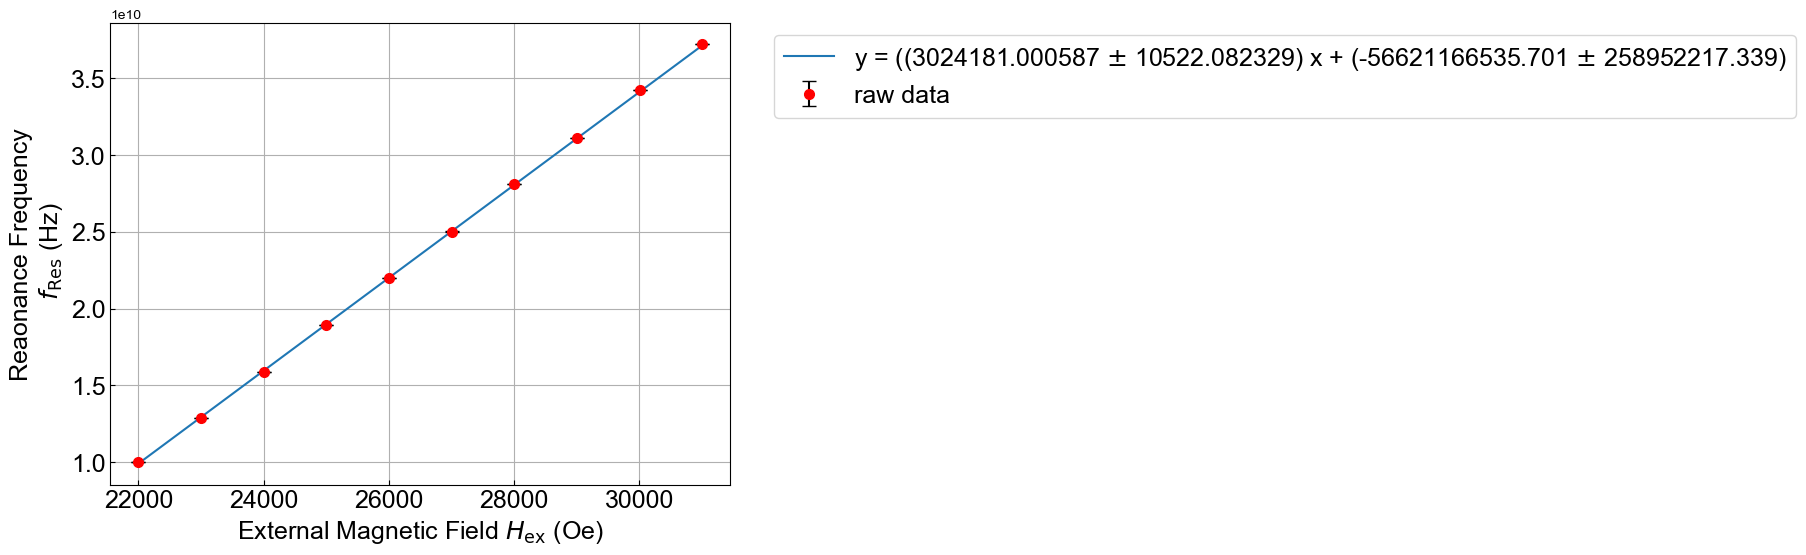

In [92]:
#印加磁場vs.共鳴周波数
plt.rcParams['font.family'] = 'arial'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
fig = plt.figure(figsize=(12, 10))
gs = gridspec.GridSpec(2, 2, height_ratios=[2, 2])
##########データの代入##################################################################################################
Filename='data'
filename='cohcp'
date='240520'

path='/Users/ueno2/iCloudDrive/研究/FeCoNi3元合金/データ/PPMS-OPFMR'
save_path='/Users/ueno2/iCloudDrive/研究/FeCoNi3元合金/データ/PPMS-OPFMR/fitted_data/liner'
f=open(f'{path}/{Filename}/{filename}.txt','rt')
x_list=[]  #Hex
y_list=[]  #Freq
yerr_list=[] #フィッティング誤差

for i in range(1):
    next(f)
n=0
for line in f :
    n=n+1
    data = line[:-1].split('\t')
    x_list.append(float(data[0]))
    y_list.append(float(data[1])*10**9)
    yerr_list.append(float(data[3])*10**9)

x=np.array(x_list)
y=np.array(y_list)
yerr=np.array(yerr_list)

##########グラフのプロット##########################################################################################
fig=plt.figure(figsize=(8, 6))

###グラフ軸設定#################
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid(True)
plt.xlabel('External Magnetic Field $H_\mathrm{ex}$ (Oe)', fontsize=18)
plt.ylabel('Reaonance Frequency\n $f_\mathrm{Res} $ (Hz)', fontsize=18)

plt.errorbar(x_list,y_list, yerr = yerr_list, capsize=5, fmt='o', markersize=7, ecolor='black', markeredgecolor = "red", color='red',label="raw data")

p, cov =np.polyfit(x,y,1, w=1.0/yerr,cov=True) #1次関数フィティング
a = p[0]
b = p[1]
sigma_a = np.sqrt(cov[0,0])
sigma_b = np.sqrt(cov[1,1])
xx=np.linspace(x[0],x[-1],30001)
yy=np.polyval(p,xx) #結果からyを計算
plt.plot(xx,yy,label="y = (({:.6f} $\pm$ {:.6f}) x + ({:.3f} $\pm$ {:.3f})".format(a,sigma_a,b,sigma_b))

print(f"試料名:{filename}")
print(f"傾き:{a}\t± {sigma_a}")
print(f"切片:{b}\t± {sigma_b}")
print(f"gamma={2*np.pi*a}\t± {np.pi*sigma_a}")
print(f"g-factor={2*np.pi*a*hbar/muB}\t± {2*np.pi*sigma_a*hbar/muB}")
print(f"Ms,eff={-1/(2*2*np.pi*a)*b}\t± {1/(2*2*np.pi*a)*sigma_b}")
gamma=2*np.pi*a

plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',fontsize=18)

#print(x_list,y_list)

plt.show()
fig.savefig(f'{save_path}/g-factor_graph_{filename}.pdf',bbox_inches="tight",format="pdf", pad_inches=0.1)
fig.savefig(f'{save_path}/g-factor_graph_{filename}.png',bbox_inches="tight",format="png", pad_inches=0.1)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


試料名:cohcp
傾き:0.02434809192507404	± 0.0016256393785120458
切片:-25527816.04693483	± 30549344.800293215
ダンピング定数α(×10^(-3))=12.17404596253702	± 0.8128196892560229
不均一線幅ΔH(0)=-8.441232863369866	± 10.101691927289481


<Figure size 1200x1000 with 0 Axes>

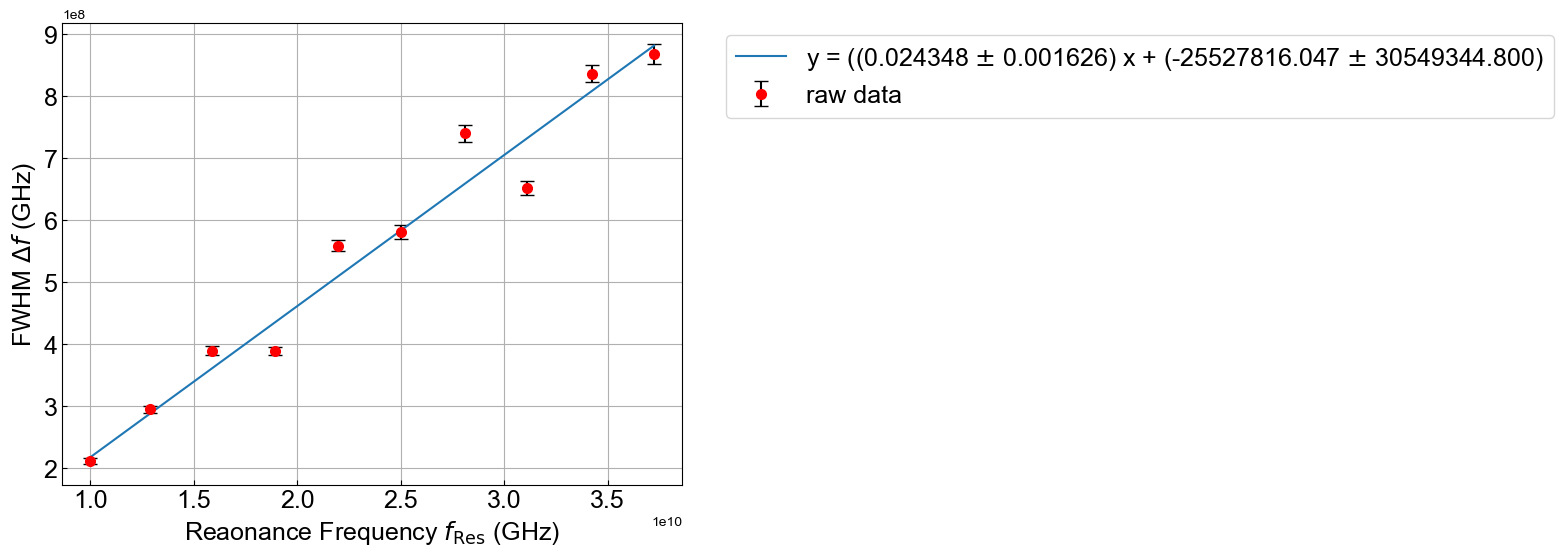

In [94]:
# ダンピング定数

#印加磁場vs.共鳴周波数
plt.rcParams['font.family'] = 'arial'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
fig = plt.figure(figsize=(12, 10))
gs = gridspec.GridSpec(2, 2, height_ratios=[2, 2])
##########データの代入##################################################################################################
Filename='data'
filename='cohcp'
date='240520'

path='/Users/ueno2/iCloudDrive/研究/FeCoNi3元合金/データ/PPMS-OPFMR'
save_path='/Users/ueno2/iCloudDrive/研究/FeCoNi3元合金/データ/PPMS-OPFMR/fitted_data/liner'
f=open(f'{path}/{Filename}/{filename}.txt','rt')
x_list=[]  #fres
y_list=[]  #deltaf
yerr_list=[] #フィッティング誤差

for i in range(1):
    next(f)
n=0
for line in f :
    n=n+1
    data = line[:-1].split('\t')
    x_list.append(float(data[1])*10**9)
    y_list.append(float(data[4])*10**9)
    yerr_list.append(float(data[6])*10**9)

x=np.array(x_list)
y=np.array(y_list)
yerr=np.array(yerr_list)

##########グラフのプロット##########################################################################################
fig=plt.figure(figsize=(8, 6))

###グラフ軸設定#################
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid(True)
plt.xlabel('Reaonance Frequency $f_\mathrm{Res}$ (GHz)', fontsize=18)
plt.ylabel('FWHM $\Delta f$ (GHz)', fontsize=18)

plt.errorbar(x_list,y_list, yerr = yerr_list, capsize=5, fmt='o', markersize=7, ecolor='black', markeredgecolor = "red", color='red',label="raw data")

p, cov =np.polyfit(x,y,1, w=1.0/yerr,cov=True) #1次関数フィティング
a = p[0]
b = p[1]
sigma_a = np.sqrt(cov[0,0])
sigma_b = np.sqrt(cov[1,1])
xx=np.linspace(x[0],x[-1],30)
yy=np.polyval(p,xx) #結果からyを計算
plt.plot(xx,yy,label="y = (({:.6f} $\pm$ {:.6f}) x + ({:.3f} $\pm$ {:.3f})".format(a,sigma_a,b,sigma_b))

print(f"試料名:{filename}")
print(f"傾き:{a}\t± {sigma_a}")
print(f"切片:{b}\t± {sigma_b}")
print(f"ダンピング定数α(×10^(-3))={a/2*10**3}\t± {sigma_a/2*10**3}")
print(f"不均一線幅ΔH(0)={2*np.pi/gamma*b}\t± {2*np.pi/gamma*sigma_b}")


plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',fontsize=18)

#print(x_list,y_list)

plt.show()
fig.savefig(f'{save_path}/damp_graph_{filename}.pdf',bbox_inches="tight",format="pdf", pad_inches=0.1)
fig.savefig(f'{save_path}/damp_graph_{filename}.png',bbox_inches="tight",format="png", pad_inches=0.1)

## a9-Co

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


試料名:a9-b-fmr
傾き:2884369.410337278	± 15735.944521420888
切片:-55972504676.45795	± 449193155.3923129
gamma=18123027.49950943	± 49435.92770579241
g-factor=2.0432841406777715	±	 0.011147325916011853
Ms,eff=1544.2371501663574	±	 12.392884009155534


<Figure size 1200x1000 with 0 Axes>

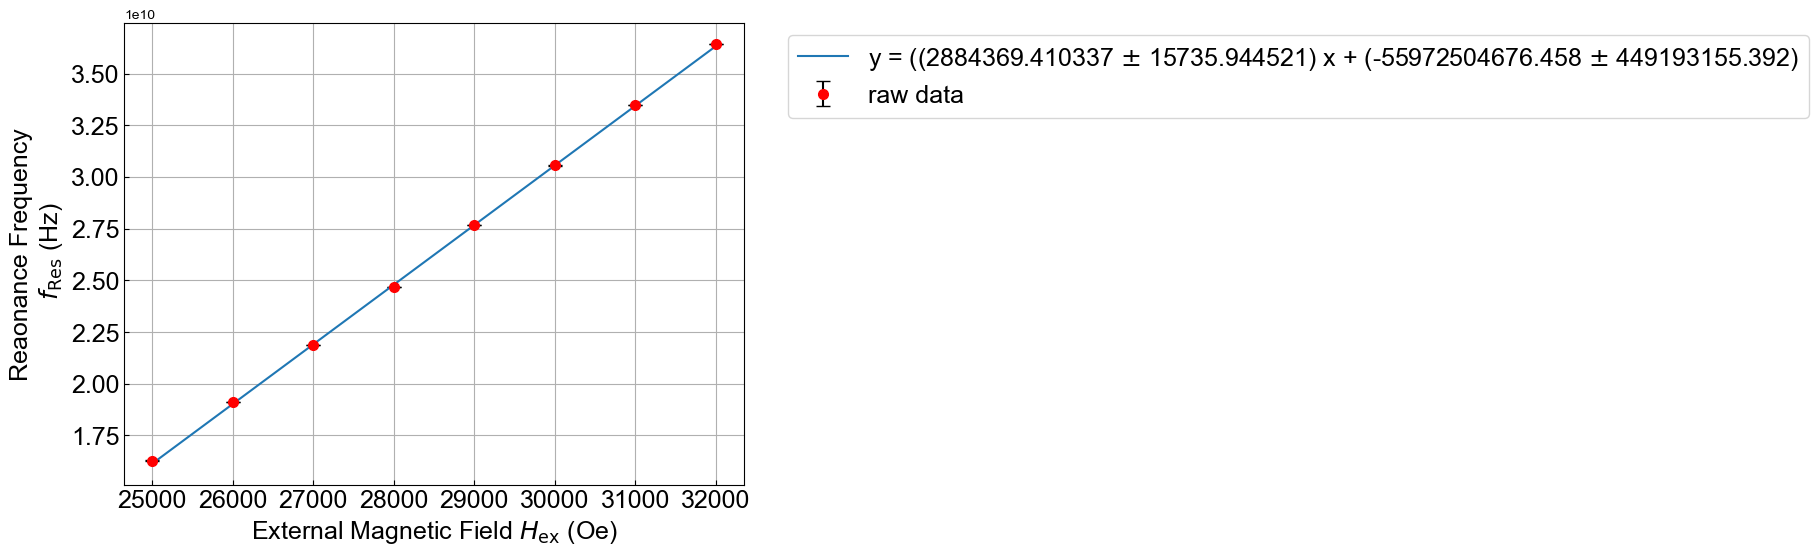

In [59]:
#印加磁場vs.共鳴周波数
plt.rcParams['font.family'] = 'arial'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
fig = plt.figure(figsize=(12, 10))
gs = gridspec.GridSpec(2, 2, height_ratios=[2, 2])
##########データの代入##################################################################################################
Filename='data'
filename='a9-b-fmr'
date='240517'

path='/Users/ueno2/iCloudDrive/研究/FeCoNi3元合金/データ/PPMS-OPFMR'
save_path='/Users/ueno2/iCloudDrive/研究/FeCoNi3元合金/データ/PPMS-OPFMR/fitted_data/liner'
f=open(f'{path}/{Filename}/{filename}.txt','rt')
x_list=[]  #Hex
y_list=[]  #Freq
yerr_list=[] #フィッティング誤差

for i in range(3):
    next(f)
n=0
for line in f :
    n=n+1
    data = line[:-1].split('\t')
    x_list.append(float(data[0]))
    y_list.append(float(data[1])*10**9)
    yerr_list.append(float(data[3])*10**9)

x=np.array(x_list)
y=np.array(y_list)
yerr=np.array(yerr_list)

##########グラフのプロット##########################################################################################
fig=plt.figure(figsize=(8, 6))

###グラフ軸設定#################
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid(True)
plt.xlabel('External Magnetic Field $H_\mathrm{ex}$ (Oe)', fontsize=18)
plt.ylabel('Reaonance Frequency\n $f_\mathrm{Res} $ (Hz)', fontsize=18)

plt.errorbar(x_list,y_list, yerr = yerr_list, capsize=5, fmt='o', markersize=7, ecolor='black', markeredgecolor = "red", color='red',label="raw data")

p, cov =np.polyfit(x,y,1, w=1.0/yerr,cov=True) #1次関数フィティング
a = p[0]
b = p[1]
sigma_a = np.sqrt(cov[0,0])
sigma_b = np.sqrt(cov[1,1])
xx=np.linspace(x[0],x[-1],30001)
yy=np.polyval(p,xx) #結果からyを計算
plt.plot(xx,yy,label="y = (({:.6f} $\pm$ {:.6f}) x + ({:.3f} $\pm$ {:.3f})".format(a,sigma_a,b,sigma_b))

print(f"試料名:{filename}")
print(f"傾き:{a}\t± {sigma_a}")
print(f"切片:{b}\t± {sigma_b}")
print(f"gamma={2*np.pi*a}\t± {np.pi*sigma_a}")
print(f"g-factor={2*np.pi*a*hbar/muB}\t±\t {2*np.pi*sigma_a*hbar/muB}")
print(f"Ms,eff={-1/(2*2*np.pi*a)*b}\t±\t {1/(2*2*np.pi*a)*sigma_b}")
gamma=2*np.pi*a

plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',fontsize=18)

#print(x_list,y_list)

plt.show()
fig.savefig(f'{save_path}/g-factor_graph_{filename}.pdf',bbox_inches="tight",format="pdf", pad_inches=0.1)
fig.savefig(f'{save_path}/g-factor_graph_{filename}.png',bbox_inches="tight",format="png", pad_inches=0.1)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


試料名:a9-b-fmr
傾き:0.017090605198724178	± 0.006007923234221195
切片:96826181.28384075	± 129088997.71017978
ダンピング定数α(×10^(-3))=8.545302599362088	± 3.003961617110597
不均一線幅ΔH(0)=33.569271999913	± 44.754668818611904


<Figure size 1200x1000 with 0 Axes>

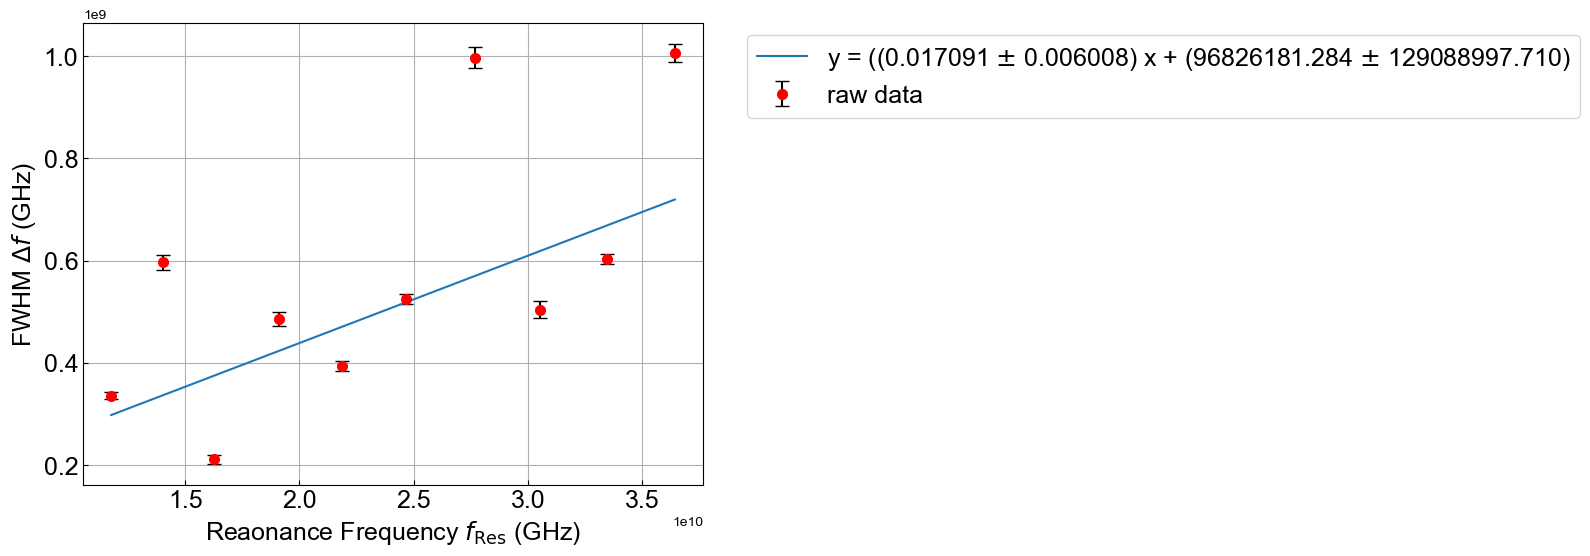

In [39]:
# ダンピング定数

#印加磁場vs.共鳴周波数
plt.rcParams['font.family'] = 'arial'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
fig = plt.figure(figsize=(12, 10))
gs = gridspec.GridSpec(2, 2, height_ratios=[2, 2])
##########データの代入##################################################################################################
Filename='data'
filename='a9-b-fmr'
date='240517'

path='/Users/ueno2/iCloudDrive/研究/FeCoNi3元合金/データ/PPMS-OPFMR'
save_path='/Users/ueno2/iCloudDrive/研究/FeCoNi3元合金/データ/PPMS-OPFMR/fitted_data/liner'
f=open(f'{path}/{Filename}/{filename}.txt','rt')
x_list=[]  #fres
y_list=[]  #deltaf
yerr_list=[] #フィッティング誤差

for i in range(1):
    next(f)
n=0
for line in f :
    n=n+1
    data = line[:-1].split('\t')
    x_list.append(float(data[1])*10**9)
    y_list.append(float(data[4])*10**9)
    yerr_list.append(float(data[6])*10**9)

x=np.array(x_list)
y=np.array(y_list)
yerr=np.array(yerr_list)

##########グラフのプロット##########################################################################################
fig=plt.figure(figsize=(8, 6))

###グラフ軸設定#################
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid(True)
plt.xlabel('Reaonance Frequency $f_\mathrm{Res}$ (GHz)', fontsize=18)
plt.ylabel('FWHM $\Delta f$ (GHz)', fontsize=18)

plt.errorbar(x_list,y_list, yerr = yerr_list, capsize=5, fmt='o', markersize=7, ecolor='black', markeredgecolor = "red", color='red',label="raw data")

p, cov =np.polyfit(x,y,1, w=1.0/yerr,cov=True) #1次関数フィティング
a = p[0]
b = p[1]
sigma_a = np.sqrt(cov[0,0])
sigma_b = np.sqrt(cov[1,1])
xx=np.linspace(x[0],x[-1],30)
yy=np.polyval(p,xx) #結果からyを計算
plt.plot(xx,yy,label="y = (({:.6f} $\pm$ {:.6f}) x + ({:.3f} $\pm$ {:.3f})".format(a,sigma_a,b,sigma_b))

print(f"試料名:{filename}")
print(f"傾き:{a}\t± {sigma_a}")
print(f"切片:{b}\t± {sigma_b}")
print(f"ダンピング定数α(×10^(-3))={a/2*10**3}\t± {sigma_a/2*10**3}")
print(f"不均一線幅ΔH(0)={2*np.pi/gamma*b}\t± {2*np.pi/gamma*sigma_b}")


plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',fontsize=18)

#print(x_list,y_list)

plt.show()
fig.savefig(f'{save_path}/damp_graph_{filename}.pdf',bbox_inches="tight",format="pdf", pad_inches=0.1)
fig.savefig(f'{save_path}/damp_graph_{filename}.png',bbox_inches="tight",format="png", pad_inches=0.1)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


試料名:ta9-b-fmr
傾き:0.011697577960105975	± 0.0022729857049007683
切片:198282035.52531394	± 49667627.95072009
ダンピング定数α(×10^(-3))=5.848788980052987	±	 1.1364928524503841
不均一線幅ΔH(0)=65.56553178755458	±	 16.423497119080306


<Figure size 1200x1000 with 0 Axes>

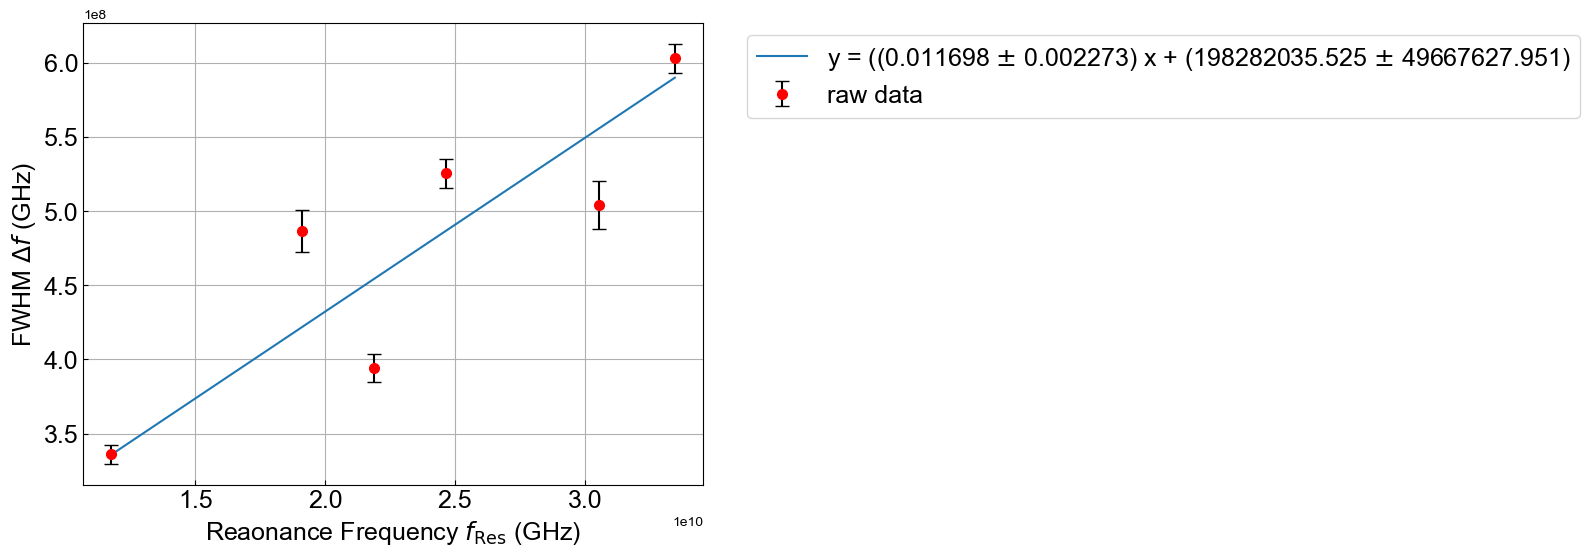

In [98]:
# ダンピング定数

#印加磁場vs.共鳴周波数
plt.rcParams['font.family'] = 'arial'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
fig = plt.figure(figsize=(12, 10))
gs = gridspec.GridSpec(2, 2, height_ratios=[2, 2])
##########データの代入##################################################################################################
Filename='data'
filename='ta9-b-fmr'
date='240517'

path='/Users/ueno2/iCloudDrive/研究/FeCoNi3元合金/データ/PPMS-OPFMR'
save_path='/Users/ueno2/iCloudDrive/研究/FeCoNi3元合金/データ/PPMS-OPFMR/fitted_data/liner'
f=open(f'{path}/{Filename}/{filename}.txt','rt')
x_list=[]  #fres
y_list=[]  #deltaf
yerr_list=[] #フィッティング誤差

for i in range(1):
    next(f)
n=0
for line in f :
    n=n+1
    data = line[:-1].split('\t')
    x_list.append(float(data[1])*10**9)
    y_list.append(float(data[4])*10**9)
    yerr_list.append(float(data[6])*10**9)

x=np.array(x_list)
y=np.array(y_list)
yerr=np.array(yerr_list)

##########グラフのプロット##########################################################################################
fig=plt.figure(figsize=(8, 6))

###グラフ軸設定#################
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid(True)
plt.xlabel('Reaonance Frequency $f_\mathrm{Res}$ (GHz)', fontsize=18)
plt.ylabel('FWHM $\Delta f$ (GHz)', fontsize=18)

plt.errorbar(x_list,y_list, yerr = yerr_list, capsize=5, fmt='o', markersize=7, ecolor='black', markeredgecolor = "red", color='red',label="raw data")

p, cov =np.polyfit(x,y,1, w=1.0/yerr,cov=True) #1次関数フィティング
a = p[0]
b = p[1]
sigma_a = np.sqrt(cov[0,0])
sigma_b = np.sqrt(cov[1,1])
xx=np.linspace(x[0],x[-1],30)
yy=np.polyval(p,xx) #結果からyを計算
plt.plot(xx,yy,label="y = (({:.6f} $\pm$ {:.6f}) x + ({:.3f} $\pm$ {:.3f})".format(a,sigma_a,b,sigma_b))

print(f"試料名:{filename}")
print(f"傾き:{a}\t± {sigma_a}")
print(f"切片:{b}\t± {sigma_b}")
print(f"ダンピング定数α(×10^(-3))={a/2*10**3}\t±\t {sigma_a/2*10**3}")
print(f"不均一線幅ΔH(0)={2*np.pi/gamma*b}\t±\t {2*np.pi/gamma*sigma_b}")


plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',fontsize=18)

#print(x_list,y_list)

plt.show()
fig.savefig(f'{save_path}/damp_graph_{filename}.pdf',bbox_inches="tight",format="pdf", pad_inches=0.1)
fig.savefig(f'{save_path}/damp_graph_{filename}.png',bbox_inches="tight",format="png", pad_inches=0.1)

## 240126ni-1

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


試料名:240126ni-1
傾き:3075614.0323646893	± 5223.499158470627
切片:-15779271038.438591	± 53074586.97750089
gamma=19324652.898709174	± 16410.106582283788
g-factor=2.1787616220912325	±	 0.0037003211000281276
Ms,eff=408.2679032101165	±	 1.373235194849117


<Figure size 1200x1000 with 0 Axes>

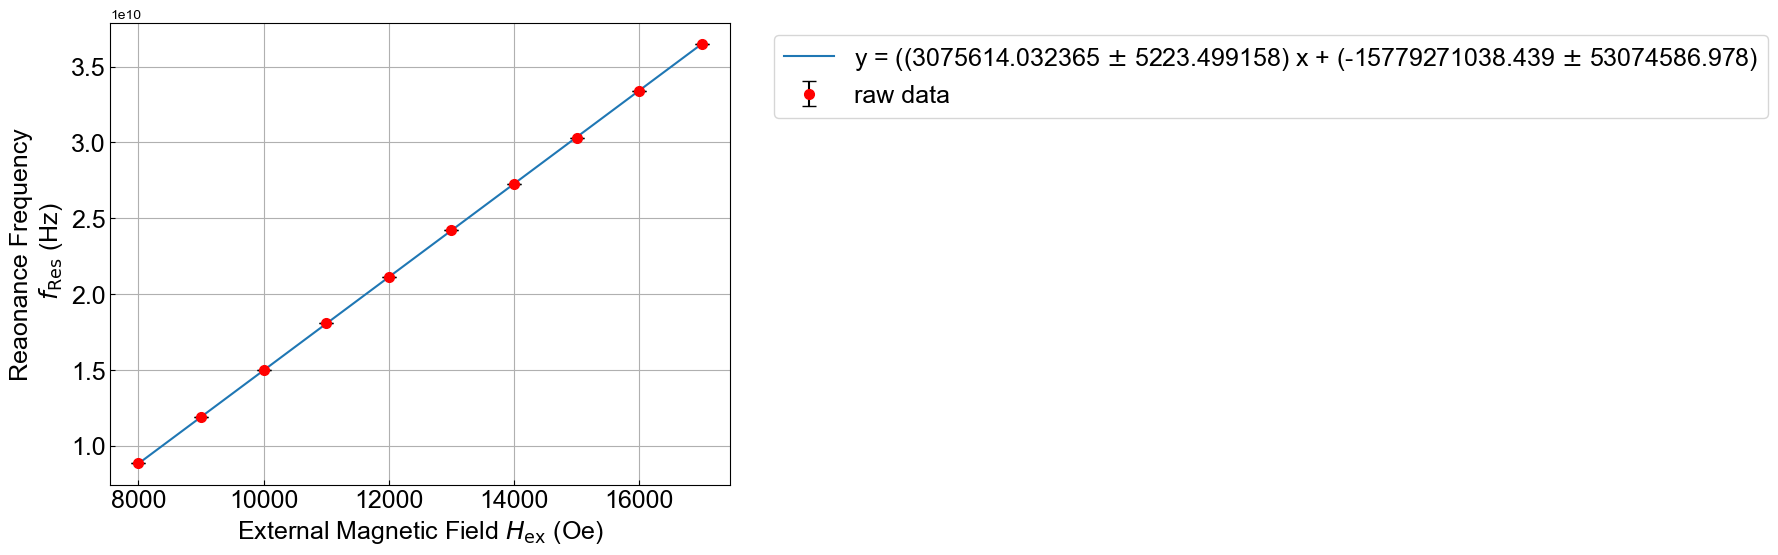

In [102]:
#印加磁場vs.共鳴周波数
plt.rcParams['font.family'] = 'arial'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
fig = plt.figure(figsize=(12, 10))
gs = gridspec.GridSpec(2, 2, height_ratios=[2, 2])
##########データの代入##################################################################################################
Filename='data'
filename='240126ni-1'
date='240517'

path='/Users/ueno2/iCloudDrive/研究/FeCoNi3元合金/データ/PPMS-OPFMR'
save_path='/Users/ueno2/iCloudDrive/研究/FeCoNi3元合金/データ/PPMS-OPFMR/fitted_data/liner'
f=open(f'{path}/{Filename}/{filename}.txt','rt')
x_list=[]  #Hex
y_list=[]  #Freq
yerr_list=[] #フィッティング誤差

for i in range(1):
    next(f)
n=0
for line in f :
    n=n+1
    data = line[:-1].split('\t')
    x_list.append(float(data[0]))
    y_list.append(float(data[1])*10**9)
    yerr_list.append(float(data[3])*10**9)

x=np.array(x_list)
y=np.array(y_list)
yerr=np.array(yerr_list)

##########グラフのプロット##########################################################################################
fig=plt.figure(figsize=(8, 6))

###グラフ軸設定#################
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid(True)
plt.xlabel('External Magnetic Field $H_\mathrm{ex}$ (Oe)', fontsize=18)
plt.ylabel('Reaonance Frequency\n $f_\mathrm{Res} $ (Hz)', fontsize=18)

plt.errorbar(x_list,y_list, yerr = yerr_list, capsize=5, fmt='o', markersize=7, ecolor='black', markeredgecolor = "red", color='red',label="raw data")

p, cov =np.polyfit(x,y,1, w=1.0/yerr,cov=True) #1次関数フィティング
a = p[0]
b = p[1]
sigma_a = np.sqrt(cov[0,0])
sigma_b = np.sqrt(cov[1,1])
xx=np.linspace(x[0],x[-1],30001)
yy=np.polyval(p,xx) #結果からyを計算
plt.plot(xx,yy,label="y = (({:.6f} $\pm$ {:.6f}) x + ({:.3f} $\pm$ {:.3f})".format(a,sigma_a,b,sigma_b))

print(f"試料名:{filename}")
print(f"傾き:{a}\t± {sigma_a}")
print(f"切片:{b}\t± {sigma_b}")
print(f"gamma={2*np.pi*a}\t± {np.pi*sigma_a}")
print(f"g-factor={2*np.pi*a*hbar/muB}\t±\t {2*np.pi*sigma_a*hbar/muB}")
print(f"Ms,eff={-1/(2*2*np.pi*a)*b}\t±\t {1/(2*2*np.pi*a)*sigma_b}")
gamma=2*np.pi*a

plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',fontsize=18)

#print(x_list,y_list)

plt.show()
fig.savefig(f'{save_path}/g-factor_graph_{filename}.pdf',bbox_inches="tight",format="pdf", pad_inches=0.1)
fig.savefig(f'{save_path}/g-factor_graph_{filename}.png',bbox_inches="tight",format="png", pad_inches=0.1)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


試料名:t240126ni-1
傾き:0.04365115980174675	± 0.004906000876023719
切片:36681965.22903771	± 75567127.5940552
ダンピング定数α(×10^(-3))=21.825579900873375	±	 2.4530004380118595
不均一線幅ΔH(0)=11.926712793944025	±	 24.569769418029136


<Figure size 1200x1000 with 0 Axes>

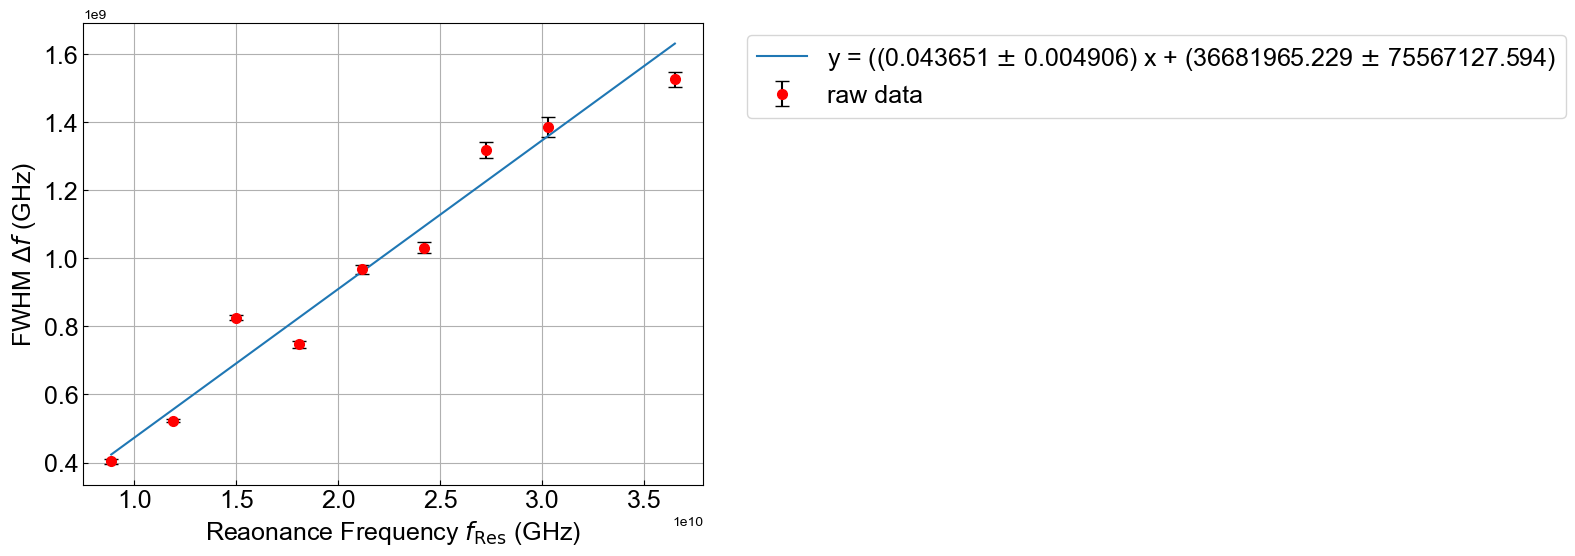

In [104]:
# ダンピング定数

#印加磁場vs.共鳴周波数
plt.rcParams['font.family'] = 'arial'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
fig = plt.figure(figsize=(12, 10))
gs = gridspec.GridSpec(2, 2, height_ratios=[2, 2])
##########データの代入##################################################################################################
Filename='data'
filename='t240126ni-1'
date='240517'

path='/Users/ueno2/iCloudDrive/研究/FeCoNi3元合金/データ/PPMS-OPFMR'
save_path='/Users/ueno2/iCloudDrive/研究/FeCoNi3元合金/データ/PPMS-OPFMR/fitted_data/liner'
f=open(f'{path}/{Filename}/{filename}.txt','rt')
x_list=[]  #fres
y_list=[]  #deltaf
yerr_list=[] #フィッティング誤差

for i in range(1):
    next(f)
n=0
for line in f :
    n=n+1
    data = line[:-1].split('\t')
    x_list.append(float(data[1])*10**9)
    y_list.append(float(data[4])*10**9)
    yerr_list.append(float(data[6])*10**9)

x=np.array(x_list)
y=np.array(y_list)
yerr=np.array(yerr_list)

##########グラフのプロット##########################################################################################
fig=plt.figure(figsize=(8, 6))

###グラフ軸設定#################
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid(True)
plt.xlabel('Reaonance Frequency $f_\mathrm{Res}$ (GHz)', fontsize=18)
plt.ylabel('FWHM $\Delta f$ (GHz)', fontsize=18)

plt.errorbar(x_list,y_list, yerr = yerr_list, capsize=5, fmt='o', markersize=7, ecolor='black', markeredgecolor = "red", color='red',label="raw data")

p, cov =np.polyfit(x,y,1, w=1.0/yerr,cov=True) #1次関数フィティング
a = p[0]
b = p[1]
sigma_a = np.sqrt(cov[0,0])
sigma_b = np.sqrt(cov[1,1])
xx=np.linspace(x[0],x[-1],30)
yy=np.polyval(p,xx) #結果からyを計算
plt.plot(xx,yy,label="y = (({:.6f} $\pm$ {:.6f}) x + ({:.3f} $\pm$ {:.3f})".format(a,sigma_a,b,sigma_b))

print(f"試料名:{filename}")
print(f"傾き:{a}\t± {sigma_a}")
print(f"切片:{b}\t± {sigma_b}")
print(f"ダンピング定数α(×10^(-3))={a/2*10**3}\t±\t {sigma_a/2*10**3}")
print(f"不均一線幅ΔH(0)={2*np.pi/gamma*b}\t±\t {2*np.pi/gamma*sigma_b}")


plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',fontsize=18)

#print(x_list,y_list)

plt.show()
fig.savefig(f'{save_path}/damp_graph_{filename}.pdf',bbox_inches="tight",format="pdf", pad_inches=0.1)
fig.savefig(f'{save_path}/damp_graph_{filename}.png',bbox_inches="tight",format="png", pad_inches=0.1)

## 240123nico5-2

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


試料名:240123nico5-2
傾き:3065180.2716926686	± 5445.520104876561
切片:-18591542516.714745	± 57920261.11076765
gamma=19259095.64695611	± 17107.605956455725
g-factor=2.1713703574243834	±	 0.0038576004960249356
Ms,eff=482.66914650411246	±	 1.50371186094405


<Figure size 1200x1000 with 0 Axes>

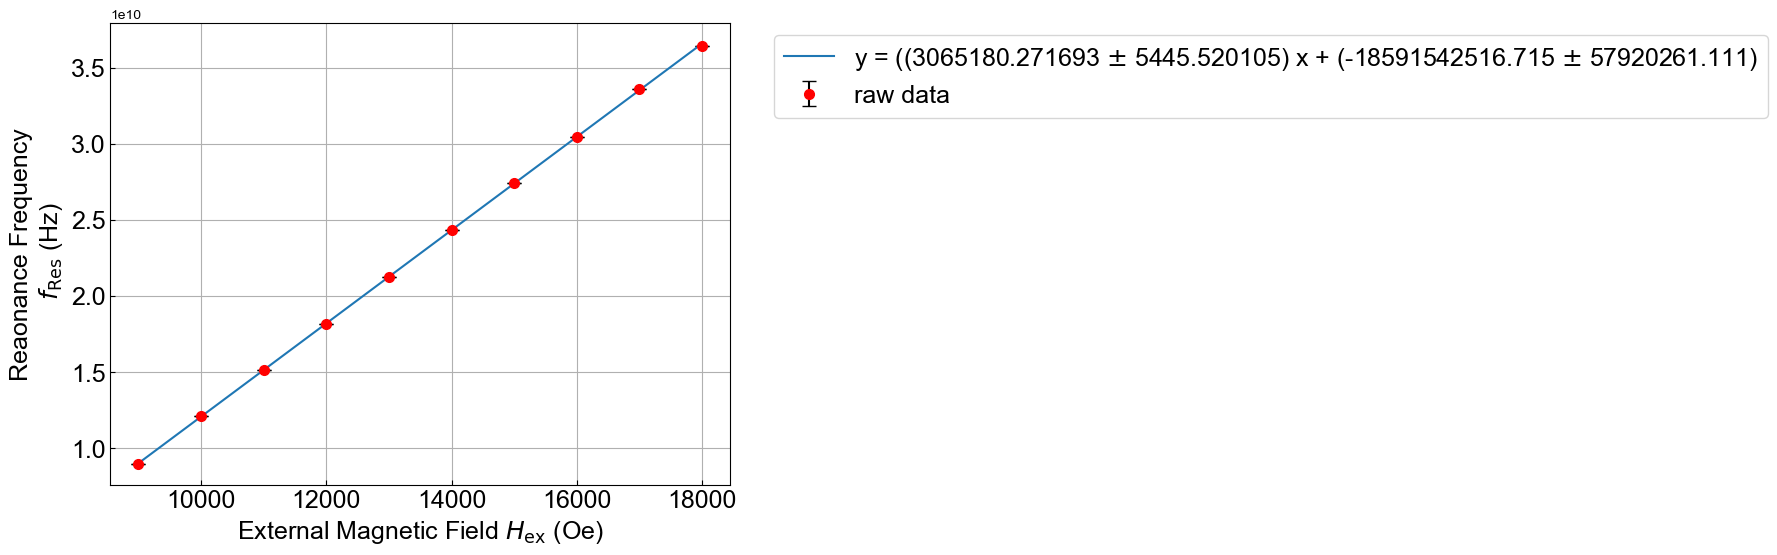

In [106]:
#印加磁場vs.共鳴周波数
plt.rcParams['font.family'] = 'arial'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
fig = plt.figure(figsize=(12, 10))
gs = gridspec.GridSpec(2, 2, height_ratios=[2, 2])
##########データの代入##################################################################################################
Filename='data'
filename='240123nico5-2'
date='240517'

path='/Users/ueno2/iCloudDrive/研究/FeCoNi3元合金/データ/PPMS-OPFMR'
save_path='/Users/ueno2/iCloudDrive/研究/FeCoNi3元合金/データ/PPMS-OPFMR/fitted_data/liner'
f=open(f'{path}/{Filename}/{filename}.txt','rt')
x_list=[]  #Hex
y_list=[]  #Freq
yerr_list=[] #フィッティング誤差

for i in range(1):
    next(f)
n=0
for line in f :
    n=n+1
    data = line[:-1].split('\t')
    x_list.append(float(data[0]))
    y_list.append(float(data[1])*10**9)
    yerr_list.append(float(data[3])*10**9)

x=np.array(x_list)
y=np.array(y_list)
yerr=np.array(yerr_list)

##########グラフのプロット##########################################################################################
fig=plt.figure(figsize=(8, 6))

###グラフ軸設定#################
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid(True)
plt.xlabel('External Magnetic Field $H_\mathrm{ex}$ (Oe)', fontsize=18)
plt.ylabel('Reaonance Frequency\n $f_\mathrm{Res} $ (Hz)', fontsize=18)

plt.errorbar(x_list,y_list, yerr = yerr_list, capsize=5, fmt='o', markersize=7, ecolor='black', markeredgecolor = "red", color='red',label="raw data")

p, cov =np.polyfit(x,y,1, w=1.0/yerr,cov=True) #1次関数フィティング
a = p[0]
b = p[1]
sigma_a = np.sqrt(cov[0,0])
sigma_b = np.sqrt(cov[1,1])
xx=np.linspace(x[0],x[-1],30001)
yy=np.polyval(p,xx) #結果からyを計算
plt.plot(xx,yy,label="y = (({:.6f} $\pm$ {:.6f}) x + ({:.3f} $\pm$ {:.3f})".format(a,sigma_a,b,sigma_b))

print(f"試料名:{filename}")
print(f"傾き:{a}\t± {sigma_a}")
print(f"切片:{b}\t± {sigma_b}")
print(f"gamma={2*np.pi*a}\t± {np.pi*sigma_a}")
print(f"g-factor={2*np.pi*a*hbar/muB}\t±\t {2*np.pi*sigma_a*hbar/muB}")
print(f"Ms,eff={-1/(2*2*np.pi*a)*b}\t±\t {1/(2*2*np.pi*a)*sigma_b}")
gamma=2*np.pi*a

plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',fontsize=18)

#print(x_list,y_list)

plt.show()
fig.savefig(f'{save_path}/g-factor_graph_{filename}.pdf',bbox_inches="tight",format="pdf", pad_inches=0.1)
fig.savefig(f'{save_path}/g-factor_graph_{filename}.png',bbox_inches="tight",format="png", pad_inches=0.1)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


試料名:t240123nico5-2
傾き:0.04462109555469353	± 0.001784465635525614
切片:-37914612.95849292	± 24338992.624636043
ダンピング定数α(×10^(-3))=22.310547777346763	±	 0.8922328177628069
不均一線幅ΔH(0)=-12.369456148677196	±	 7.9404767313067195


<Figure size 1200x1000 with 0 Axes>

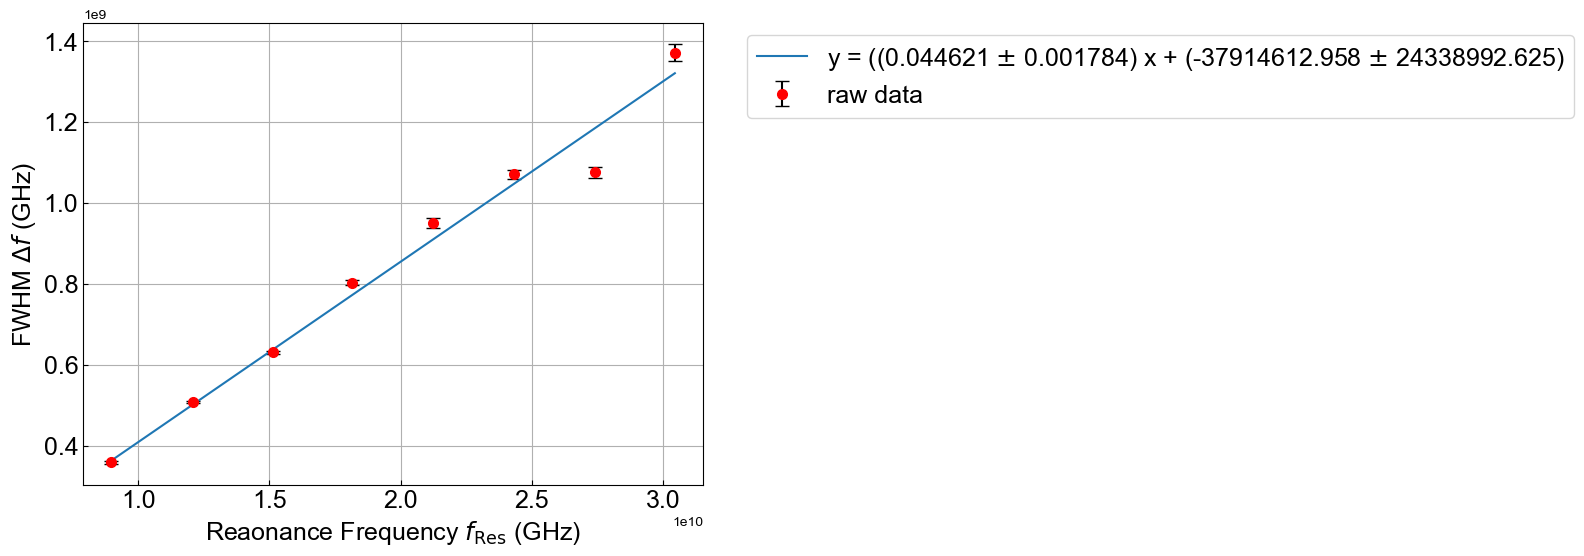

In [108]:
# ダンピング定数

#印加磁場vs.共鳴周波数
plt.rcParams['font.family'] = 'arial'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
fig = plt.figure(figsize=(12, 10))
gs = gridspec.GridSpec(2, 2, height_ratios=[2, 2])
##########データの代入##################################################################################################
Filename='data'
filename='t240123nico5-2'
date='240517'

path='/Users/ueno2/iCloudDrive/研究/FeCoNi3元合金/データ/PPMS-OPFMR'
save_path='/Users/ueno2/iCloudDrive/研究/FeCoNi3元合金/データ/PPMS-OPFMR/fitted_data/liner'
f=open(f'{path}/{Filename}/{filename}.txt','rt')
x_list=[]  #fres
y_list=[]  #deltaf
yerr_list=[] #フィッティング誤差

for i in range(1):
    next(f)
n=0
for line in f :
    n=n+1
    data = line[:-1].split('\t')
    x_list.append(float(data[1])*10**9)
    y_list.append(float(data[4])*10**9)
    yerr_list.append(float(data[6])*10**9)

x=np.array(x_list)
y=np.array(y_list)
yerr=np.array(yerr_list)

##########グラフのプロット##########################################################################################
fig=plt.figure(figsize=(8, 6))

###グラフ軸設定#################
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid(True)
plt.xlabel('Reaonance Frequency $f_\mathrm{Res}$ (GHz)', fontsize=18)
plt.ylabel('FWHM $\Delta f$ (GHz)', fontsize=18)

plt.errorbar(x_list,y_list, yerr = yerr_list, capsize=5, fmt='o', markersize=7, ecolor='black', markeredgecolor = "red", color='red',label="raw data")

p, cov =np.polyfit(x,y,1, w=1.0/yerr,cov=True) #1次関数フィティング
a = p[0]
b = p[1]
sigma_a = np.sqrt(cov[0,0])
sigma_b = np.sqrt(cov[1,1])
xx=np.linspace(x[0],x[-1],30)
yy=np.polyval(p,xx) #結果からyを計算
plt.plot(xx,yy,label="y = (({:.6f} $\pm$ {:.6f}) x + ({:.3f} $\pm$ {:.3f})".format(a,sigma_a,b,sigma_b))

print(f"試料名:{filename}")
print(f"傾き:{a}\t± {sigma_a}")
print(f"切片:{b}\t± {sigma_b}")
print(f"ダンピング定数α(×10^(-3))={a/2*10**3}\t±\t {sigma_a/2*10**3}")
print(f"不均一線幅ΔH(0)={2*np.pi/gamma*b}\t±\t {2*np.pi/gamma*sigma_b}")


plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',fontsize=18)

#print(x_list,y_list)

plt.show()
fig.savefig(f'{save_path}/damp_graph_{filename}.pdf',bbox_inches="tight",format="pdf", pad_inches=0.1)
fig.savefig(f'{save_path}/damp_graph_{filename}.png',bbox_inches="tight",format="png", pad_inches=0.1)

## 240109nico10-1

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


試料名:240109nico10-1
傾き:3050910.9373876257	± 6698.940740889726
切片:-19590185274.583103	± 75954323.20466498
gamma=19169438.775307428	± 21045.34301841253
g-factor=2.1612619765841794	±	 0.004745522305896185
Ms,eff=510.9744083853318	±	 1.9811305926833758


<Figure size 1200x1000 with 0 Axes>

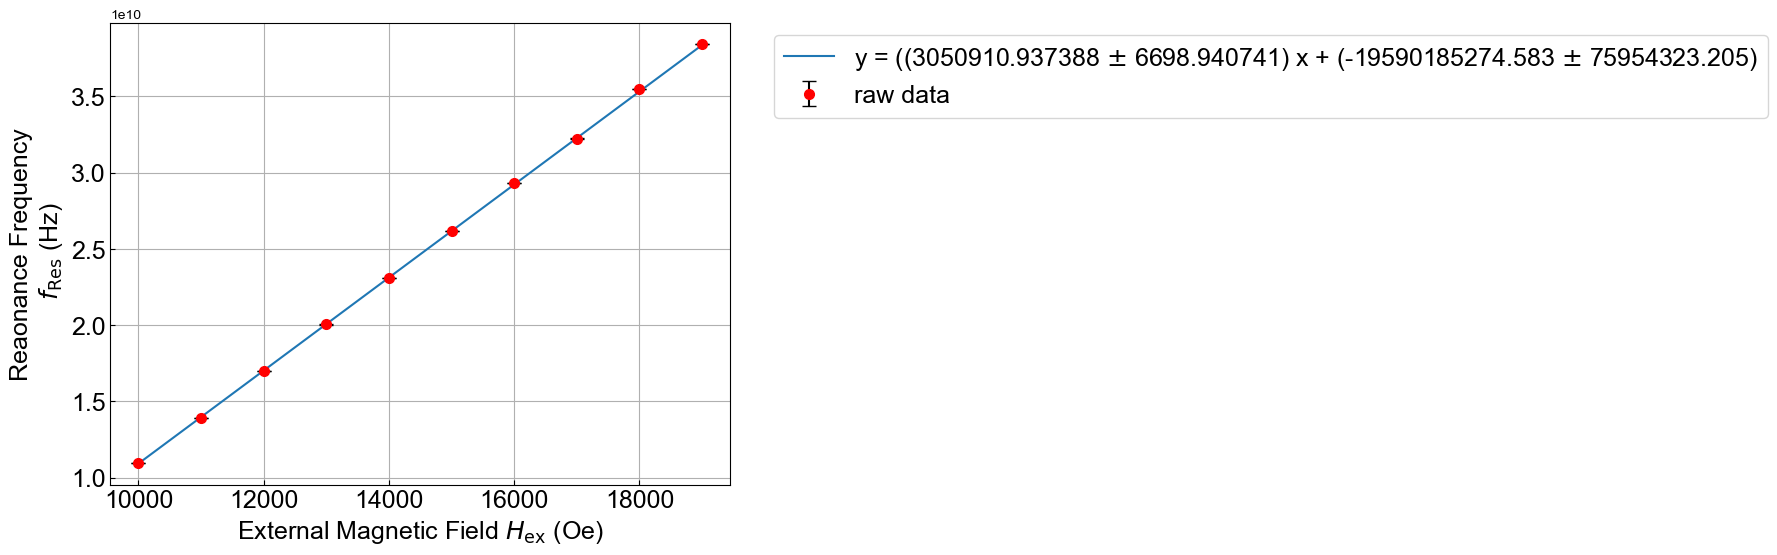

In [110]:
#印加磁場vs.共鳴周波数
plt.rcParams['font.family'] = 'arial'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
fig = plt.figure(figsize=(12, 10))
gs = gridspec.GridSpec(2, 2, height_ratios=[2, 2])
##########データの代入##################################################################################################
Filename='data'
filename='240109nico10-1'
date='240517'

path='/Users/ueno2/iCloudDrive/研究/FeCoNi3元合金/データ/PPMS-OPFMR'
save_path='/Users/ueno2/iCloudDrive/研究/FeCoNi3元合金/データ/PPMS-OPFMR/fitted_data/liner'
f=open(f'{path}/{Filename}/{filename}.txt','rt')
x_list=[]  #Hex
y_list=[]  #Freq
yerr_list=[] #フィッティング誤差

for i in range(1):
    next(f)
n=0
for line in f :
    n=n+1
    data = line[:-1].split('\t')
    x_list.append(float(data[0]))
    y_list.append(float(data[1])*10**9)
    yerr_list.append(float(data[3])*10**9)

x=np.array(x_list)
y=np.array(y_list)
yerr=np.array(yerr_list)

##########グラフのプロット##########################################################################################
fig=plt.figure(figsize=(8, 6))

###グラフ軸設定#################
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid(True)
plt.xlabel('External Magnetic Field $H_\mathrm{ex}$ (Oe)', fontsize=18)
plt.ylabel('Reaonance Frequency\n $f_\mathrm{Res} $ (Hz)', fontsize=18)

plt.errorbar(x_list,y_list, yerr = yerr_list, capsize=5, fmt='o', markersize=7, ecolor='black', markeredgecolor = "red", color='red',label="raw data")

p, cov =np.polyfit(x,y,1, w=1.0/yerr,cov=True) #1次関数フィティング
a = p[0]
b = p[1]
sigma_a = np.sqrt(cov[0,0])
sigma_b = np.sqrt(cov[1,1])
xx=np.linspace(x[0],x[-1],30001)
yy=np.polyval(p,xx) #結果からyを計算
plt.plot(xx,yy,label="y = (({:.6f} $\pm$ {:.6f}) x + ({:.3f} $\pm$ {:.3f})".format(a,sigma_a,b,sigma_b))

print(f"試料名:{filename}")
print(f"傾き:{a}\t± {sigma_a}")
print(f"切片:{b}\t± {sigma_b}")
print(f"gamma={2*np.pi*a}\t± {np.pi*sigma_a}")
print(f"g-factor={2*np.pi*a*hbar/muB}\t±\t {2*np.pi*sigma_a*hbar/muB}")
print(f"Ms,eff={-1/(2*2*np.pi*a)*b}\t±\t {1/(2*2*np.pi*a)*sigma_b}")
gamma=2*np.pi*a

plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',fontsize=18)

#print(x_list,y_list)

plt.show()
fig.savefig(f'{save_path}/g-factor_graph_{filename}.pdf',bbox_inches="tight",format="pdf", pad_inches=0.1)
fig.savefig(f'{save_path}/g-factor_graph_{filename}.png',bbox_inches="tight",format="png", pad_inches=0.1)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


試料名:240109nico10-1
傾き:0.039512827546510226	± 0.0022519777734620852
切片:12848249.051059037	± 34165306.30037841
ダンピング定数α(×10^(-3))=19.75641377325511	±	 1.1259888867310426
不均一線幅ΔH(0)=4.2112828970551615	±	 11.198395168373159


<Figure size 1200x1000 with 0 Axes>

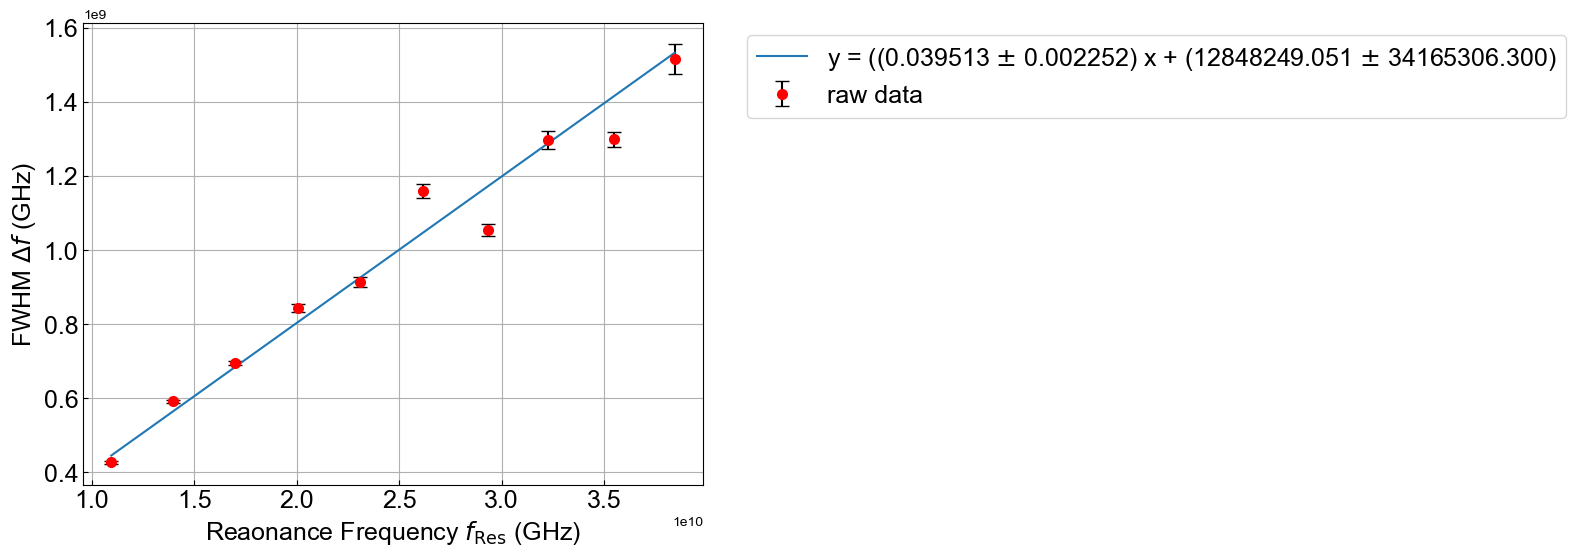

In [112]:
# ダンピング定数

#印加磁場vs.共鳴周波数
plt.rcParams['font.family'] = 'arial'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
fig = plt.figure(figsize=(12, 10))
gs = gridspec.GridSpec(2, 2, height_ratios=[2, 2])
##########データの代入##################################################################################################
Filename='data'
filename='240109nico10-1'
date='240517'

path='/Users/ueno2/iCloudDrive/研究/FeCoNi3元合金/データ/PPMS-OPFMR'
save_path='/Users/ueno2/iCloudDrive/研究/FeCoNi3元合金/データ/PPMS-OPFMR/fitted_data/liner'
f=open(f'{path}/{Filename}/{filename}.txt','rt')
x_list=[]  #fres
y_list=[]  #deltaf
yerr_list=[] #フィッティング誤差

for i in range(1):
    next(f)
n=0
for line in f :
    n=n+1
    data = line[:-1].split('\t')
    x_list.append(float(data[1])*10**9)
    y_list.append(float(data[4])*10**9)
    yerr_list.append(float(data[6])*10**9)

x=np.array(x_list)
y=np.array(y_list)
yerr=np.array(yerr_list)

##########グラフのプロット##########################################################################################
fig=plt.figure(figsize=(8, 6))

###グラフ軸設定#################
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid(True)
plt.xlabel('Reaonance Frequency $f_\mathrm{Res}$ (GHz)', fontsize=18)
plt.ylabel('FWHM $\Delta f$ (GHz)', fontsize=18)

plt.errorbar(x_list,y_list, yerr = yerr_list, capsize=5, fmt='o', markersize=7, ecolor='black', markeredgecolor = "red", color='red',label="raw data")

p, cov =np.polyfit(x,y,1, w=1.0/yerr,cov=True) #1次関数フィティング
a = p[0]
b = p[1]
sigma_a = np.sqrt(cov[0,0])
sigma_b = np.sqrt(cov[1,1])
xx=np.linspace(x[0],x[-1],30)
yy=np.polyval(p,xx) #結果からyを計算
plt.plot(xx,yy,label="y = (({:.6f} $\pm$ {:.6f}) x + ({:.3f} $\pm$ {:.3f})".format(a,sigma_a,b,sigma_b))

print(f"試料名:{filename}")
print(f"傾き:{a}\t± {sigma_a}")
print(f"切片:{b}\t± {sigma_b}")
print(f"ダンピング定数α(×10^(-3))={a/2*10**3}\t±\t {sigma_a/2*10**3}")
print(f"不均一線幅ΔH(0)={2*np.pi/gamma*b}\t±\t {2*np.pi/gamma*sigma_b}")


plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',fontsize=18)

#print(x_list,y_list)

plt.show()
fig.savefig(f'{save_path}/damp_graph_{filename}.pdf',bbox_inches="tight",format="pdf", pad_inches=0.1)
fig.savefig(f'{save_path}/damp_graph_{filename}.png',bbox_inches="tight",format="png", pad_inches=0.1)

# NiCo20

試料名:240302nico20-1_analysis1
傾き:30.10617805432273	± 0.030496433406613118
切片:-27.57328207058822	± 0.04723313841568479
gamma=189.16269560625307	± 0.09580737115090612
g-factor=2.132718365905344e-05	±	 2.160364012447419e-08
Ms,eff=0.07288245174932034	±	 0.00012484792063336252


<Figure size 1200x1000 with 0 Axes>

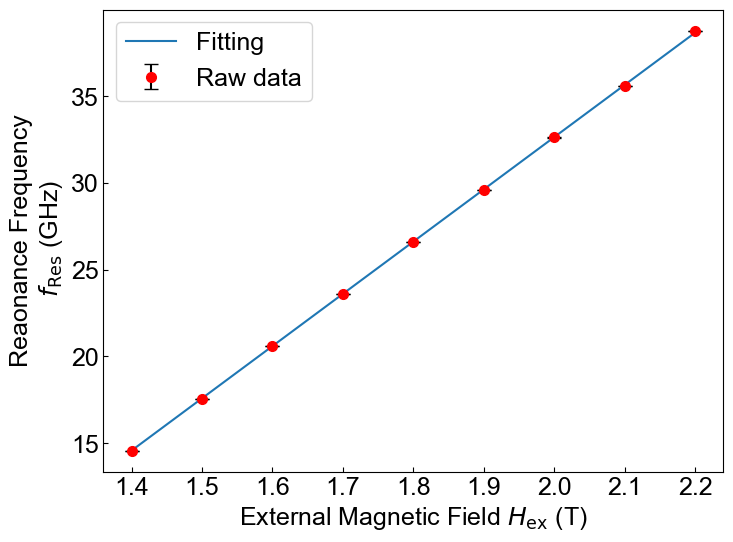

In [3]:
#印加磁場vs.共鳴周波数
plt.rcParams['font.family'] = 'arial'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
fig = plt.figure(figsize=(12, 10))
gs = gridspec.GridSpec(2, 2, height_ratios=[2, 2])
##########データの代入##################################################################################################
Filename='data'
filename='240302nico20-1_analysis1'
date='240517'

path='/Users/ueno2/iCloudDrive/研究/FeCoNi3元合金/データ/PPMS-OPFMR'
save_path='/Users/ueno2/iCloudDrive/研究/FeCoNi3元合金/論文作成/fig'
f=open(f'{path}/{Filename}/{filename}.txt','rt')
x_list=[]  #Hex
y_list=[]  #Freq
yerr_list=[] #フィッティング誤差

for i in range(1):
    next(f)
n=0
for line in f :
    n=n+1
    data = line[:-1].split('\t')
    x_list.append(float(data[0])/10**4)
    y_list.append(float(data[1]))
    yerr_list.append(float(data[3]))

x=np.array(x_list)
y=np.array(y_list)
yerr=np.array(yerr_list)

##########グラフのプロット##########################################################################################
fig=plt.figure(figsize=(8, 6))

###グラフ軸設定#################
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('External Magnetic Field $H_\mathrm{ex}$ (T)', fontsize=18)
plt.ylabel('Reaonance Frequency\n $f_\mathrm{Res} $ (GHz)', fontsize=18)

plt.errorbar(x_list,y_list, yerr = yerr_list, capsize=5, fmt='o', markersize=7, ecolor='black', markeredgecolor = "red", color='red',label="Raw data")

p, cov =np.polyfit(x,y,1, w=1.0/yerr,cov=True) #1次関数フィティング
a = p[0]
b = p[1]
sigma_a = np.sqrt(cov[0,0])
sigma_b = np.sqrt(cov[1,1])
xx=np.linspace(x[0],x[-1],30001)
yy=np.polyval(p,xx) #結果からyを計算
plt.plot(xx,yy,label="Fitting".format(a,sigma_a,b,sigma_b))

print(f"試料名:{filename}")
print(f"傾き:{a}\t± {sigma_a}")
print(f"切片:{b}\t± {sigma_b}")
print(f"gamma={2*np.pi*a}\t± {np.pi*sigma_a}")
print(f"g-factor={2*np.pi*a*hbar/muB}\t±\t {2*np.pi*sigma_a*hbar/muB}")
print(f"Ms,eff={-1/(2*2*np.pi*a)*b}\t±\t {1/(2*2*np.pi*a)*sigma_b}")
gamma=2*np.pi*a

plt.legend(bbox_to_anchor=(0, 1.0), loc='upper left',fontsize=18)

#print(x_list,y_list)

plt.show()
fig.savefig(f'{save_path}/g-factor_graph_{filename}.png',bbox_inches="tight",format="png", pad_inches=0.1)

試料名:240302nico20-1_analysis1
傾き:0.028295308853895987	± 0.002313211188122144
切片:-0.010154811765661981	± 0.04483301449653772
ダンピング定数α(×10^(-3))=14.147654426947993	±	 1.156605594061072
不均一線幅ΔH(0)=-0.00033729993051057256	±	 0.0014891632679393016


<Figure size 1200x1000 with 0 Axes>

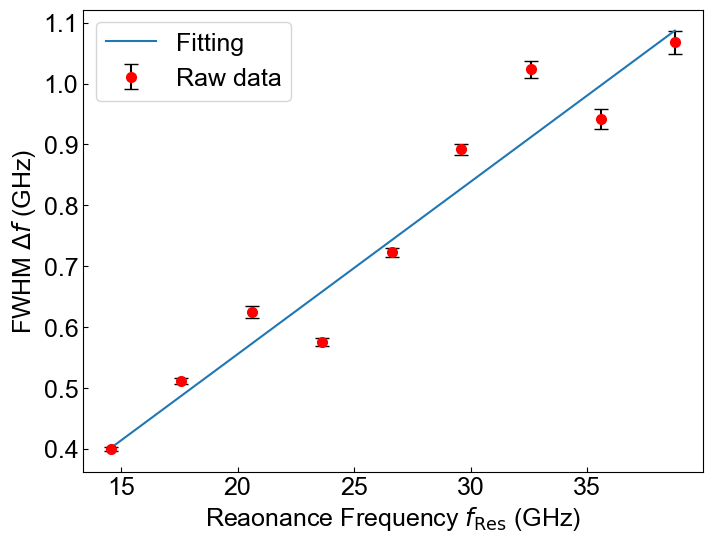

In [4]:
# ダンピング定数

#印加磁場vs.共鳴周波数
plt.rcParams['font.family'] = 'arial'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
fig = plt.figure(figsize=(12, 10))
gs = gridspec.GridSpec(2, 2, height_ratios=[2, 2])
##########データの代入##################################################################################################
Filename='data'
filename='240302nico20-1_analysis1'
date='240517'

path='/Users/ueno2/iCloudDrive/研究/FeCoNi3元合金/データ/PPMS-OPFMR'
save_path='/Users/ueno2/iCloudDrive/研究/FeCoNi3元合金/論文作成/fig'
f=open(f'{path}/{Filename}/{filename}.txt','rt')
x_list=[]  #fres
y_list=[]  #deltaf
yerr_list=[] #フィッティング誤差

for i in range(1):
    next(f)
n=0
for line in f :
    n=n+1
    data = line[:-1].split('\t')
    x_list.append(float(data[1]))
    y_list.append(float(data[4]))
    yerr_list.append(float(data[6]))

x=np.array(x_list)
y=np.array(y_list)
yerr=np.array(yerr_list)

##########グラフのプロット##########################################################################################
fig=plt.figure(figsize=(8, 6))

###グラフ軸設定#################
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('Reaonance Frequency $f_\mathrm{Res}$ (GHz)', fontsize=18)
plt.ylabel('FWHM $\Delta f$ (GHz)', fontsize=18)

plt.errorbar(x_list,y_list, yerr = yerr_list, capsize=5, fmt='o', markersize=7, ecolor='black', markeredgecolor = "red", color='red',label="Raw data")

p, cov =np.polyfit(x,y,1, w=1.0/yerr,cov=True) #1次関数フィティング
a = p[0]
b = p[1]
sigma_a = np.sqrt(cov[0,0])
sigma_b = np.sqrt(cov[1,1])
xx=np.linspace(x[0],x[-1],30)
yy=np.polyval(p,xx) #結果からyを計算
plt.plot(xx,yy,label="Fitting".format(a,sigma_a,b,sigma_b))

print(f"試料名:{filename}")
print(f"傾き:{a}\t± {sigma_a}")
print(f"切片:{b}\t± {sigma_b}")
print(f"ダンピング定数α(×10^(-3))={a/2*10**3}\t±\t {sigma_a/2*10**3}")
print(f"不均一線幅ΔH(0)={2*np.pi/gamma*b}\t±\t {2*np.pi/gamma*sigma_b}")


plt.legend(bbox_to_anchor=(0, 1.0), loc='upper left',fontsize=18)

#print(x_list,y_list)

plt.show()
fig.savefig(f'{save_path}/damp_graph_{filename}.png',bbox_inches="tight",format="png", pad_inches=0.1)

## 240129nico15-2

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


試料名:240129nico15-2
傾き:3042473.858710293	± 4763.401744954196
切片:-21176857652.900494	± 58023370.99336089
gamma=19116427.046526495	± 14964.667928044904
g-factor=2.155285159262078	±	 0.003374388594699327
Ms,eff=553.8916242391746	±	 1.5176311674807426


<Figure size 1200x1000 with 0 Axes>

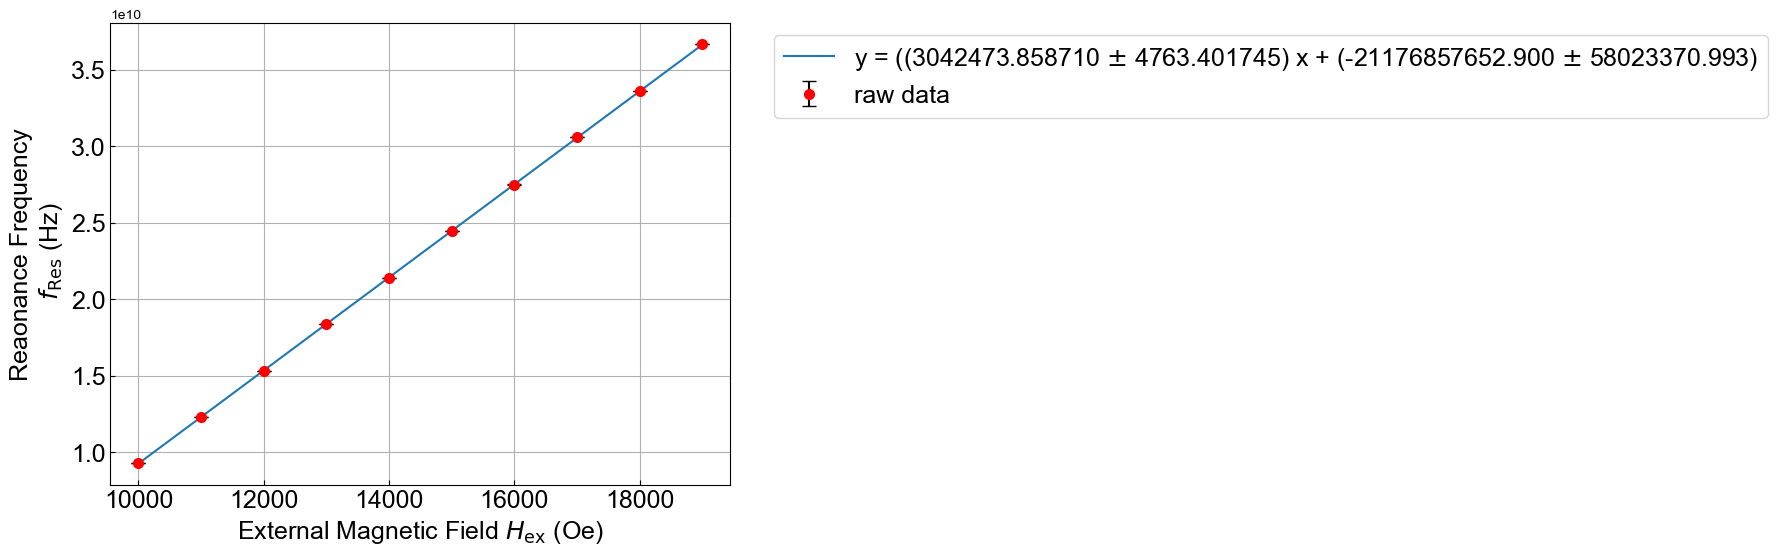

In [7]:
#印加磁場vs.共鳴周波数
plt.rcParams['font.family'] = 'arial'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
fig = plt.figure(figsize=(12, 10))
gs = gridspec.GridSpec(2, 2, height_ratios=[2, 2])
##########データの代入##################################################################################################
Filename='data'
filename='240129nico15-2'
date='240517'

path='/Users/ueno2/iCloudDrive/研究/FeCoNi3元合金/データ/PPMS-OPFMR'
save_path='/Users/ueno2/iCloudDrive/研究/FeCoNi3元合金/データ/PPMS-OPFMR/fitted_data/liner'
f=open(f'{path}/{Filename}/{filename}.txt','rt')
x_list=[]  #Hex
y_list=[]  #Freq
yerr_list=[] #フィッティング誤差

for i in range(1):
    next(f)
n=0
for line in f :
    n=n+1
    data = line[:-1].split('\t')
    x_list.append(float(data[0]))
    y_list.append(float(data[1])*10**9)
    yerr_list.append(float(data[3])*10**9)

x=np.array(x_list)
y=np.array(y_list)
yerr=np.array(yerr_list)

##########グラフのプロット##########################################################################################
fig=plt.figure(figsize=(8, 6))

###グラフ軸設定#################
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid(True)
plt.xlabel('External Magnetic Field $H_\mathrm{ex}$ (Oe)', fontsize=18)
plt.ylabel('Reaonance Frequency\n $f_\mathrm{Res} $ (Hz)', fontsize=18)

plt.errorbar(x_list,y_list, yerr = yerr_list, capsize=5, fmt='o', markersize=7, ecolor='black', markeredgecolor = "red", color='red',label="raw data")

p, cov =np.polyfit(x,y,1, w=1.0/yerr,cov=True) #1次関数フィティング
a = p[0]
b = p[1]
sigma_a = np.sqrt(cov[0,0])
sigma_b = np.sqrt(cov[1,1])
xx=np.linspace(x[0],x[-1],30001)
yy=np.polyval(p,xx) #結果からyを計算
plt.plot(xx,yy,label="y = (({:.6f} $\pm$ {:.6f}) x + ({:.3f} $\pm$ {:.3f})".format(a,sigma_a,b,sigma_b))

print(f"試料名:{filename}")
print(f"傾き:{a}\t± {sigma_a}")
print(f"切片:{b}\t± {sigma_b}")
print(f"gamma={2*np.pi*a}\t± {np.pi*sigma_a}")
print(f"g-factor={2*np.pi*a*hbar/muB}\t±\t {2*np.pi*sigma_a*hbar/muB}")
print(f"Ms,eff={-1/(2*2*np.pi*a)*b}\t±\t {1/(2*2*np.pi*a)*sigma_b}")
gamma=2*np.pi*a

plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',fontsize=18)

#print(x_list,y_list)

plt.show()
fig.savefig(f'{save_path}/g-factor_graph_{filename}.pdf',bbox_inches="tight",format="pdf", pad_inches=0.1)
fig.savefig(f'{save_path}/g-factor_graph_{filename}.png',bbox_inches="tight",format="png", pad_inches=0.1)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


試料名:240129nico15-2
傾き:0.03771529230443771	± 0.0027911887825811488
切片:-12617895.983166795	± 44091460.5511397
ダンピング定数α(×10^(-3))=18.857646152218855	±	 1.3955943912905744
不均一線幅ΔH(0)=-4.14724877488858	±	 14.49197679214575


<Figure size 1200x1000 with 0 Axes>

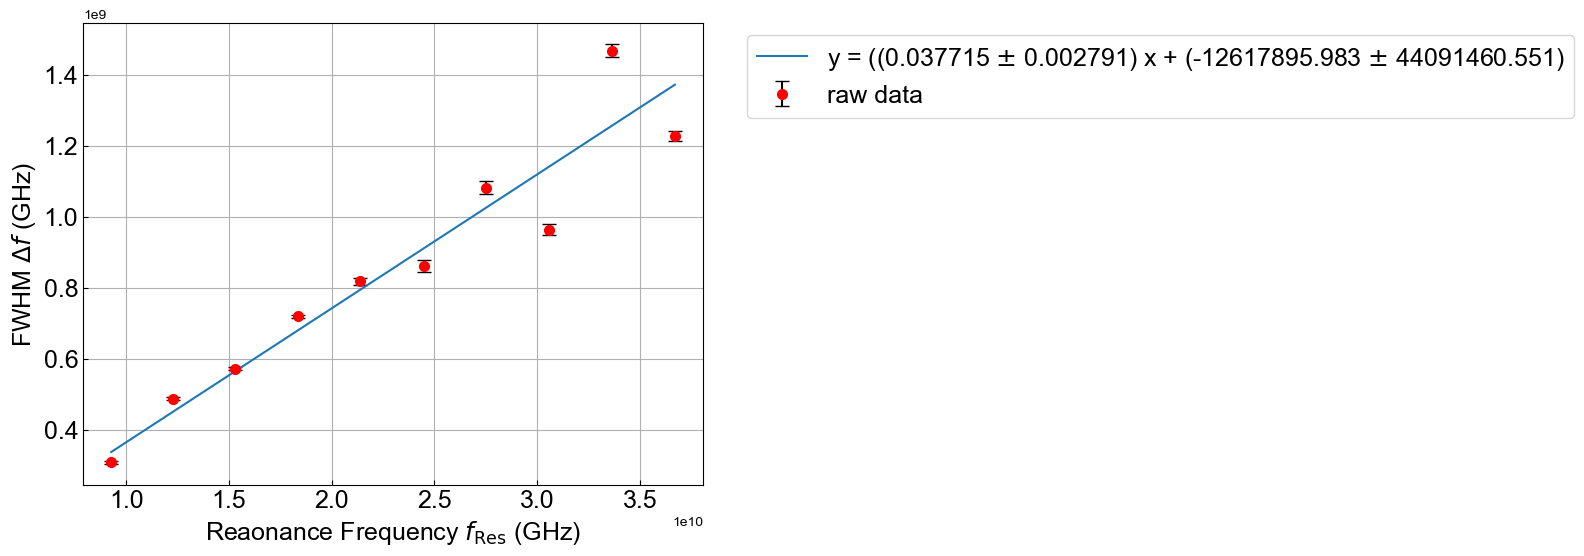

In [116]:
# ダンピング定数

#印加磁場vs.共鳴周波数
plt.rcParams['font.family'] = 'arial'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
fig = plt.figure(figsize=(12, 10))
gs = gridspec.GridSpec(2, 2, height_ratios=[2, 2])
##########データの代入##################################################################################################
Filename='data'
filename='240129nico15-2'
date='240517'

path='/Users/ueno2/iCloudDrive/研究/FeCoNi3元合金/データ/PPMS-OPFMR'
save_path='/Users/ueno2/iCloudDrive/研究/FeCoNi3元合金/データ/PPMS-OPFMR/fitted_data/liner'
f=open(f'{path}/{Filename}/{filename}.txt','rt')
x_list=[]  #fres
y_list=[]  #deltaf
yerr_list=[] #フィッティング誤差

for i in range(1):
    next(f)
n=0
for line in f :
    n=n+1
    data = line[:-1].split('\t')
    x_list.append(float(data[1])*10**9)
    y_list.append(float(data[4])*10**9)
    yerr_list.append(float(data[6])*10**9)

x=np.array(x_list)
y=np.array(y_list)
yerr=np.array(yerr_list)

##########グラフのプロット##########################################################################################
fig=plt.figure(figsize=(8, 6))

###グラフ軸設定#################
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid(True)
plt.xlabel('Reaonance Frequency $f_\mathrm{Res}$ (GHz)', fontsize=18)
plt.ylabel('FWHM $\Delta f$ (GHz)', fontsize=18)

plt.errorbar(x_list,y_list, yerr = yerr_list, capsize=5, fmt='o', markersize=7, ecolor='black', markeredgecolor = "red", color='red',label="raw data")

p, cov =np.polyfit(x,y,1, w=1.0/yerr,cov=True) #1次関数フィティング
a = p[0]
b = p[1]
sigma_a = np.sqrt(cov[0,0])
sigma_b = np.sqrt(cov[1,1])
xx=np.linspace(x[0],x[-1],30)
yy=np.polyval(p,xx) #結果からyを計算
plt.plot(xx,yy,label="y = (({:.6f} $\pm$ {:.6f}) x + ({:.3f} $\pm$ {:.3f})".format(a,sigma_a,b,sigma_b))

print(f"試料名:{filename}")
print(f"傾き:{a}\t± {sigma_a}")
print(f"切片:{b}\t± {sigma_b}")
print(f"ダンピング定数α(×10^(-3))={a/2*10**3}\t±\t {sigma_a/2*10**3}")
print(f"不均一線幅ΔH(0)={2*np.pi/gamma*b}\t±\t {2*np.pi/gamma*sigma_b}")


plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',fontsize=18)

#print(x_list,y_list)

plt.show()
fig.savefig(f'{save_path}/damp_graph_{filename}.pdf',bbox_inches="tight",format="pdf", pad_inches=0.1)
fig.savefig(f'{save_path}/damp_graph_{filename}.png',bbox_inches="tight",format="png", pad_inches=0.1)

## 240118nico25-2

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


試料名:240118nico25-2
傾き:3041772.6440915256	± 8834.459348305461
切片:-26169785957.702827	± 133293556.1690388
gamma=19112021.185136676	± 27754.27258707411
g-factor=2.154788419591839	±	 0.006258321355496637
Ms,eff=684.6420298564482	±	 3.487165352053412


<Figure size 1200x1000 with 0 Axes>

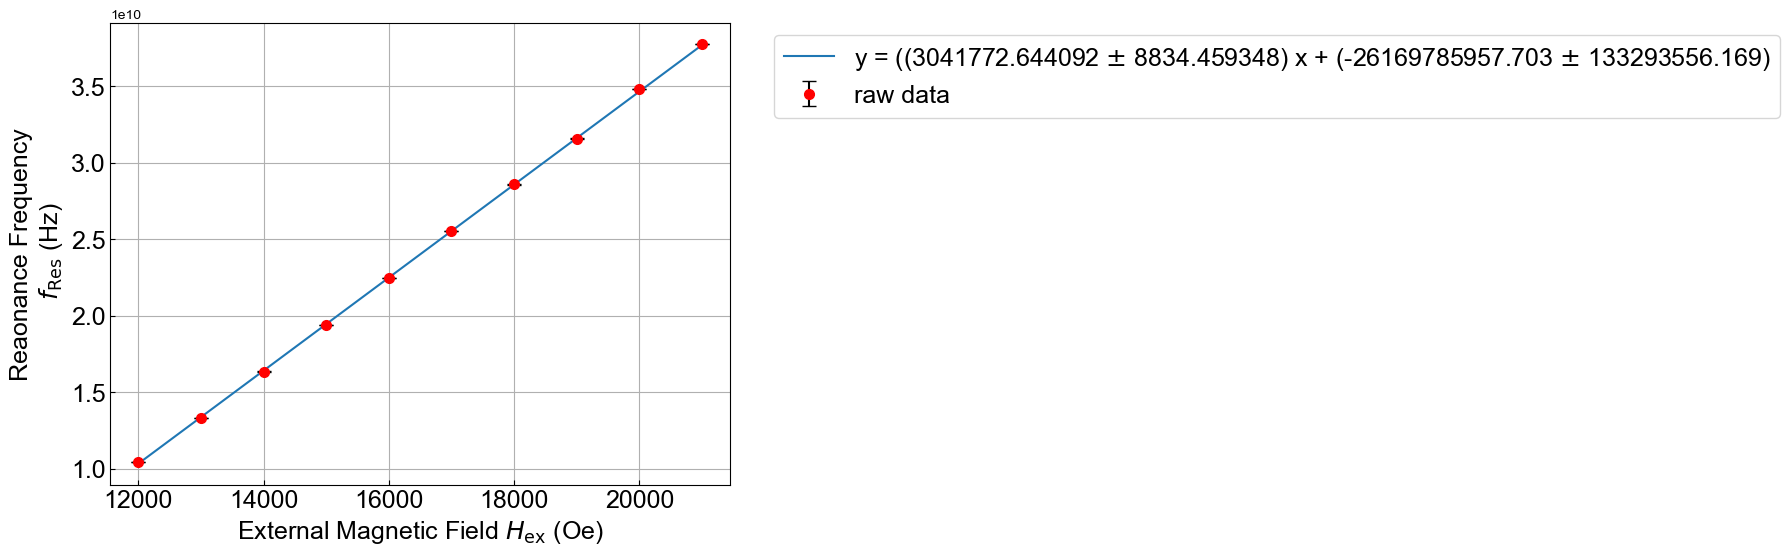

In [122]:
#印加磁場vs.共鳴周波数
plt.rcParams['font.family'] = 'arial'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
fig = plt.figure(figsize=(12, 10))
gs = gridspec.GridSpec(2, 2, height_ratios=[2, 2])
##########データの代入##################################################################################################
Filename='data'
filename='240118nico25-2'
date='240518'

path='/Users/ueno2/iCloudDrive/研究/FeCoNi3元合金/データ/PPMS-OPFMR'
save_path='/Users/ueno2/iCloudDrive/研究/FeCoNi3元合金/データ/PPMS-OPFMR/fitted_data/liner'
f=open(f'{path}/{Filename}/{filename}.txt','rt')
x_list=[]  #Hex
y_list=[]  #Freq
yerr_list=[] #フィッティング誤差

for i in range(1):
    next(f)
n=0
for line in f :
    n=n+1
    data = line[:-1].split('\t')
    x_list.append(float(data[0]))
    y_list.append(float(data[1])*10**9)
    yerr_list.append(float(data[3])*10**9)

x=np.array(x_list)
y=np.array(y_list)
yerr=np.array(yerr_list)

##########グラフのプロット##########################################################################################
fig=plt.figure(figsize=(8, 6))

###グラフ軸設定#################
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid(True)
plt.xlabel('External Magnetic Field $H_\mathrm{ex}$ (Oe)', fontsize=18)
plt.ylabel('Reaonance Frequency\n $f_\mathrm{Res} $ (Hz)', fontsize=18)

plt.errorbar(x_list,y_list, yerr = yerr_list, capsize=5, fmt='o', markersize=7, ecolor='black', markeredgecolor = "red", color='red',label="raw data")

p, cov =np.polyfit(x,y,1, w=1.0/yerr,cov=True) #1次関数フィティング
a = p[0]
b = p[1]
sigma_a = np.sqrt(cov[0,0])
sigma_b = np.sqrt(cov[1,1])
xx=np.linspace(x[0],x[-1],30001)
yy=np.polyval(p,xx) #結果からyを計算
plt.plot(xx,yy,label="y = (({:.6f} $\pm$ {:.6f}) x + ({:.3f} $\pm$ {:.3f})".format(a,sigma_a,b,sigma_b))

print(f"試料名:{filename}")
print(f"傾き:{a}\t± {sigma_a}")
print(f"切片:{b}\t± {sigma_b}")
print(f"gamma={2*np.pi*a}\t± {np.pi*sigma_a}")
print(f"g-factor={2*np.pi*a*hbar/muB}\t±\t {2*np.pi*sigma_a*hbar/muB}")
print(f"Ms,eff={-1/(2*2*np.pi*a)*b}\t±\t {1/(2*2*np.pi*a)*sigma_b}")
gamma=2*np.pi*a

plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',fontsize=18)

#print(x_list,y_list)

plt.show()
fig.savefig(f'{save_path}/g-factor_graph_{filename}.pdf',bbox_inches="tight",format="pdf", pad_inches=0.1)
fig.savefig(f'{save_path}/g-factor_graph_{filename}.png',bbox_inches="tight",format="png", pad_inches=0.1)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


試料名:240118nico25-2
傾き:0.024458026850734043	± 0.002637220034433854
切片:440661659.9797881	± 53301148.73198991
ダンピング定数α(×10^(-3))=12.229013425367022	±	 1.3186100172169268
不均一線幅ΔH(0)=144.8700187490176	±	 17.523054800142422


<Figure size 1200x1000 with 0 Axes>

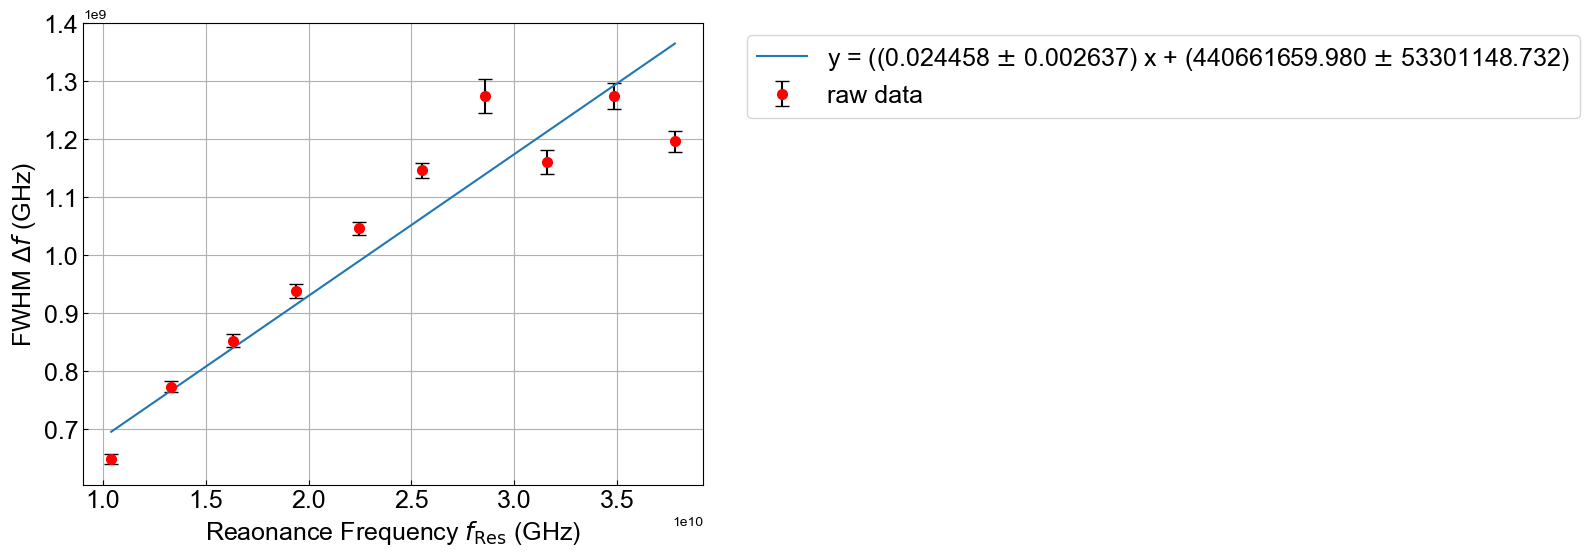

In [124]:
# ダンピング定数

#印加磁場vs.共鳴周波数
plt.rcParams['font.family'] = 'arial'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
fig = plt.figure(figsize=(12, 10))
gs = gridspec.GridSpec(2, 2, height_ratios=[2, 2])
##########データの代入##################################################################################################
Filename='data'
filename='240118nico25-2'
date='240517'

path='/Users/ueno2/iCloudDrive/研究/FeCoNi3元合金/データ/PPMS-OPFMR'
save_path='/Users/ueno2/iCloudDrive/研究/FeCoNi3元合金/データ/PPMS-OPFMR/fitted_data/liner'
f=open(f'{path}/{Filename}/{filename}.txt','rt')
x_list=[]  #fres
y_list=[]  #deltaf
yerr_list=[] #フィッティング誤差

for i in range(1):
    next(f)
n=0
for line in f :
    n=n+1
    data = line[:-1].split('\t')
    x_list.append(float(data[1])*10**9)
    y_list.append(float(data[4])*10**9)
    yerr_list.append(float(data[6])*10**9)

x=np.array(x_list)
y=np.array(y_list)
yerr=np.array(yerr_list)

##########グラフのプロット##########################################################################################
fig=plt.figure(figsize=(8, 6))

###グラフ軸設定#################
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid(True)
plt.xlabel('Reaonance Frequency $f_\mathrm{Res}$ (GHz)', fontsize=18)
plt.ylabel('FWHM $\Delta f$ (GHz)', fontsize=18)

plt.errorbar(x_list,y_list, yerr = yerr_list, capsize=5, fmt='o', markersize=7, ecolor='black', markeredgecolor = "red", color='red',label="raw data")

p, cov =np.polyfit(x,y,1, w=1.0/yerr,cov=True) #1次関数フィティング
a = p[0]
b = p[1]
sigma_a = np.sqrt(cov[0,0])
sigma_b = np.sqrt(cov[1,1])
xx=np.linspace(x[0],x[-1],30)
yy=np.polyval(p,xx) #結果からyを計算
plt.plot(xx,yy,label="y = (({:.6f} $\pm$ {:.6f}) x + ({:.3f} $\pm$ {:.3f})".format(a,sigma_a,b,sigma_b))

print(f"試料名:{filename}")
print(f"傾き:{a}\t± {sigma_a}")
print(f"切片:{b}\t± {sigma_b}")
print(f"ダンピング定数α(×10^(-3))={a/2*10**3}\t±\t {sigma_a/2*10**3}")
print(f"不均一線幅ΔH(0)={2*np.pi/gamma*b}\t±\t {2*np.pi/gamma*sigma_b}")


plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',fontsize=18)

#print(x_list,y_list)

plt.show()
fig.savefig(f'{save_path}/damp_graph_{filename}.pdf',bbox_inches="tight",format="pdf", pad_inches=0.1)
fig.savefig(f'{save_path}/damp_graph_{filename}.png',bbox_inches="tight",format="png", pad_inches=0.1)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


試料名:t240118nico25-2
傾き:0.03255273243280311	± 0.0009680469024238255
切片:318689620.37800384	± 16835265.145151317
ダンピング定数α(×10^(-3))=16.276366216401552	± 0.48402345121191276
不均一線幅ΔH(0)=104.7710192926617	± 5.534688852519232


<Figure size 1200x1000 with 0 Axes>

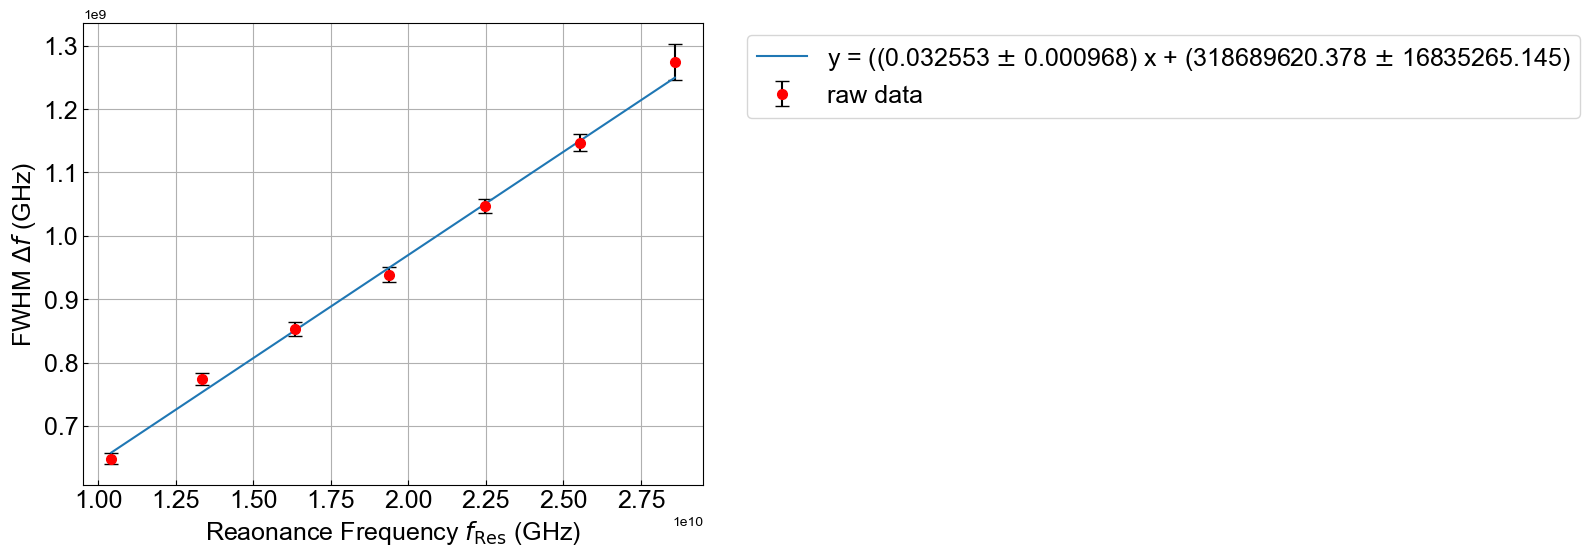

In [17]:
# ダンピング定数

#印加磁場vs.共鳴周波数
plt.rcParams['font.family'] = 'arial'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
fig = plt.figure(figsize=(12, 10))
gs = gridspec.GridSpec(2, 2, height_ratios=[2, 2])
##########データの代入##################################################################################################
Filename='data'
filename='t240118nico25-2'
date='240517'

path='/Users/ueno2/iCloudDrive/研究/FeCoNi3元合金/データ/PPMS-OPFMR'
save_path='/Users/ueno2/iCloudDrive/研究/FeCoNi3元合金/データ/PPMS-OPFMR/fitted_data/liner'
f=open(f'{path}/{Filename}/{filename}.txt','rt')
x_list=[]  #fres
y_list=[]  #deltaf
yerr_list=[] #フィッティング誤差

for i in range(1):
    next(f)
n=0
for line in f :
    n=n+1
    data = line[:-1].split('\t')
    x_list.append(float(data[1])*10**9)
    y_list.append(float(data[4])*10**9)
    yerr_list.append(float(data[6])*10**9)

x=np.array(x_list)
y=np.array(y_list)
yerr=np.array(yerr_list)

##########グラフのプロット##########################################################################################
fig=plt.figure(figsize=(8, 6))

###グラフ軸設定#################
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid(True)
plt.xlabel('Reaonance Frequency $f_\mathrm{Res}$ (GHz)', fontsize=18)
plt.ylabel('FWHM $\Delta f$ (GHz)', fontsize=18)

plt.errorbar(x_list,y_list, yerr = yerr_list, capsize=5, fmt='o', markersize=7, ecolor='black', markeredgecolor = "red", color='red',label="raw data")

p, cov =np.polyfit(x,y,1, w=1.0/yerr,cov=True) #1次関数フィティング
a = p[0]
b = p[1]
sigma_a = np.sqrt(cov[0,0])
sigma_b = np.sqrt(cov[1,1])
xx=np.linspace(x[0],x[-1],30)
yy=np.polyval(p,xx) #結果からyを計算
plt.plot(xx,yy,label="y = (({:.6f} $\pm$ {:.6f}) x + ({:.3f} $\pm$ {:.3f})".format(a,sigma_a,b,sigma_b))

print(f"試料名:{filename}")
print(f"傾き:{a}\t± {sigma_a}")
print(f"切片:{b}\t± {sigma_b}")
print(f"ダンピング定数α(×10^(-3))={a/2*10**3}\t± {sigma_a/2*10**3}")
print(f"不均一線幅ΔH(0)={2*np.pi/gamma*b}\t± {2*np.pi/gamma*sigma_b}")


plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',fontsize=18)

#print(x_list,y_list)

plt.show()
fig.savefig(f'{save_path}/damp_graph_{filename}.pdf',bbox_inches="tight",format="pdf", pad_inches=0.1)
fig.savefig(f'{save_path}/damp_graph_{filename}.png',bbox_inches="tight",format="png", pad_inches=0.1)

## a5nico30

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


試料名:a5nico30
傾き:3025880.9882486616	± 10161.114493527512
切片:-30544921074.482273	± 148916916.3843571
gamma=19012170.966638036	± 31922.0826451508
g-factor=2.1435307879457466	±	 0.007198122411722583
Ms,eff=803.2991373810373	±	 3.9163574913583474


<Figure size 1200x1000 with 0 Axes>

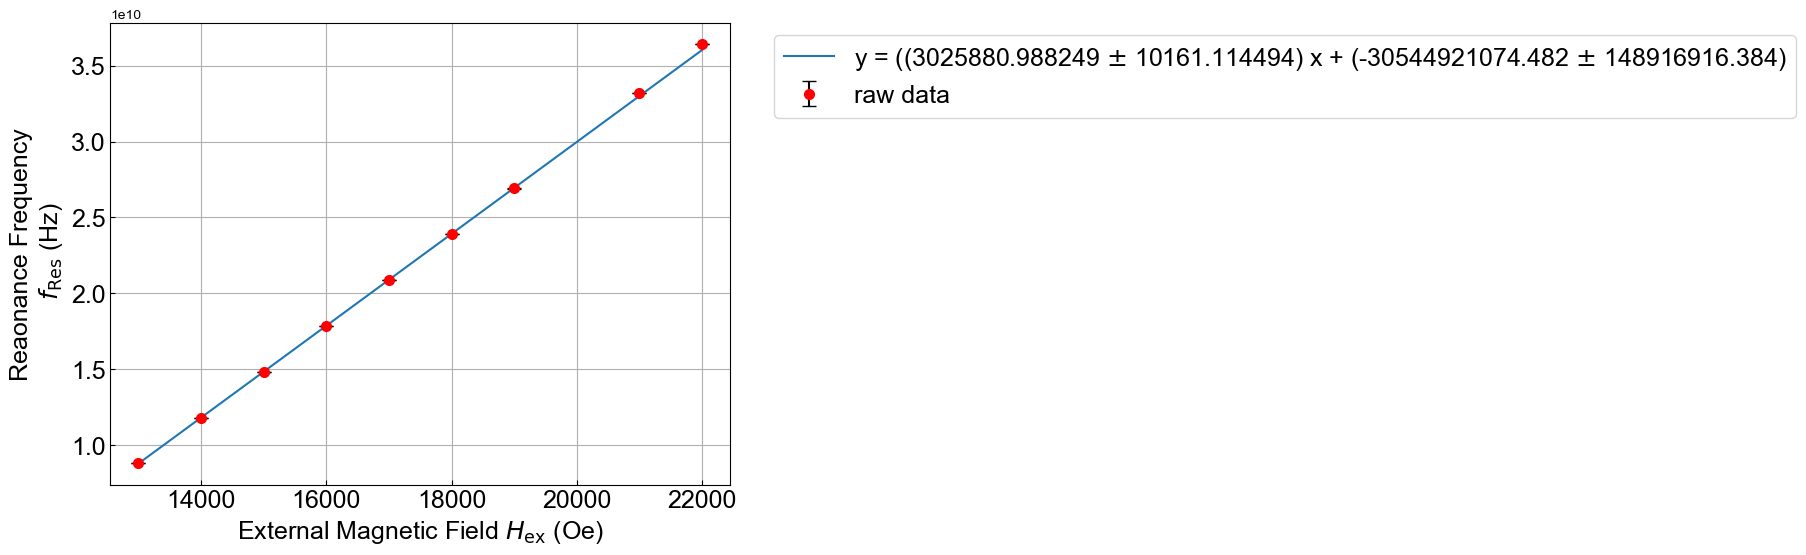

In [126]:
#印加磁場vs.共鳴周波数
plt.rcParams['font.family'] = 'arial'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
fig = plt.figure(figsize=(12, 10))
gs = gridspec.GridSpec(2, 2, height_ratios=[2, 2])
##########データの代入##################################################################################################
Filename='data'
filename='a5nico30'
date='240518'

path='/Users/ueno2/iCloudDrive/研究/FeCoNi3元合金/データ/PPMS-OPFMR'
save_path='/Users/ueno2/iCloudDrive/研究/FeCoNi3元合金/データ/PPMS-OPFMR/fitted_data/liner'
f=open(f'{path}/{Filename}/{filename}.txt','rt')
x_list=[]  #Hex
y_list=[]  #Freq
yerr_list=[] #フィッティング誤差

for i in range(1):
    next(f)
n=0
for line in f :
    n=n+1
    data = line[:-1].split('\t')
    x_list.append(float(data[0]))
    y_list.append(float(data[1])*10**9)
    yerr_list.append(float(data[3])*10**9)

x=np.array(x_list)
y=np.array(y_list)
yerr=np.array(yerr_list)

##########グラフのプロット##########################################################################################
fig=plt.figure(figsize=(8, 6))

###グラフ軸設定#################
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid(True)
plt.xlabel('External Magnetic Field $H_\mathrm{ex}$ (Oe)', fontsize=18)
plt.ylabel('Reaonance Frequency\n $f_\mathrm{Res} $ (Hz)', fontsize=18)

plt.errorbar(x_list,y_list, yerr = yerr_list, capsize=5, fmt='o', markersize=7, ecolor='black', markeredgecolor = "red", color='red',label="raw data")

p, cov =np.polyfit(x,y,1, w=1.0/yerr,cov=True) #1次関数フィティング
a = p[0]
b = p[1]
sigma_a = np.sqrt(cov[0,0])
sigma_b = np.sqrt(cov[1,1])
xx=np.linspace(x[0],x[-1],30001)
yy=np.polyval(p,xx) #結果からyを計算
plt.plot(xx,yy,label="y = (({:.6f} $\pm$ {:.6f}) x + ({:.3f} $\pm$ {:.3f})".format(a,sigma_a,b,sigma_b))

print(f"試料名:{filename}")
print(f"傾き:{a}\t± {sigma_a}")
print(f"切片:{b}\t± {sigma_b}")
print(f"gamma={2*np.pi*a}\t± {np.pi*sigma_a}")
print(f"g-factor={2*np.pi*a*hbar/muB}\t±\t {2*np.pi*sigma_a*hbar/muB}")
print(f"Ms,eff={-1/(2*2*np.pi*a)*b}\t±\t {1/(2*2*np.pi*a)*sigma_b}")
gamma=2*np.pi*a

plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',fontsize=18)

#print(x_list,y_list)

plt.show()
fig.savefig(f'{save_path}/g-factor_graph_{filename}.pdf',bbox_inches="tight",format="pdf", pad_inches=0.1)
fig.savefig(f'{save_path}/g-factor_graph_{filename}.png',bbox_inches="tight",format="png", pad_inches=0.1)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


試料名:ta5nico30
傾き:0.026990257056612683	± 0.004657319792432488
切片:-999179.8737932884	± 63811452.714352705
ダンピング定数α(×10^(-3))=13.495128528306342	±	 2.328659896216244
不均一線幅ΔH(0)=-0.33021122696950483	±	 21.08855337079397


<Figure size 1200x1000 with 0 Axes>

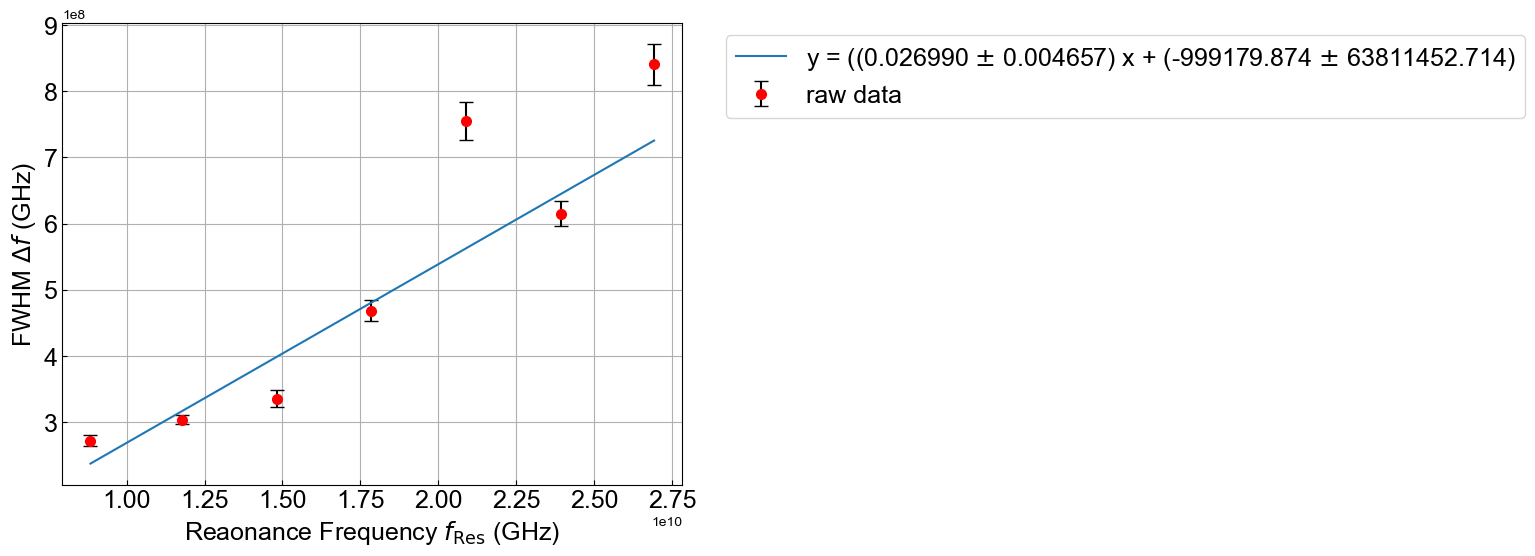

In [128]:
# ダンピング定数

#印加磁場vs.共鳴周波数
plt.rcParams['font.family'] = 'arial'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
fig = plt.figure(figsize=(12, 10))
gs = gridspec.GridSpec(2, 2, height_ratios=[2, 2])
##########データの代入##################################################################################################
Filename='data'
filename='ta5nico30'
date='240517'

path='/Users/ueno2/iCloudDrive/研究/FeCoNi3元合金/データ/PPMS-OPFMR'
save_path='/Users/ueno2/iCloudDrive/研究/FeCoNi3元合金/データ/PPMS-OPFMR/fitted_data/liner'
f=open(f'{path}/{Filename}/{filename}.txt','rt')
x_list=[]  #fres
y_list=[]  #deltaf
yerr_list=[] #フィッティング誤差

for i in range(1):
    next(f)
n=0
for line in f :
    n=n+1
    data = line[:-1].split('\t')
    x_list.append(float(data[1])*10**9)
    y_list.append(float(data[4])*10**9)
    yerr_list.append(float(data[6])*10**9)

x=np.array(x_list)
y=np.array(y_list)
yerr=np.array(yerr_list)

##########グラフのプロット##########################################################################################
fig=plt.figure(figsize=(8, 6))

###グラフ軸設定#################
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid(True)
plt.xlabel('Reaonance Frequency $f_\mathrm{Res}$ (GHz)', fontsize=18)
plt.ylabel('FWHM $\Delta f$ (GHz)', fontsize=18)

plt.errorbar(x_list,y_list, yerr = yerr_list, capsize=5, fmt='o', markersize=7, ecolor='black', markeredgecolor = "red", color='red',label="raw data")

p, cov =np.polyfit(x,y,1, w=1.0/yerr,cov=True) #1次関数フィティング
a = p[0]
b = p[1]
sigma_a = np.sqrt(cov[0,0])
sigma_b = np.sqrt(cov[1,1])
xx=np.linspace(x[0],x[-1],30)
yy=np.polyval(p,xx) #結果からyを計算
plt.plot(xx,yy,label="y = (({:.6f} $\pm$ {:.6f}) x + ({:.3f} $\pm$ {:.3f})".format(a,sigma_a,b,sigma_b))

print(f"試料名:{filename}")
print(f"傾き:{a}\t± {sigma_a}")
print(f"切片:{b}\t± {sigma_b}")
print(f"ダンピング定数α(×10^(-3))={a/2*10**3}\t±\t {sigma_a/2*10**3}")
print(f"不均一線幅ΔH(0)={2*np.pi/gamma*b}\t±\t {2*np.pi/gamma*sigma_b}")


plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',fontsize=18)

#print(x_list,y_list)

plt.show()
fig.savefig(f'{save_path}/damp_graph_{filename}.pdf',bbox_inches="tight",format="pdf", pad_inches=0.1)
fig.savefig(f'{save_path}/damp_graph_{filename}.png',bbox_inches="tight",format="png", pad_inches=0.1)

## 231120nico50(60)-1

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


試料名:231120nico50(60)-1
傾き:2996661.4252969837	± 11981.592652086903
切片:-42217615642.026726	± 252776057.39143845
gamma=18828579.038017847	± 37641.283454101664
g-factor=2.1228316814572614	±	 0.008487747151363583
Ms,eff=1121.1046663899265	±	 6.7125633028664575


<Figure size 1200x1000 with 0 Axes>

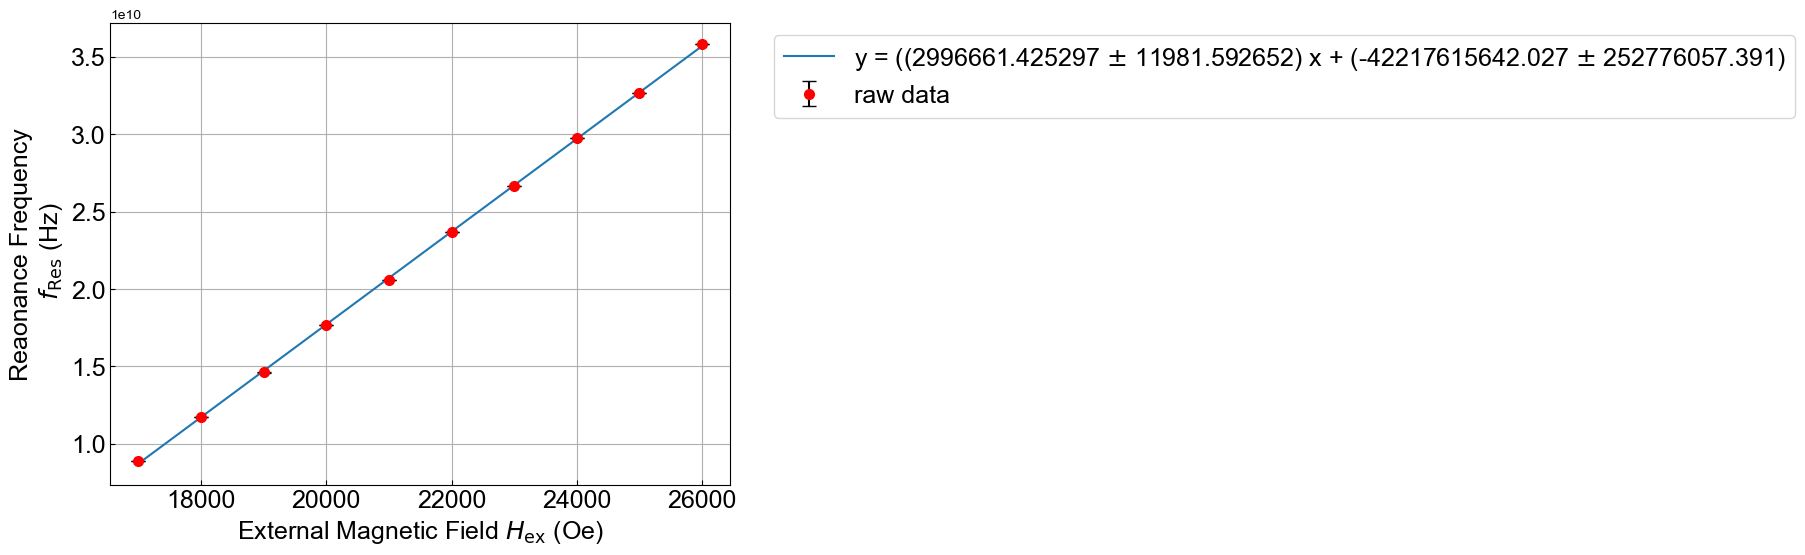

In [130]:
#印加磁場vs.共鳴周波数
plt.rcParams['font.family'] = 'arial'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
fig = plt.figure(figsize=(12, 10))
gs = gridspec.GridSpec(2, 2, height_ratios=[2, 2])
##########データの代入##################################################################################################
Filename='data'
filename='231120nico50(60)-1'
date='240519'

path='/Users/ueno2/iCloudDrive/研究/FeCoNi3元合金/データ/PPMS-OPFMR'
save_path='/Users/ueno2/iCloudDrive/研究/FeCoNi3元合金/データ/PPMS-OPFMR/fitted_data/liner'
f=open(f'{path}/{Filename}/{filename}.txt','rt')
x_list=[]  #Hex
y_list=[]  #Freq
yerr_list=[] #フィッティング誤差

for i in range(1):
    next(f)
n=0
for line in f :
    n=n+1
    data = line[:-1].split('\t')
    x_list.append(float(data[0]))
    y_list.append(float(data[1])*10**9)
    yerr_list.append(float(data[3])*10**9)

x=np.array(x_list)
y=np.array(y_list)
yerr=np.array(yerr_list)

##########グラフのプロット##########################################################################################
fig=plt.figure(figsize=(8, 6))

###グラフ軸設定#################
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid(True)
plt.xlabel('External Magnetic Field $H_\mathrm{ex}$ (Oe)', fontsize=18)
plt.ylabel('Reaonance Frequency\n $f_\mathrm{Res} $ (Hz)', fontsize=18)

plt.errorbar(x_list,y_list, yerr = yerr_list, capsize=5, fmt='o', markersize=7, ecolor='black', markeredgecolor = "red", color='red',label="raw data")

p, cov =np.polyfit(x,y,1, w=1.0/yerr,cov=True) #1次関数フィティング
a = p[0]
b = p[1]
sigma_a = np.sqrt(cov[0,0])
sigma_b = np.sqrt(cov[1,1])
xx=np.linspace(x[0],x[-1],30001)
yy=np.polyval(p,xx) #結果からyを計算
plt.plot(xx,yy,label="y = (({:.6f} $\pm$ {:.6f}) x + ({:.3f} $\pm$ {:.3f})".format(a,sigma_a,b,sigma_b))

print(f"試料名:{filename}")
print(f"傾き:{a}\t± {sigma_a}")
print(f"切片:{b}\t± {sigma_b}")
print(f"gamma={2*np.pi*a}\t± {np.pi*sigma_a}")
print(f"g-factor={2*np.pi*a*hbar/muB}\t±\t {2*np.pi*sigma_a*hbar/muB}")
print(f"Ms,eff={-1/(2*2*np.pi*a)*b}\t±\t {1/(2*2*np.pi*a)*sigma_b}")
gamma=2*np.pi*a

plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',fontsize=18)

#print(x_list,y_list)

plt.show()
fig.savefig(f'{save_path}/g-factor_graph_{filename}.pdf',bbox_inches="tight",format="pdf", pad_inches=0.1)
fig.savefig(f'{save_path}/g-factor_graph_{filename}.png',bbox_inches="tight",format="png", pad_inches=0.1)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


試料名:231120nico50(60)-1
傾き:0.023838512332655524	± 0.002812614246254679
切片:349377500.9873519	± 61427997.68731676
ダンピング定数α(×10^(-3))=11.919256166327761	±	 1.4063071231273396
不均一線幅ΔH(0)=116.5889139286821	±	 20.498811500277828


<Figure size 1200x1000 with 0 Axes>

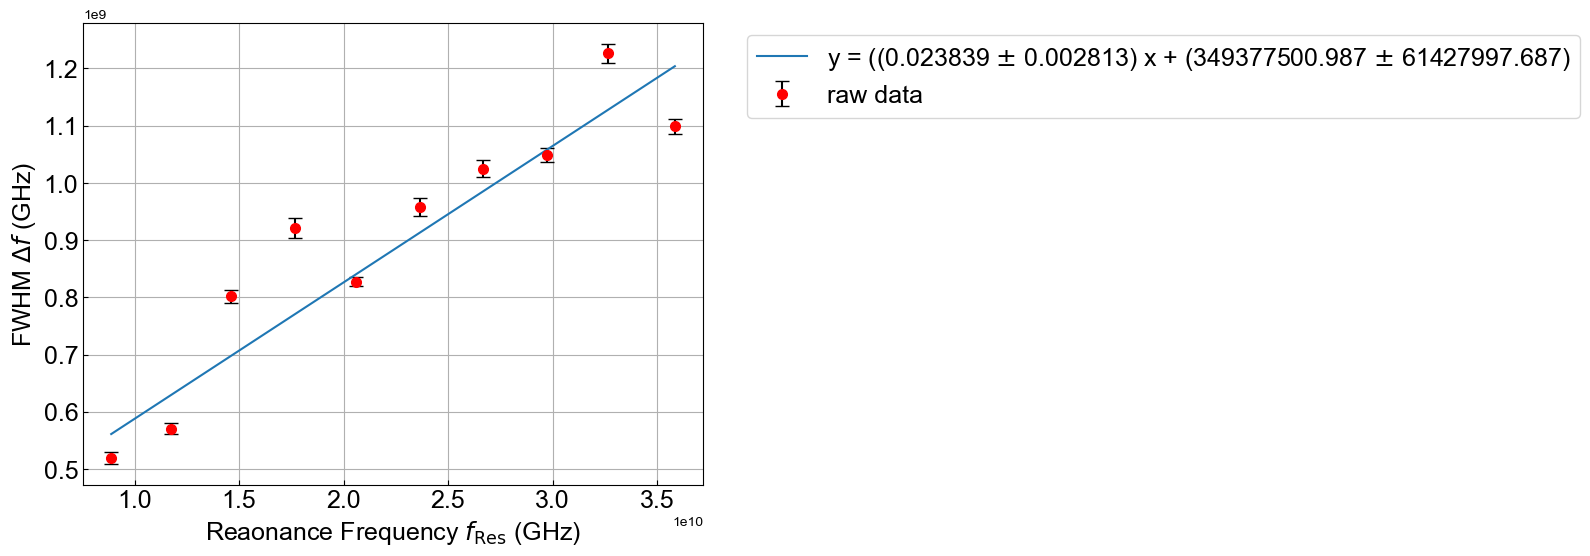

In [132]:
# ダンピング定数

#印加磁場vs.共鳴周波数
plt.rcParams['font.family'] = 'arial'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
fig = plt.figure(figsize=(12, 10))
gs = gridspec.GridSpec(2, 2, height_ratios=[2, 2])
##########データの代入##################################################################################################
Filename='data'
filename='231120nico50(60)-1'
date='240517'

path='/Users/ueno2/iCloudDrive/研究/FeCoNi3元合金/データ/PPMS-OPFMR'
save_path='/Users/ueno2/iCloudDrive/研究/FeCoNi3元合金/データ/PPMS-OPFMR/fitted_data/liner'
f=open(f'{path}/{Filename}/{filename}.txt','rt')
x_list=[]  #fres
y_list=[]  #deltaf
yerr_list=[] #フィッティング誤差

for i in range(1):
    next(f)
n=0
for line in f :
    n=n+1
    data = line[:-1].split('\t')
    x_list.append(float(data[1])*10**9)
    y_list.append(float(data[4])*10**9)
    yerr_list.append(float(data[6])*10**9)

x=np.array(x_list)
y=np.array(y_list)
yerr=np.array(yerr_list)

##########グラフのプロット##########################################################################################
fig=plt.figure(figsize=(8, 6))

###グラフ軸設定#################
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid(True)
plt.xlabel('Reaonance Frequency $f_\mathrm{Res}$ (GHz)', fontsize=18)
plt.ylabel('FWHM $\Delta f$ (GHz)', fontsize=18)

plt.errorbar(x_list,y_list, yerr = yerr_list, capsize=5, fmt='o', markersize=7, ecolor='black', markeredgecolor = "red", color='red',label="raw data")

p, cov =np.polyfit(x,y,1, w=1.0/yerr,cov=True) #1次関数フィティング
a = p[0]
b = p[1]
sigma_a = np.sqrt(cov[0,0])
sigma_b = np.sqrt(cov[1,1])
xx=np.linspace(x[0],x[-1],30)
yy=np.polyval(p,xx) #結果からyを計算
plt.plot(xx,yy,label="y = (({:.6f} $\pm$ {:.6f}) x + ({:.3f} $\pm$ {:.3f})".format(a,sigma_a,b,sigma_b))

print(f"試料名:{filename}")
print(f"傾き:{a}\t± {sigma_a}")
print(f"切片:{b}\t± {sigma_b}")
print(f"ダンピング定数α(×10^(-3))={a/2*10**3}\t±\t {sigma_a/2*10**3}")
print(f"不均一線幅ΔH(0)={2*np.pi/gamma*b}\t±\t {2*np.pi/gamma*sigma_b}")


plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',fontsize=18)

#print(x_list,y_list)

plt.show()
fig.savefig(f'{save_path}/damp_graph_{filename}.pdf',bbox_inches="tight",format="pdf", pad_inches=0.1)
fig.savefig(f'{save_path}/damp_graph_{filename}.png',bbox_inches="tight",format="png", pad_inches=0.1)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


試料名:t231120nico50(60)-1
傾き:0.024200664512992662	± 0.0020388483037979735
切片:313517363.8724196	± 45007009.262739845
ダンピング定数α(×10^(-3))=12.100332256496332	± 1.0194241518989868
不均一線幅ΔH(0)=104.62221765388409	± 15.01905049492851


<Figure size 1200x1000 with 0 Axes>

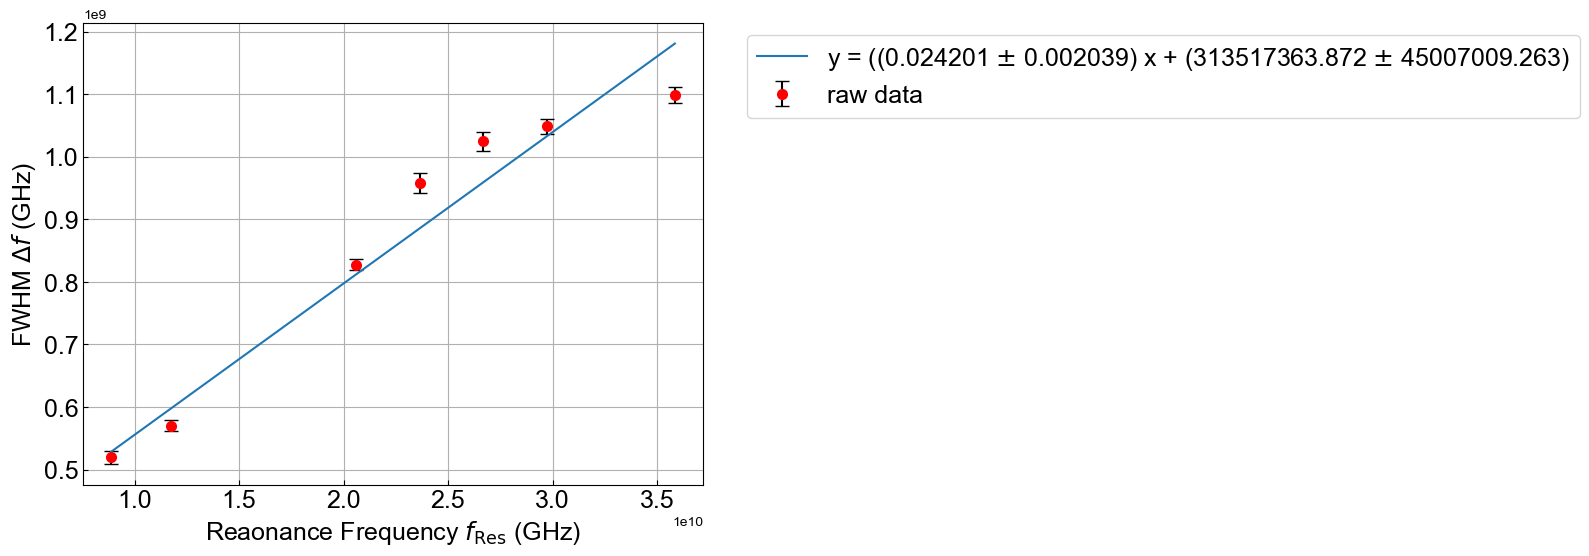

In [15]:
# ダンピング定数

#印加磁場vs.共鳴周波数
plt.rcParams['font.family'] = 'arial'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
fig = plt.figure(figsize=(12, 10))
gs = gridspec.GridSpec(2, 2, height_ratios=[2, 2])
##########データの代入##################################################################################################
Filename='data'
filename='t231120nico50(60)-1'
date='240517'

path='/Users/ueno2/iCloudDrive/研究/FeCoNi3元合金/データ/PPMS-OPFMR'
save_path='/Users/ueno2/iCloudDrive/研究/FeCoNi3元合金/データ/PPMS-OPFMR/fitted_data/liner'
f=open(f'{path}/{Filename}/{filename}.txt','rt')
x_list=[]  #fres
y_list=[]  #deltaf
yerr_list=[] #フィッティング誤差

for i in range(1):
    next(f)
n=0
for line in f :
    n=n+1
    data = line[:-1].split('\t')
    x_list.append(float(data[1])*10**9)
    y_list.append(float(data[4])*10**9)
    yerr_list.append(float(data[6])*10**9)

x=np.array(x_list)
y=np.array(y_list)
yerr=np.array(yerr_list)

##########グラフのプロット##########################################################################################
fig=plt.figure(figsize=(8, 6))

###グラフ軸設定#################
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid(True)
plt.xlabel('Reaonance Frequency $f_\mathrm{Res}$ (GHz)', fontsize=18)
plt.ylabel('FWHM $\Delta f$ (GHz)', fontsize=18)

plt.errorbar(x_list,y_list, yerr = yerr_list, capsize=5, fmt='o', markersize=7, ecolor='black', markeredgecolor = "red", color='red',label="raw data")

p, cov =np.polyfit(x,y,1, w=1.0/yerr,cov=True) #1次関数フィティング
a = p[0]
b = p[1]
sigma_a = np.sqrt(cov[0,0])
sigma_b = np.sqrt(cov[1,1])
xx=np.linspace(x[0],x[-1],30)
yy=np.polyval(p,xx) #結果からyを計算
plt.plot(xx,yy,label="y = (({:.6f} $\pm$ {:.6f}) x + ({:.3f} $\pm$ {:.3f})".format(a,sigma_a,b,sigma_b))

print(f"試料名:{filename}")
print(f"傾き:{a}\t± {sigma_a}")
print(f"切片:{b}\t± {sigma_b}")
print(f"ダンピング定数α(×10^(-3))={a/2*10**3}\t± {sigma_a/2*10**3}")
print(f"不均一線幅ΔH(0)={2*np.pi/gamma*b}\t± {2*np.pi/gamma*sigma_b}")


plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',fontsize=18)

#print(x_list,y_list)

plt.show()
fig.savefig(f'{save_path}/damp_graph_{filename}.pdf',bbox_inches="tight",format="pdf", pad_inches=0.1)
fig.savefig(f'{save_path}/damp_graph_{filename}.png',bbox_inches="tight",format="png", pad_inches=0.1)

## a8nico80

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


試料名:a8nico80
傾き:2974100.163721228	± 9742.533591344354
切片:-53347386039.75196	± 242457776.32366917
gamma=18686822.450773623	± 30607.07195791921
g-factor=2.1068493083929067	±	 0.0069016001576880604
Ms,eff=1427.4065636435532	±	 6.487399796363762


<Figure size 1200x1000 with 0 Axes>

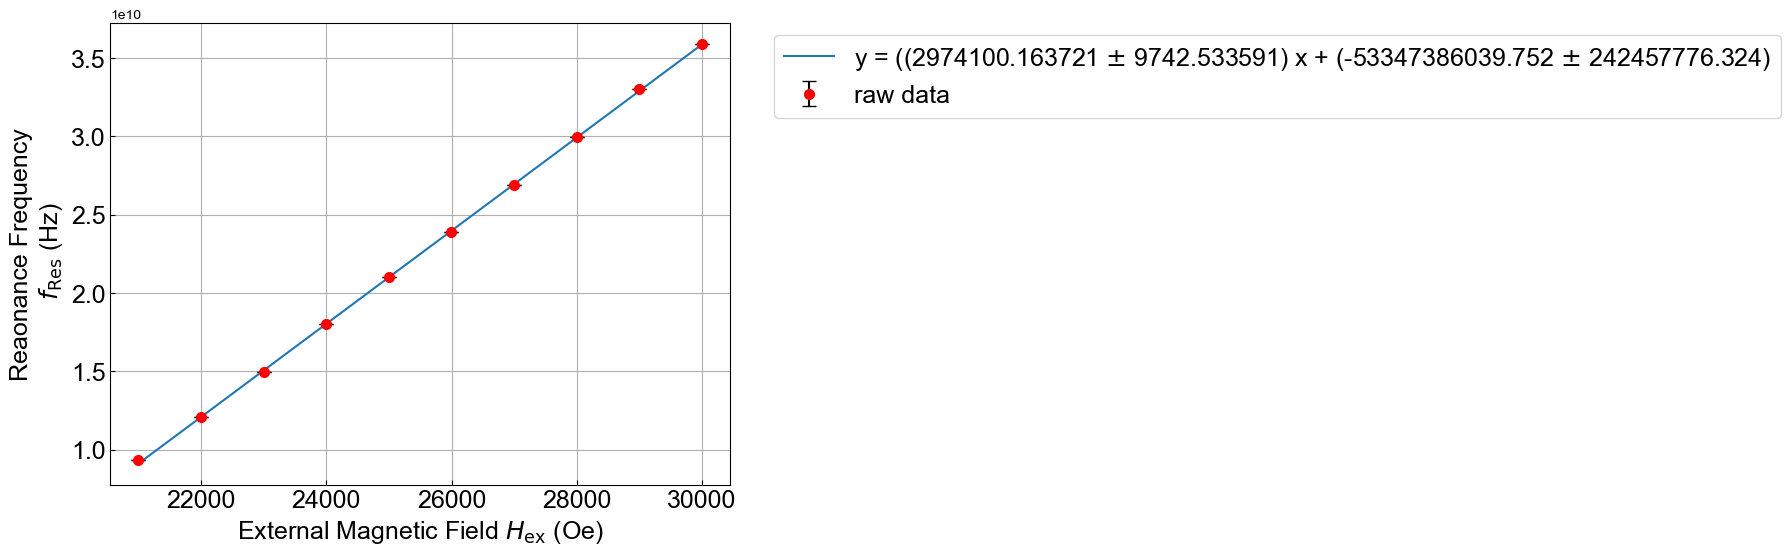

In [134]:
#印加磁場vs.共鳴周波数
plt.rcParams['font.family'] = 'arial'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
fig = plt.figure(figsize=(12, 10))
gs = gridspec.GridSpec(2, 2, height_ratios=[2, 2])
##########データの代入##################################################################################################
Filename='data'
filename='a8nico80'
date='240519'

path='/Users/ueno2/iCloudDrive/研究/FeCoNi3元合金/データ/PPMS-OPFMR'
save_path='/Users/ueno2/iCloudDrive/研究/FeCoNi3元合金/データ/PPMS-OPFMR/fitted_data/liner'
f=open(f'{path}/{Filename}/{filename}.txt','rt')
x_list=[]  #Hex
y_list=[]  #Freq
yerr_list=[] #フィッティング誤差

for i in range(1):
    next(f)
n=0
for line in f :
    n=n+1
    data = line[:-1].split('\t')
    x_list.append(float(data[0]))
    y_list.append(float(data[1])*10**9)
    yerr_list.append(float(data[3])*10**9)

x=np.array(x_list)
y=np.array(y_list)
yerr=np.array(yerr_list)

##########グラフのプロット##########################################################################################
fig=plt.figure(figsize=(8, 6))

###グラフ軸設定#################
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid(True)
plt.xlabel('External Magnetic Field $H_\mathrm{ex}$ (Oe)', fontsize=18)
plt.ylabel('Reaonance Frequency\n $f_\mathrm{Res} $ (Hz)', fontsize=18)

plt.errorbar(x_list,y_list, yerr = yerr_list, capsize=5, fmt='o', markersize=7, ecolor='black', markeredgecolor = "red", color='red',label="raw data")

p, cov =np.polyfit(x,y,1, w=1.0/yerr,cov=True) #1次関数フィティング
a = p[0]
b = p[1]
sigma_a = np.sqrt(cov[0,0])
sigma_b = np.sqrt(cov[1,1])
xx=np.linspace(x[0],x[-1],30001)
yy=np.polyval(p,xx) #結果からyを計算
plt.plot(xx,yy,label="y = (({:.6f} $\pm$ {:.6f}) x + ({:.3f} $\pm$ {:.3f})".format(a,sigma_a,b,sigma_b))

print(f"試料名:{filename}")
print(f"傾き:{a}\t± {sigma_a}")
print(f"切片:{b}\t± {sigma_b}")
print(f"gamma={2*np.pi*a}\t± {np.pi*sigma_a}")
print(f"g-factor={2*np.pi*a*hbar/muB}\t±\t {2*np.pi*sigma_a*hbar/muB}")
print(f"Ms,eff={-1/(2*2*np.pi*a)*b}\t±\t {1/(2*2*np.pi*a)*sigma_b}")
gamma=2*np.pi*a

plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',fontsize=18)

#print(x_list,y_list)

plt.show()
fig.savefig(f'{save_path}/g-factor_graph_{filename}.pdf',bbox_inches="tight",format="pdf", pad_inches=0.1)
fig.savefig(f'{save_path}/g-factor_graph_{filename}.png',bbox_inches="tight",format="png", pad_inches=0.1)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


試料名:a8nico80
傾き:0.0157447116398665	± 0.003158791570970195
切片:308521165.56577235	± 65939797.06849643
ダンピング定数α(×10^(-3))=7.872355819933251	±	 1.5793957854850975
不均一線幅ΔH(0)=103.73597006892571	±	 22.171343747209846


<Figure size 1200x1000 with 0 Axes>

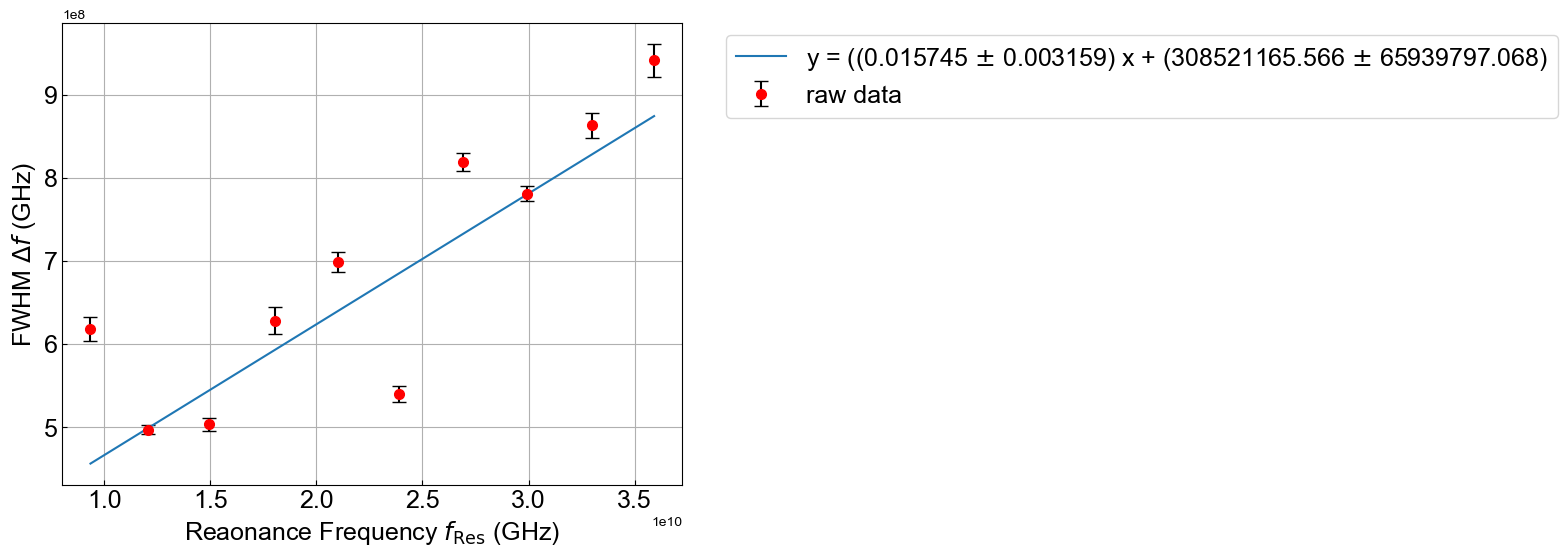

In [136]:
# ダンピング定数

#印加磁場vs.共鳴周波数
plt.rcParams['font.family'] = 'arial'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
fig = plt.figure(figsize=(12, 10))
gs = gridspec.GridSpec(2, 2, height_ratios=[2, 2])
##########データの代入##################################################################################################
Filename='data'
filename='a8nico80'
date='240517'

path='/Users/ueno2/iCloudDrive/研究/FeCoNi3元合金/データ/PPMS-OPFMR'
save_path='/Users/ueno2/iCloudDrive/研究/FeCoNi3元合金/データ/PPMS-OPFMR/fitted_data/liner'
f=open(f'{path}/{Filename}/{filename}.txt','rt')
x_list=[]  #fres
y_list=[]  #deltaf
yerr_list=[] #フィッティング誤差

for i in range(1):
    next(f)
n=0
for line in f :
    n=n+1
    data = line[:-1].split('\t')
    x_list.append(float(data[1])*10**9)
    y_list.append(float(data[4])*10**9)
    yerr_list.append(float(data[6])*10**9)

x=np.array(x_list)
y=np.array(y_list)
yerr=np.array(yerr_list)

##########グラフのプロット##########################################################################################
fig=plt.figure(figsize=(8, 6))

###グラフ軸設定#################
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid(True)
plt.xlabel('Reaonance Frequency $f_\mathrm{Res}$ (GHz)', fontsize=18)
plt.ylabel('FWHM $\Delta f$ (GHz)', fontsize=18)

plt.errorbar(x_list,y_list, yerr = yerr_list, capsize=5, fmt='o', markersize=7, ecolor='black', markeredgecolor = "red", color='red',label="raw data")

p, cov =np.polyfit(x,y,1, w=1.0/yerr,cov=True) #1次関数フィティング
a = p[0]
b = p[1]
sigma_a = np.sqrt(cov[0,0])
sigma_b = np.sqrt(cov[1,1])
xx=np.linspace(x[0],x[-1],30)
yy=np.polyval(p,xx) #結果からyを計算
plt.plot(xx,yy,label="y = (({:.6f} $\pm$ {:.6f}) x + ({:.3f} $\pm$ {:.3f})".format(a,sigma_a,b,sigma_b))

print(f"試料名:{filename}")
print(f"傾き:{a}\t± {sigma_a}")
print(f"切片:{b}\t± {sigma_b}")
print(f"ダンピング定数α(×10^(-3))={a/2*10**3}\t±\t {sigma_a/2*10**3}")
print(f"不均一線幅ΔH(0)={2*np.pi/gamma*b}\t±\t {2*np.pi/gamma*sigma_b}")


plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',fontsize=18)

#print(x_list,y_list)

plt.show()
fig.savefig(f'{save_path}/damp_graph_{filename}.pdf',bbox_inches="tight",format="pdf", pad_inches=0.1)
fig.savefig(f'{save_path}/damp_graph_{filename}.png',bbox_inches="tight",format="png", pad_inches=0.1)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


試料名:ta8nico80
傾き:0.017068815879123313	± 0.003072936833143414
切片:269691917.63995117	± 65414469.79406543
ダンピング定数α(×10^(-3))=8.534407939561657	± 1.536468416571707
不均一線幅ΔH(0)=90.6801730922571	± 21.994709724980513


<Figure size 1200x1000 with 0 Axes>

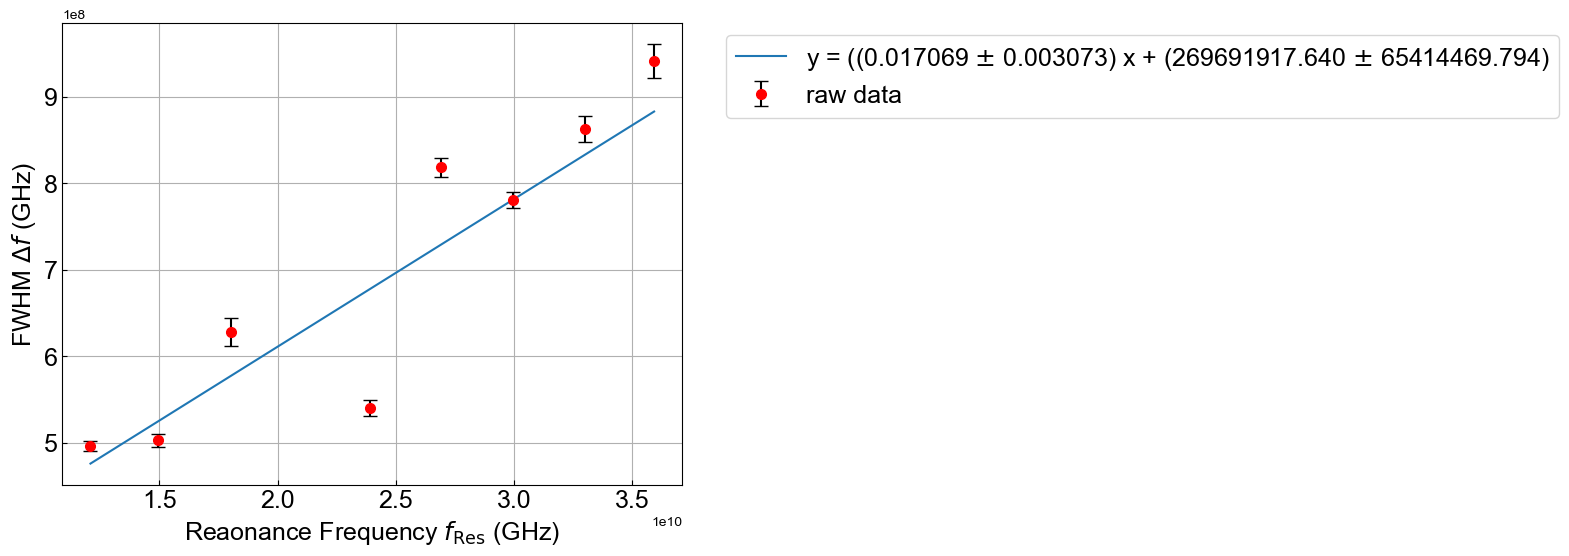

In [15]:
# ダンピング定数

#印加磁場vs.共鳴周波数
plt.rcParams['font.family'] = 'arial'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
fig = plt.figure(figsize=(12, 10))
gs = gridspec.GridSpec(2, 2, height_ratios=[2, 2])
##########データの代入##################################################################################################
Filename='data'
filename='ta8nico80'
date='240517'

path='/Users/ueno2/iCloudDrive/研究/FeCoNi3元合金/データ/PPMS-OPFMR'
save_path='/Users/ueno2/iCloudDrive/研究/FeCoNi3元合金/データ/PPMS-OPFMR/fitted_data/liner'
f=open(f'{path}/{Filename}/{filename}.txt','rt')
x_list=[]  #fres
y_list=[]  #deltaf
yerr_list=[] #フィッティング誤差

for i in range(1):
    next(f)
n=0
for line in f :
    n=n+1
    data = line[:-1].split('\t')
    x_list.append(float(data[1])*10**9)
    y_list.append(float(data[4])*10**9)
    yerr_list.append(float(data[6])*10**9)

x=np.array(x_list)
y=np.array(y_list)
yerr=np.array(yerr_list)

##########グラフのプロット##########################################################################################
fig=plt.figure(figsize=(8, 6))

###グラフ軸設定#################
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid(True)
plt.xlabel('Reaonance Frequency $f_\mathrm{Res}$ (GHz)', fontsize=18)
plt.ylabel('FWHM $\Delta f$ (GHz)', fontsize=18)

plt.errorbar(x_list,y_list, yerr = yerr_list, capsize=5, fmt='o', markersize=7, ecolor='black', markeredgecolor = "red", color='red',label="raw data")

p, cov =np.polyfit(x,y,1, w=1.0/yerr,cov=True) #1次関数フィティング
a = p[0]
b = p[1]
sigma_a = np.sqrt(cov[0,0])
sigma_b = np.sqrt(cov[1,1])
xx=np.linspace(x[0],x[-1],30)
yy=np.polyval(p,xx) #結果からyを計算
plt.plot(xx,yy,label="y = (({:.6f} $\pm$ {:.6f}) x + ({:.3f} $\pm$ {:.3f})".format(a,sigma_a,b,sigma_b))

print(f"試料名:{filename}")
print(f"傾き:{a}\t± {sigma_a}")
print(f"切片:{b}\t± {sigma_b}")
print(f"ダンピング定数α(×10^(-3))={a/2*10**3}\t± {sigma_a/2*10**3}")
print(f"不均一線幅ΔH(0)={2*np.pi/gamma*b}\t± {2*np.pi/gamma*sigma_b}")


plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',fontsize=18)

#print(x_list,y_list)

plt.show()
fig.savefig(f'{save_path}/damp_graph_{filename}.pdf',bbox_inches="tight",format="pdf", pad_inches=0.1)
fig.savefig(f'{save_path}/damp_graph_{filename}.png',bbox_inches="tight",format="png", pad_inches=0.1)

# (Ni80Co20)100-xFex

## 240405Fe

In [49]:
#印加磁場vs.共鳴周波数
plt.rcParams['font.family'] = 'arial'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
fig = plt.figure(figsize=(12, 10))
gs = gridspec.GridSpec(2, 2, height_ratios=[2, 2])
##########データの代入##################################################################################################
Filename='PPMS-OPFMR'
filename='240405Fe-damp'
date='240505'

path='/Users/ueno2/iCloudDrive/研究/FeCoNi3元合金/データ'
save_path='/Users/ueno2/iCloudDrive/研究/FeCoNi3元合金/データ/PPMS-OPFMR/test'
f=open(f'{path}/{Filename}/{filename}.txt','rt')
x_list=[]  #Hex
y_list=[]  #Freq
yerr_list=[] #フィッティング誤差

n=0
for line in f :
    n=n+1
    data = line[:-1].split('\t')
    x_list.append(float(data[0]))
    y_list.append(float(data[1]))
    yerr_list.append(float(data[2]))

x=np.array(x_list)
y=np.array(y_list)
yerr=np.array(yerr_list)

##########グラフのプロット##########################################################################################
fig=plt.figure(figsize=(8, 6))

###グラフ軸設定#################
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid(True)
plt.xlabel('External Magnetic Field $H_\mathrm{ex}$ (Oe)', fontsize=18)
plt.ylabel('Reaonance Frequency\n $f_\mathrm{Res} $ (GHz)', fontsize=18)

plt.errorbar(x_list,y_list, yerr = yerr_list, capsize=5, fmt='o', markersize=7, ecolor='black', markeredgecolor = "red", color='red',label="raw data")

p, cov =np.polyfit(x,y,1, w=1.0/yerr,cov=True) #1次関数フィティング
a = p[0]
b = p[1]
sigma_a = np.sqrt(cov[0,0])
sigma_b = np.sqrt(cov[1,1])
xx=np.linspace(x[0],x[-1],30001)
yy=np.polyval(p,xx) #結果からyを計算
plt.plot(xx,yy,label="y = (({:.6f} $\pm$ {:.6f}) x + ({:.3f} $\pm$ {:.3f})".format(a,sigma_a,b,sigma_b))

print(f"試料名:{filename}")
print(f"傾き:{a}\t± {sigma_a}")
print(f"切片:{b}\t± {sigma_b}")
print(f"gamma={2*np.pi*a}\t± {np.pi*sigma_a}")
print(f"g-factor={2*np.pi*a*hbar/muB}\t± {2*np.pi*sigma_a*hbar/muB}")
print(f"Ms,eff={-1/(2*2*np.pi*a)*b}\t± {1/(2*2*np.pi*a)*sigma_b}")
gamma=2*np.pi*a

plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',fontsize=18)

#print(x_list,y_list)

plt.show()
fig.savefig(f'{save_path}/g-factor_graph_{filename}.pdf',bbox_inches="tight",format="pdf", pad_inches=0.1)
fig.savefig(f'{save_path}/g-factor_graph_{filename}.png',bbox_inches="tight",format="png", pad_inches=0.1)


FileNotFoundError: [Errno 2] No such file or directory: '/Users/ueno2/iCloudDrive/研究/FeCoNi3元合金/データ/PPMS-OPFMR/240405Fe-damp.txt'

<Figure size 1200x1000 with 0 Axes>

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


試料名:240405Fe-damp2
傾き:0.008860691925526094	± 0.0006700475474088616
切片:-1575939.399941799	± 12319532.19384569
ダンピング定数α(×10^(-3))=4.430345962763047	± 0.3350237737044308
不均一線幅ΔH(0)=-0.586684983137038	± 4.586270600043047


<Figure size 1200x1000 with 0 Axes>

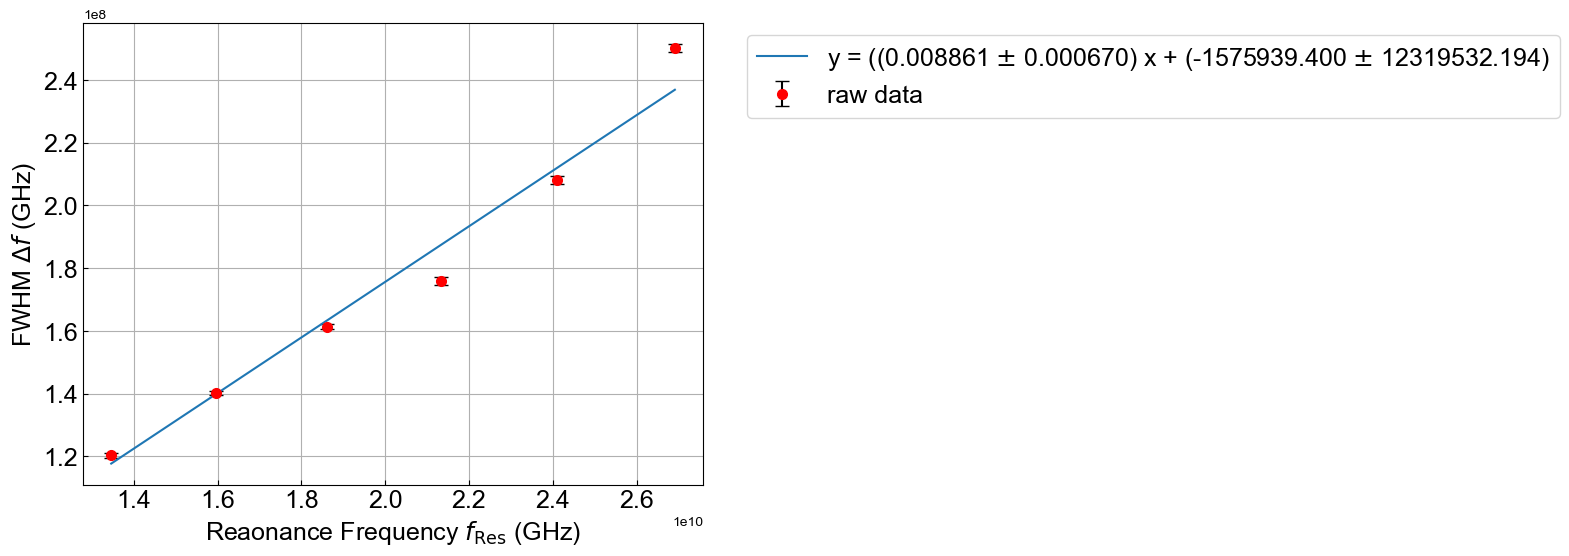

In [97]:
# ダンピング定数

#印加磁場vs.共鳴周波数
plt.rcParams['font.family'] = 'arial'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
fig = plt.figure(figsize=(12, 10))
gs = gridspec.GridSpec(2, 2, height_ratios=[2, 2])
##########データの代入##################################################################################################
Filename='PPMS-OPFMR'
filename='240405Fe-damp2'
date='240505'

path='/Users/ueno2/iCloudDrive/研究/FeCoNi3元合金/データ'
save_path='/Users/ueno2/iCloudDrive/研究/FeCoNi3元合金/データ/PPMS-OPFMR/test'
f=open(f'{path}/{Filename}/{filename}.txt','rt')
x_list=[]  #fres
y_list=[]  #deltaf
yerr_list=[] #フィッティング誤差

n=0
for line in f :
    n=n+1
    data = line[:-1].split('\t')
    x_list.append(float(data[0]))
    y_list.append(float(data[1]))
    yerr_list.append(float(data[2]))

x=np.array(x_list)
y=np.array(y_list)
yerr=np.array(yerr_list)

##########グラフのプロット##########################################################################################
fig=plt.figure(figsize=(8, 6))

###グラフ軸設定#################
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid(True)
plt.xlabel('Reaonance Frequency $f_\mathrm{Res}$ (GHz)', fontsize=18)
plt.ylabel('FWHM $\Delta f$ (GHz)', fontsize=18)

plt.errorbar(x_list,y_list, yerr = yerr_list, capsize=5, fmt='o', markersize=7, ecolor='black', markeredgecolor = "red", color='red',label="raw data")

p, cov =np.polyfit(x,y,1, w=1.0/yerr,cov=True) #1次関数フィティング
a = p[0]
b = p[1]
sigma_a = np.sqrt(cov[0,0])
sigma_b = np.sqrt(cov[1,1])
xx=np.linspace(x[0],x[-1],30)
yy=np.polyval(p,xx) #結果からyを計算
plt.plot(xx,yy,label="y = (({:.6f} $\pm$ {:.6f}) x + ({:.3f} $\pm$ {:.3f})".format(a,sigma_a,b,sigma_b))

print(f"試料名:{filename}")
print(f"傾き:{a}\t± {sigma_a}")
print(f"切片:{b}\t± {sigma_b}")
print(f"ダンピング定数α(×10^(-3))={a/2*10**3}\t± {sigma_a/2*10**3}")
print(f"不均一線幅ΔH(0)={2*np.pi/gamma*b}\t± {2*np.pi/gamma*sigma_b}")


plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',fontsize=18)

#print(x_list,y_list)

plt.show()
fig.savefig(f'{save_path}/graph_{filename}.pdf',bbox_inches="tight",format="pdf", pad_inches=0.1)
fig.savefig(f'{save_path}/graph_{filename}.png',bbox_inches="tight",format="png", pad_inches=0.1)

## 240510Fe

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


試料名:240510Fe_analysis
傾き:2826875.845053022	± 11381.165869044298
切片:-58093197889.650826	± 325385828.40655386
gamma=17761784.774858024	± 35754.98708347646
g-factor=2.0025557618108616	±	 0.00806240547389597
Ms,eff=1635.342355118566	±	 9.159716563707624


<Figure size 1200x1000 with 0 Axes>

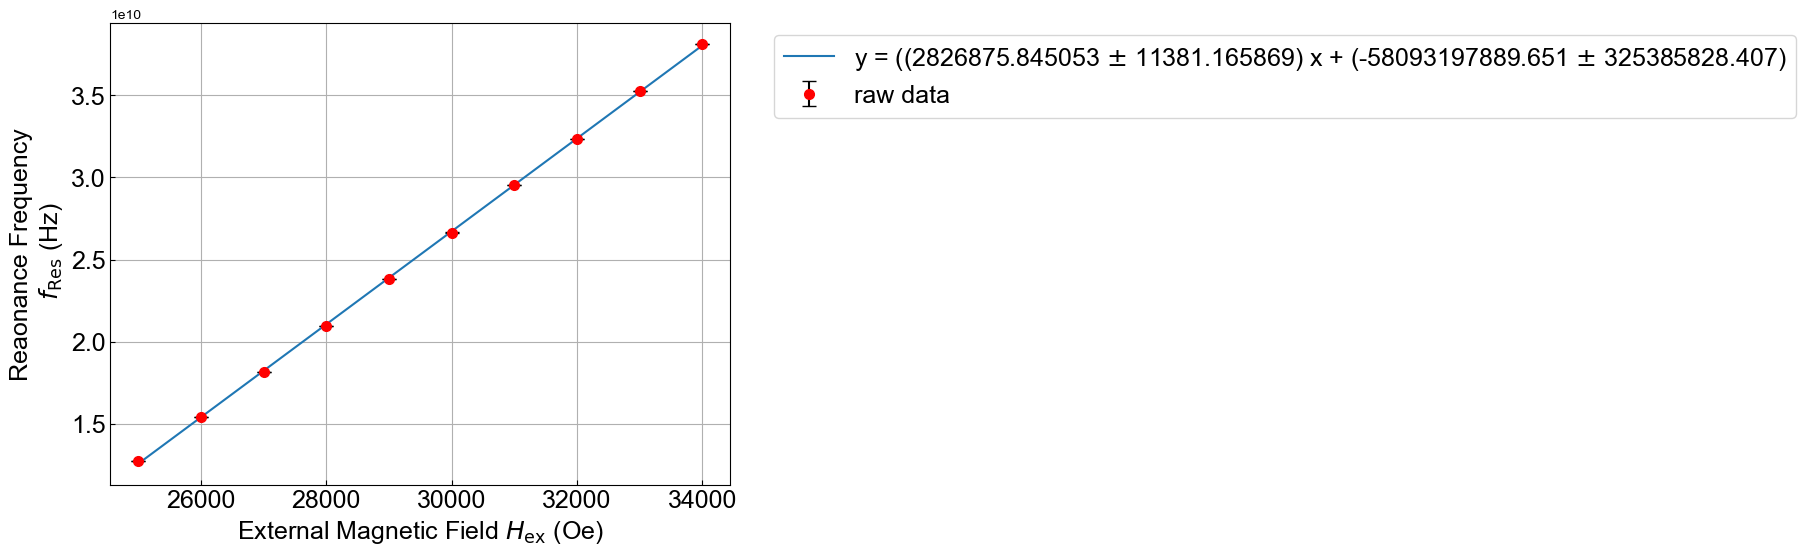

In [166]:
#印加磁場vs.共鳴周波数
plt.rcParams['font.family'] = 'arial'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
fig = plt.figure(figsize=(12, 10))
gs = gridspec.GridSpec(2, 2, height_ratios=[2, 2])
##########データの代入##################################################################################################
Filename='data'
filename='240510Fe_analysis'
date='240513'

path='/Users/ueno2/iCloudDrive/研究/FeCoNi3元合金/データ/PPMS-OPFMR'
save_path='/Users/ueno2/iCloudDrive/研究/FeCoNi3元合金/データ/PPMS-OPFMR/fitted_data/liner'
f=open(f'{path}/{Filename}/{filename}.txt','rt')
x_list=[]  #Hex
y_list=[]  #Freq
yerr_list=[] #フィッティング誤差

for i in range(3):
    next(f)
n=0
for line in f :
    n=n+1
    data = line[:-1].split('\t')
    x_list.append(float(data[0]))
    y_list.append(float(data[1])*10**9)
    yerr_list.append(float(data[3])*10**9)

x=np.array(x_list)
y=np.array(y_list)
yerr=np.array(yerr_list)

##########グラフのプロット##########################################################################################
fig=plt.figure(figsize=(8, 6))

###グラフ軸設定#################
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid(True)
plt.xlabel('External Magnetic Field $H_\mathrm{ex}$ (Oe)', fontsize=18)
plt.ylabel('Reaonance Frequency\n $f_\mathrm{Res} $ (Hz)', fontsize=18)

plt.errorbar(x_list,y_list, yerr = yerr_list, capsize=5, fmt='o', markersize=7, ecolor='black', markeredgecolor = "red", color='red',label="raw data")

p, cov =np.polyfit(x,y,1, w=1.0/yerr,cov=True) #1次関数フィティング
a = p[0]
b = p[1]
sigma_a = np.sqrt(cov[0,0])
sigma_b = np.sqrt(cov[1,1])
xx=np.linspace(x[0],x[-1],30001)
yy=np.polyval(p,xx) #結果からyを計算
plt.plot(xx,yy,label="y = (({:.6f} $\pm$ {:.6f}) x + ({:.3f} $\pm$ {:.3f})".format(a,sigma_a,b,sigma_b))

print(f"試料名:{filename}")
print(f"傾き:{a}\t± {sigma_a}")
print(f"切片:{b}\t± {sigma_b}")
print(f"gamma={2*np.pi*a}\t± {np.pi*sigma_a}")
print(f"g-factor={2*np.pi*a*hbar/muB}\t±\t {2*np.pi*sigma_a*hbar/muB}")
print(f"Ms,eff={-1/(2*2*np.pi*a)*b}\t±\t {1/(2*2*np.pi*a)*sigma_b}")
gamma=2*np.pi*a

plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',fontsize=18)

#print(x_list,y_list)

plt.show()
fig.savefig(f'{save_path}/g-factor_graph_{filename}.pdf',bbox_inches="tight",format="pdf", pad_inches=0.1)
fig.savefig(f'{save_path}/g-factor_graph_{filename}.png',bbox_inches="tight",format="png", pad_inches=0.1)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


試料名:t240510Fe_analysis
傾き:0.008263637200715972	± 0.0001803709597523655
切片:6860723.325547948	± 4222859.183865633
ダンピング定数α(×10^(-3))=4.131818600357986	±	 0.09018547987618275
不均一線幅ΔH(0)=2.5002405923979616	±	 1.5389286881989415


<Figure size 1200x1000 with 0 Axes>

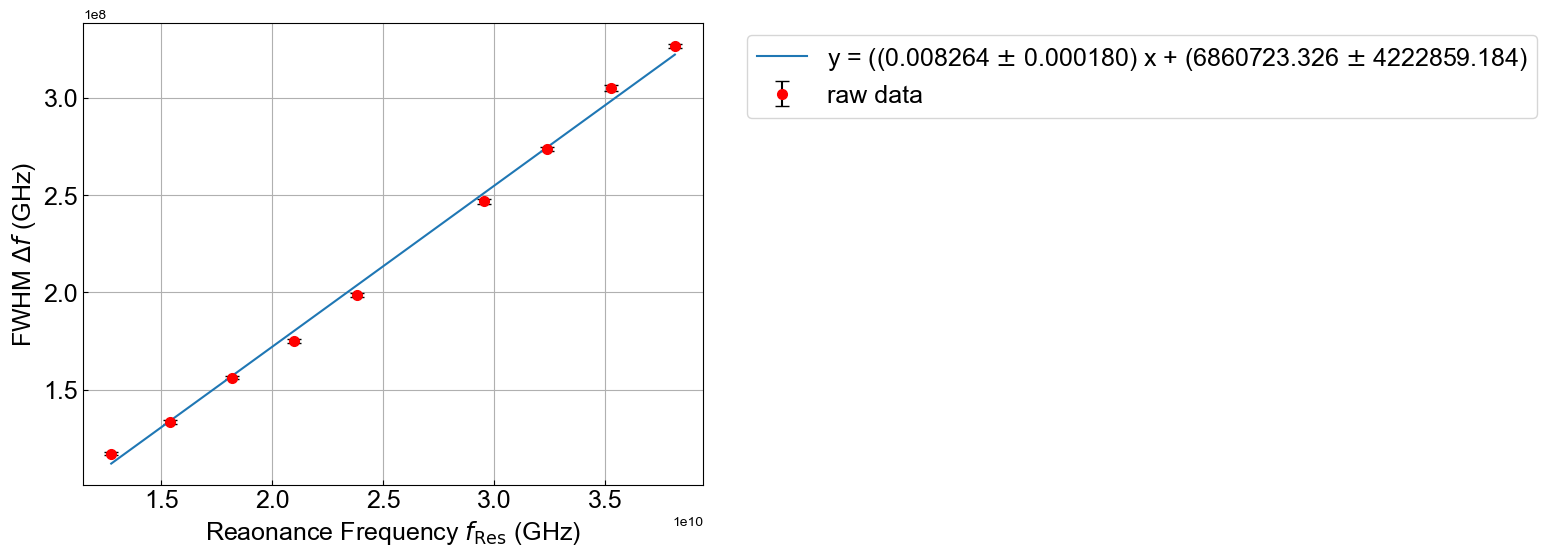

In [164]:
# ダンピング定数

#印加磁場vs.共鳴周波数
plt.rcParams['font.family'] = 'arial'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
fig = plt.figure(figsize=(12, 10))
gs = gridspec.GridSpec(2, 2, height_ratios=[2, 2])
##########データの代入##################################################################################################
Filename='data'
filename='t240510Fe_analysis'
date='240513'

path='/Users/ueno2/iCloudDrive/研究/FeCoNi3元合金/データ/PPMS-OPFMR'
save_path='/Users/ueno2/iCloudDrive/研究/FeCoNi3元合金/データ/PPMS-OPFMR/fitted_data/liner'
f=open(f'{path}/{Filename}/{filename}.txt','rt')
x_list=[]  #fres
y_list=[]  #deltaf
yerr_list=[] #フィッティング誤差

for i in range(3):
    next(f)
n=0
for line in f :
    n=n+1
    data = line[:-1].split('\t')
    x_list.append(float(data[1])*10**9)
    y_list.append(float(data[4])*10**9)
    yerr_list.append(float(data[6])*10**9)

x=np.array(x_list)
y=np.array(y_list)
yerr=np.array(yerr_list)

##########グラフのプロット##########################################################################################
fig=plt.figure(figsize=(8, 6))

###グラフ軸設定#################
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid(True)
plt.xlabel('Reaonance Frequency $f_\mathrm{Res}$ (GHz)', fontsize=18)
plt.ylabel('FWHM $\Delta f$ (GHz)', fontsize=18)

plt.errorbar(x_list,y_list, yerr = yerr_list, capsize=5, fmt='o', markersize=7, ecolor='black', markeredgecolor = "red", color='red',label="raw data")

p, cov =np.polyfit(x,y,1, w=1.0/yerr,cov=True) #1次関数フィティング
a = p[0]
b = p[1]
sigma_a = np.sqrt(cov[0,0])
sigma_b = np.sqrt(cov[1,1])
xx=np.linspace(x[0],x[-1],30)
yy=np.polyval(p,xx) #結果からyを計算
plt.plot(xx,yy,label="y = (({:.6f} $\pm$ {:.6f}) x + ({:.3f} $\pm$ {:.3f})".format(a,sigma_a,b,sigma_b))

print(f"試料名:{filename}")
print(f"傾き:{a}\t± {sigma_a}")
print(f"切片:{b}\t± {sigma_b}")
print(f"ダンピング定数α(×10^(-3))={a/2*10**3}\t±\t {sigma_a/2*10**3}")
print(f"不均一線幅ΔH(0)={2*np.pi/gamma*b}\t±\t {2*np.pi/gamma*sigma_b}")


plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',fontsize=18)

#print(x_list,y_list)

plt.show()
fig.savefig(f'{save_path}/damp_graph_{filename}.pdf',bbox_inches="tight",format="pdf", pad_inches=0.1)
fig.savefig(f'{save_path}/damp_graph_{filename}.png',bbox_inches="tight",format="png", pad_inches=0.1)

## 240302NiCo20-1

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


試料名:240302nico20-1_analysis1
傾き:3010617.805432272	± 3049.6433406609676
切片:-27573282070.588223	± 47233138.41567946
gamma=18916269.560625304	± 9580.73711508953
g-factor=2.1327183659053435	±	 0.002160364012447175
Ms,eff=728.8245174932035	±	 1.2484792063334844


<Figure size 1200x1000 with 0 Axes>

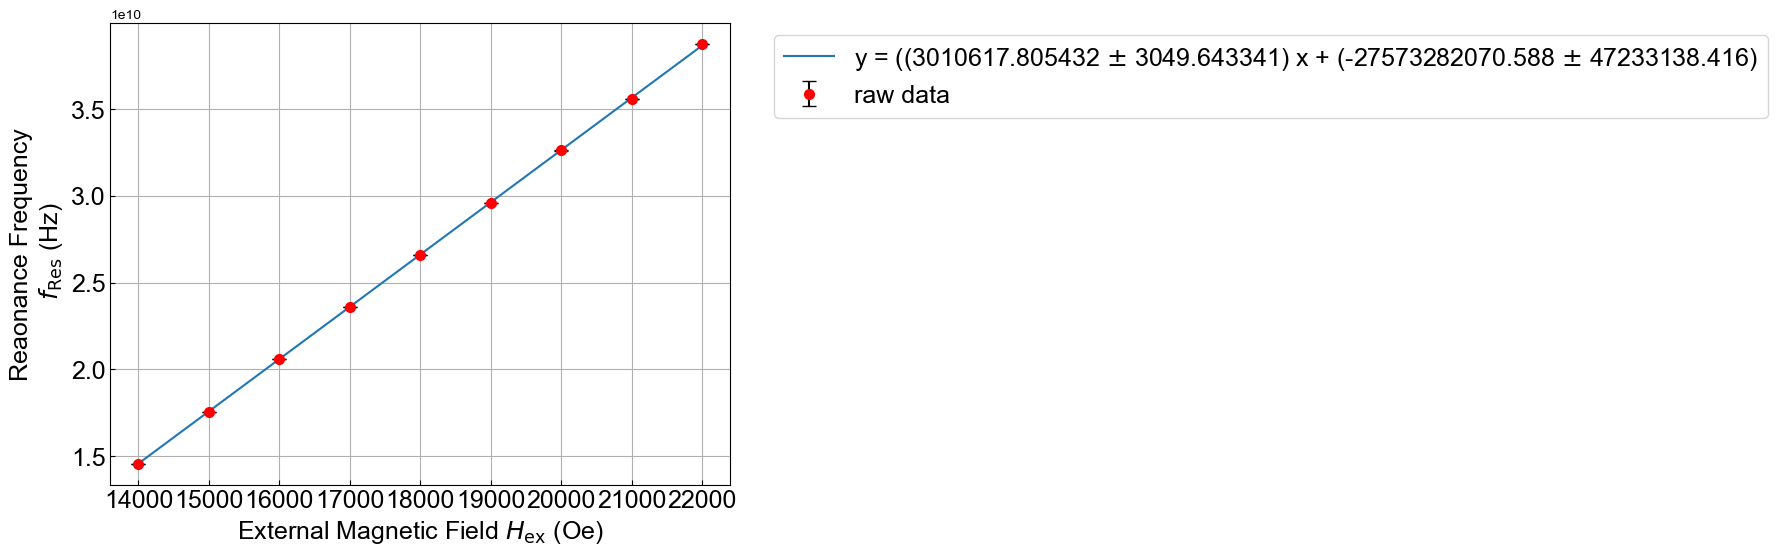

In [118]:
#印加磁場vs.共鳴周波数
plt.rcParams['font.family'] = 'arial'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
fig = plt.figure(figsize=(12, 10))
gs = gridspec.GridSpec(2, 2, height_ratios=[2, 2])
##########データの代入##################################################################################################
Filename='data'
filename='240302nico20-1_analysis1'
date='240513'

path='/Users/ueno2/iCloudDrive/研究/FeCoNi3元合金/データ/PPMS-OPFMR'
save_path='/Users/ueno2/iCloudDrive/研究/FeCoNi3元合金/データ/PPMS-OPFMR/fitted_data/liner'
f=open(f'{path}/{Filename}/{filename}.txt','rt')
x_list=[]  #Hex
y_list=[]  #Freq
yerr_list=[] #フィッティング誤差

for i in range(1):
    next(f)
n=0
for line in f :
    n=n+1
    data = line[:-1].split('\t')
    x_list.append(float(data[0]))
    y_list.append(float(data[1])*10**9)
    yerr_list.append(float(data[3])*10**9)

x=np.array(x_list)
y=np.array(y_list)
yerr=np.array(yerr_list)

##########グラフのプロット##########################################################################################
fig=plt.figure(figsize=(8, 6))

###グラフ軸設定#################
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid(True)
plt.xlabel('External Magnetic Field $H_\mathrm{ex}$ (Oe)', fontsize=18)
plt.ylabel('Reaonance Frequency\n $f_\mathrm{Res} $ (Hz)', fontsize=18)

plt.errorbar(x_list,y_list, yerr = yerr_list, capsize=5, fmt='o', markersize=7, ecolor='black', markeredgecolor = "red", color='red',label="raw data")

p, cov =np.polyfit(x,y,1, w=1.0/yerr,cov=True) #1次関数フィティング
a = p[0]
b = p[1]
sigma_a = np.sqrt(cov[0,0])
sigma_b = np.sqrt(cov[1,1])
xx=np.linspace(x[0],x[-1],30001)
yy=np.polyval(p,xx) #結果からyを計算
plt.plot(xx,yy,label="y = (({:.6f} $\pm$ {:.6f}) x + ({:.3f} $\pm$ {:.3f})".format(a,sigma_a,b,sigma_b))

print(f"試料名:{filename}")
print(f"傾き:{a}\t± {sigma_a}")
print(f"切片:{b}\t± {sigma_b}")
print(f"gamma={2*np.pi*a}\t± {np.pi*sigma_a}")
print(f"g-factor={2*np.pi*a*hbar/muB}\t±\t {2*np.pi*sigma_a*hbar/muB}")
print(f"Ms,eff={-1/(2*2*np.pi*a)*b}\t±\t {1/(2*2*np.pi*a)*sigma_b}")
gamma=2*np.pi*a

plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',fontsize=18)

#print(x_list,y_list)

plt.show()
fig.savefig(f'{save_path}/g-factor_graph_{filename}.pdf',bbox_inches="tight",format="pdf", pad_inches=0.1)
fig.savefig(f'{save_path}/g-factor_graph_{filename}.png',bbox_inches="tight",format="png", pad_inches=0.1)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


試料名:240302nico20-1_analysis1
傾き:0.028295308853895976	± 0.002313211188122143
切片:-10154811.765661763	± 44833014.4965377
ダンピング定数α(×10^(-3))=14.147654426947987	±	 1.1566055940610716
不均一線幅ΔH(0)=-3.3729993051056537	±	 14.891632679393012


<Figure size 1200x1000 with 0 Axes>

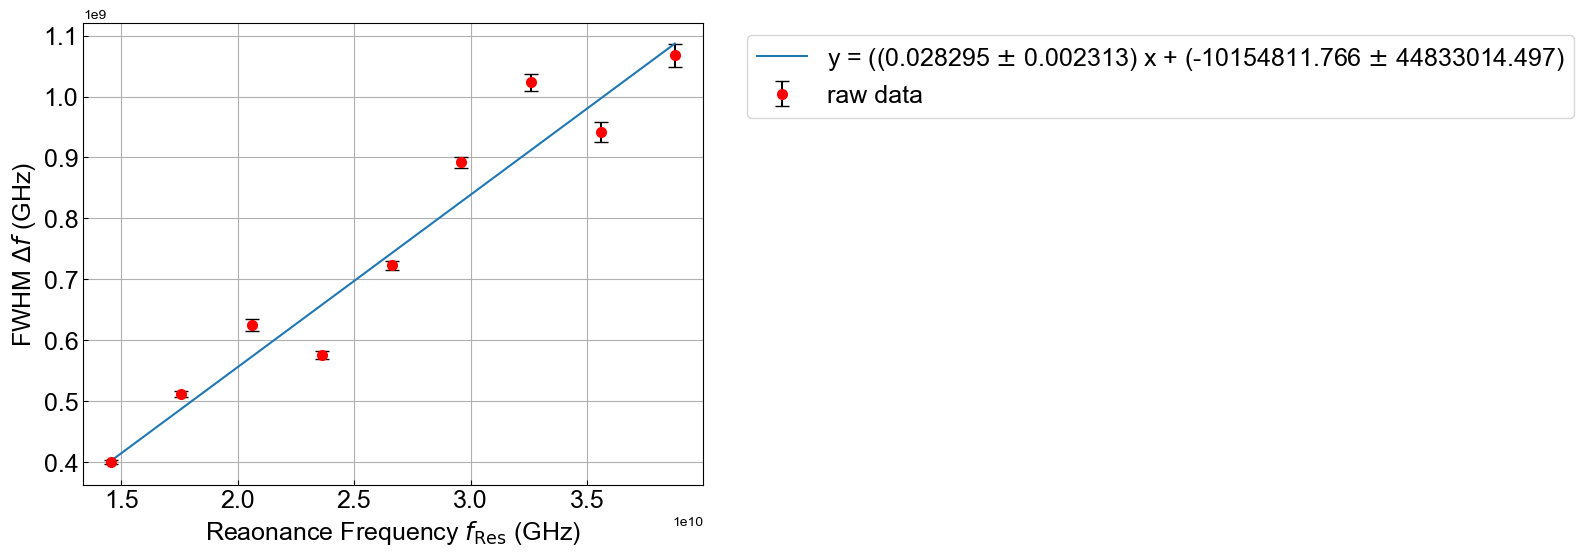

In [120]:
# ダンピング定数

#印加磁場vs.共鳴周波数
plt.rcParams['font.family'] = 'arial'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
fig = plt.figure(figsize=(12, 10))
gs = gridspec.GridSpec(2, 2, height_ratios=[2, 2])
##########データの代入##################################################################################################
Filename='data'
filename='240302nico20-1_analysis1'
date='240513'

path='/Users/ueno2/iCloudDrive/研究/FeCoNi3元合金/データ/PPMS-OPFMR'
save_path='/Users/ueno2/iCloudDrive/研究/FeCoNi3元合金/データ/PPMS-OPFMR/fitted_data/liner'
f=open(f'{path}/{Filename}/{filename}.txt','rt')
x_list=[]  #fres
y_list=[]  #deltaf
yerr_list=[] #フィッティング誤差

for i in range(1):
    next(f)
n=0
for line in f :
    n=n+1
    data = line[:-1].split('\t')
    x_list.append(float(data[1])*10**9)
    y_list.append(float(data[4])*10**9)
    yerr_list.append(float(data[6])*10**9)

x=np.array(x_list)
y=np.array(y_list)
yerr=np.array(yerr_list)

##########グラフのプロット##########################################################################################
fig=plt.figure(figsize=(8, 6))

###グラフ軸設定#################
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid(True)
plt.xlabel('Reaonance Frequency $f_\mathrm{Res}$ (GHz)', fontsize=18)
plt.ylabel('FWHM $\Delta f$ (GHz)', fontsize=18)

plt.errorbar(x_list,y_list, yerr = yerr_list, capsize=5, fmt='o', markersize=7, ecolor='black', markeredgecolor = "red", color='red',label="raw data")

p, cov =np.polyfit(x,y,1, w=1.0/yerr,cov=True) #1次関数フィティング
a = p[0]
b = p[1]
sigma_a = np.sqrt(cov[0,0])
sigma_b = np.sqrt(cov[1,1])
xx=np.linspace(x[0],x[-1],30)
yy=np.polyval(p,xx) #結果からyを計算
plt.plot(xx,yy,label="y = (({:.6f} $\pm$ {:.6f}) x + ({:.3f} $\pm$ {:.3f})".format(a,sigma_a,b,sigma_b))

print(f"試料名:{filename}")
print(f"傾き:{a}\t± {sigma_a}")
print(f"切片:{b}\t± {sigma_b}")
print(f"ダンピング定数α(×10^(-3))={a/2*10**3}\t±\t {sigma_a/2*10**3}")
print(f"不均一線幅ΔH(0)={2*np.pi/gamma*b}\t±\t {2*np.pi/gamma*sigma_b}")


plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',fontsize=18)

#print(x_list,y_list)

plt.show()
fig.savefig(f'{save_path}/damp_graph_{filename}.pdf',bbox_inches="tight",format="pdf", pad_inches=0.1)
fig.savefig(f'{save_path}/damp_graph_{filename}.png',bbox_inches="tight",format="png", pad_inches=0.1)

## 240401nicofe20-1

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


試料名:240401nicofe20-1-analysis
傾き:2924440.359143212	± 1456.1073912669008
切片:-39673888770.55718	± 30464683.759620614
gamma=18374800.69629162	± 4574.496283241894
g-factor=2.071670357056173	±	 0.0010315048859679307
Ms,eff=1079.5733087478907	±	 0.8289799781547823


<Figure size 1200x1000 with 0 Axes>

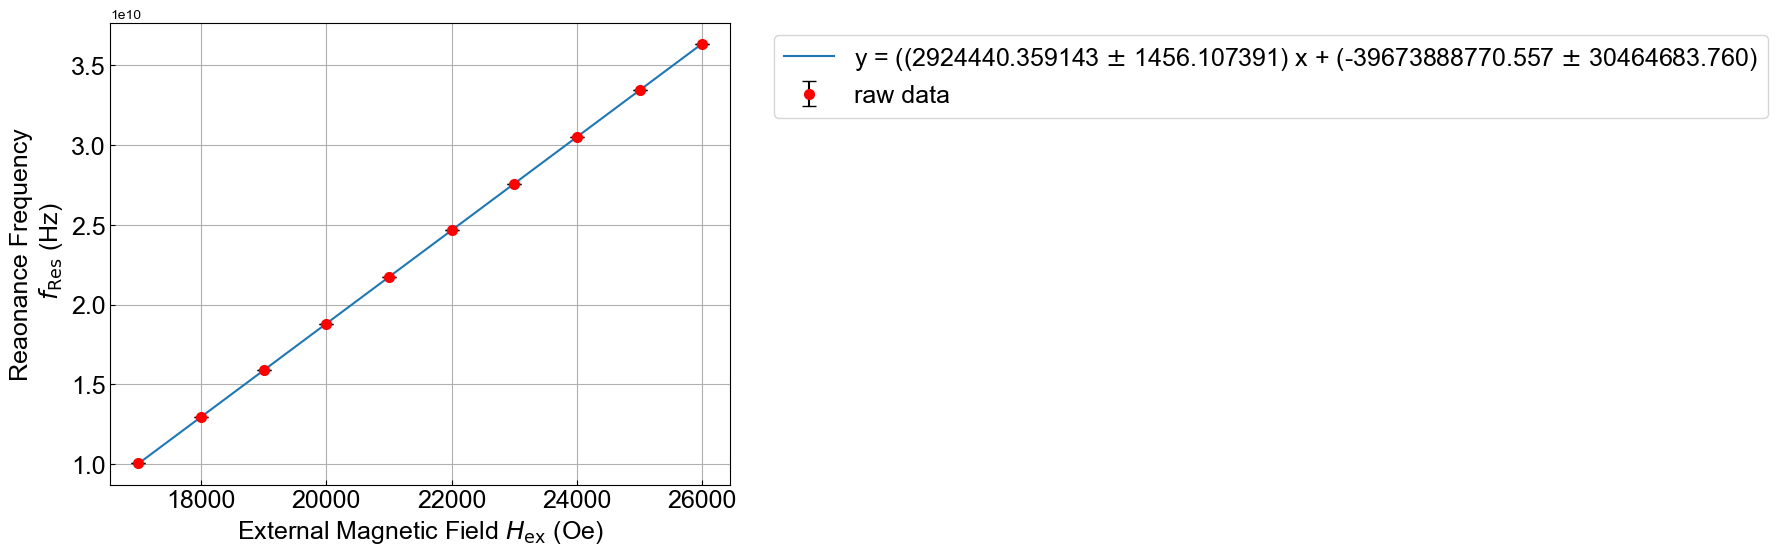

In [144]:
#印加磁場vs.共鳴周波数
plt.rcParams['font.family'] = 'arial'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
fig = plt.figure(figsize=(12, 10))
gs = gridspec.GridSpec(2, 2, height_ratios=[2, 2])
##########データの代入##################################################################################################
Filename='data'
filename='240401nicofe20-1-analysis'
date='240513'

path='/Users/ueno2/iCloudDrive/研究/FeCoNi3元合金/データ/PPMS-OPFMR'
save_path='/Users/ueno2/iCloudDrive/研究/FeCoNi3元合金/データ/PPMS-OPFMR/fitted_data/liner'
f=open(f'{path}/{Filename}/{filename}.txt','rt')
x_list=[]  #Hex
y_list=[]  #Freq
yerr_list=[] #フィッティング誤差

for i in range(1):
    next(f)
n=0
for line in f :
    n=n+1
    data = line[:-1].split('\t')
    x_list.append(float(data[0]))
    y_list.append(float(data[1])*10**9)
    yerr_list.append(float(data[3])*10**9)

x=np.array(x_list)
y=np.array(y_list)
yerr=np.array(yerr_list)

##########グラフのプロット##########################################################################################
fig=plt.figure(figsize=(8, 6))

###グラフ軸設定#################
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid(True)
plt.xlabel('External Magnetic Field $H_\mathrm{ex}$ (Oe)', fontsize=18)
plt.ylabel('Reaonance Frequency\n $f_\mathrm{Res} $ (Hz)', fontsize=18)

plt.errorbar(x_list,y_list, yerr = yerr_list, capsize=5, fmt='o', markersize=7, ecolor='black', markeredgecolor = "red", color='red',label="raw data")

p, cov =np.polyfit(x,y,1, w=1.0/yerr,cov=True) #1次関数フィティング
a = p[0]
b = p[1]
sigma_a = np.sqrt(cov[0,0])
sigma_b = np.sqrt(cov[1,1])
xx=np.linspace(x[0],x[-1],30001)
yy=np.polyval(p,xx) #結果からyを計算
plt.plot(xx,yy,label="y = (({:.6f} $\pm$ {:.6f}) x + ({:.3f} $\pm$ {:.3f})".format(a,sigma_a,b,sigma_b))

print(f"試料名:{filename}")
print(f"傾き:{a}\t± {sigma_a}")
print(f"切片:{b}\t± {sigma_b}")
print(f"gamma={2*np.pi*a}\t± {np.pi*sigma_a}")
print(f"g-factor={2*np.pi*a*hbar/muB}\t±\t {2*np.pi*sigma_a*hbar/muB}")
print(f"Ms,eff={-1/(2*2*np.pi*a)*b}\t±\t {1/(2*2*np.pi*a)*sigma_b}")
gamma=2*np.pi*a

plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',fontsize=18)

#print(x_list,y_list)

plt.show()
fig.savefig(f'{save_path}/g-factor_graph_{filename}.pdf',bbox_inches="tight",format="pdf", pad_inches=0.1)
fig.savefig(f'{save_path}/g-factor_graph_{filename}.png',bbox_inches="tight",format="png", pad_inches=0.1)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


試料名:240401nicofe20-1-analysis
傾き:0.008541036790906203	± 0.0003285726333585112
切片:72470221.15173231	± 7336378.357645019
ダンピング定数α(×10^(-3))=4.270518395453101	± 0.1642863166792556
不均一線幅ΔH(0)=24.780885315426392	± 2.508643520360386


<Figure size 1200x1000 with 0 Axes>

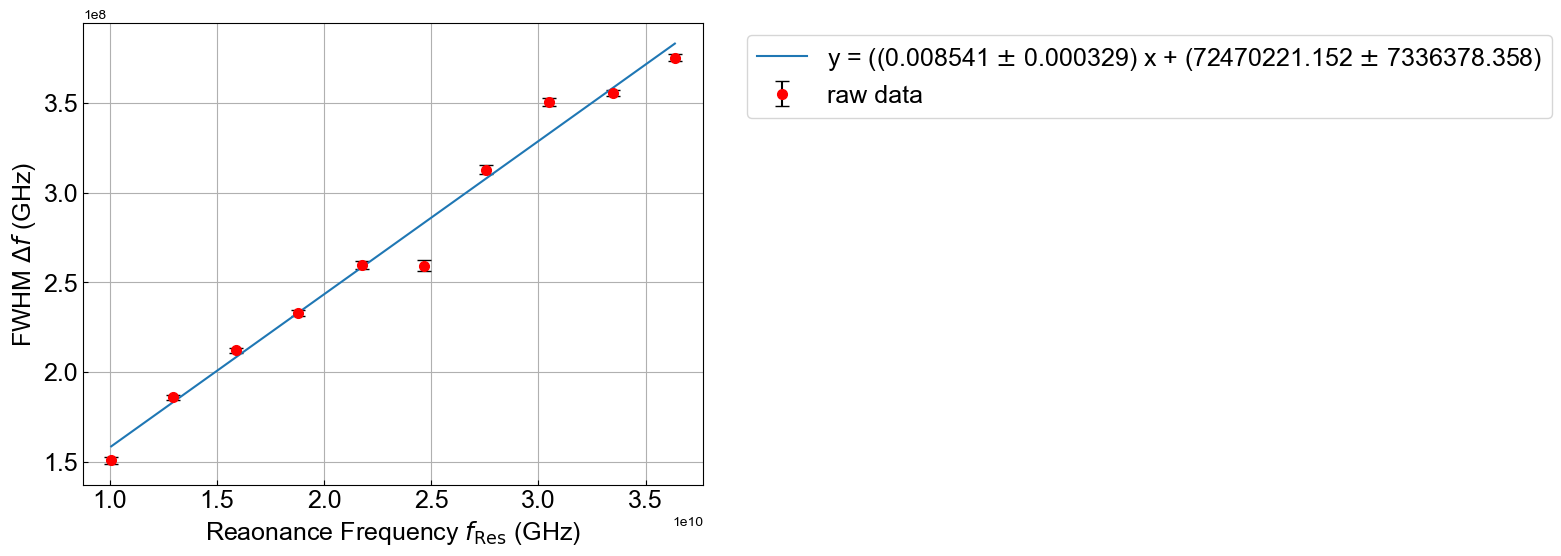

In [66]:
# ダンピング定数

#印加磁場vs.共鳴周波数
plt.rcParams['font.family'] = 'arial'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
fig = plt.figure(figsize=(12, 10))
gs = gridspec.GridSpec(2, 2, height_ratios=[2, 2])
##########データの代入##################################################################################################
Filename='data'
filename='240401nicofe20-1-analysis'
date='240513'

path='/Users/ueno2/iCloudDrive/研究/FeCoNi3元合金/データ/PPMS-OPFMR'
save_path='/Users/ueno2/iCloudDrive/研究/FeCoNi3元合金/データ/PPMS-OPFMR/fitted_data/liner'
f=open(f'{path}/{Filename}/{filename}.txt','rt')
x_list=[]  #fres
y_list=[]  #deltaf
yerr_list=[] #フィッティング誤差

for i in range(1):
    next(f)
n=0
for line in f :
    n=n+1
    data = line[:-1].split('\t')
    x_list.append(float(data[1])*10**9)
    y_list.append(float(data[4])*10**9)
    yerr_list.append(float(data[6])*10**9)

x=np.array(x_list)
y=np.array(y_list)
yerr=np.array(yerr_list)

##########グラフのプロット##########################################################################################
fig=plt.figure(figsize=(8, 6))

###グラフ軸設定#################
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid(True)
plt.xlabel('Reaonance Frequency $f_\mathrm{Res}$ (GHz)', fontsize=18)
plt.ylabel('FWHM $\Delta f$ (GHz)', fontsize=18)

plt.errorbar(x_list,y_list, yerr = yerr_list, capsize=5, fmt='o', markersize=7, ecolor='black', markeredgecolor = "red", color='red',label="raw data")

p, cov =np.polyfit(x,y,1, w=1.0/yerr,cov=True) #1次関数フィティング
a = p[0]
b = p[1]
sigma_a = np.sqrt(cov[0,0])
sigma_b = np.sqrt(cov[1,1])
xx=np.linspace(x[0],x[-1],30)
yy=np.polyval(p,xx) #結果からyを計算
plt.plot(xx,yy,label="y = (({:.6f} $\pm$ {:.6f}) x + ({:.3f} $\pm$ {:.3f})".format(a,sigma_a,b,sigma_b))

print(f"試料名:{filename}")
print(f"傾き:{a}\t± {sigma_a}")
print(f"切片:{b}\t± {sigma_b}")
print(f"ダンピング定数α(×10^(-3))={a/2*10**3}\t± {sigma_a/2*10**3}")
print(f"不均一線幅ΔH(0)={2*np.pi/gamma*b}\t± {2*np.pi/gamma*sigma_b}")


plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',fontsize=18)

#print(x_list,y_list)

plt.show()
fig.savefig(f'{save_path}/damp_graph_{filename}.pdf',bbox_inches="tight",format="pdf", pad_inches=0.1)
fig.savefig(f'{save_path}/damp_graph_{filename}.png',bbox_inches="tight",format="png", pad_inches=0.1)

## 240314nicofe40-1

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


試料名:240314nicofe40-1-analysis
傾き:2858635.916638438	± 7580.277852424455
切片:-44247905645.50473	± 187158482.4262517
gamma=17961339.18999848	± 23814.14521334608
g-factor=2.0250545618413622	±	 0.0053698605533258345
Ms,eff=1231.7540796218454	±	 5.210036970140519


<Figure size 1200x1000 with 0 Axes>

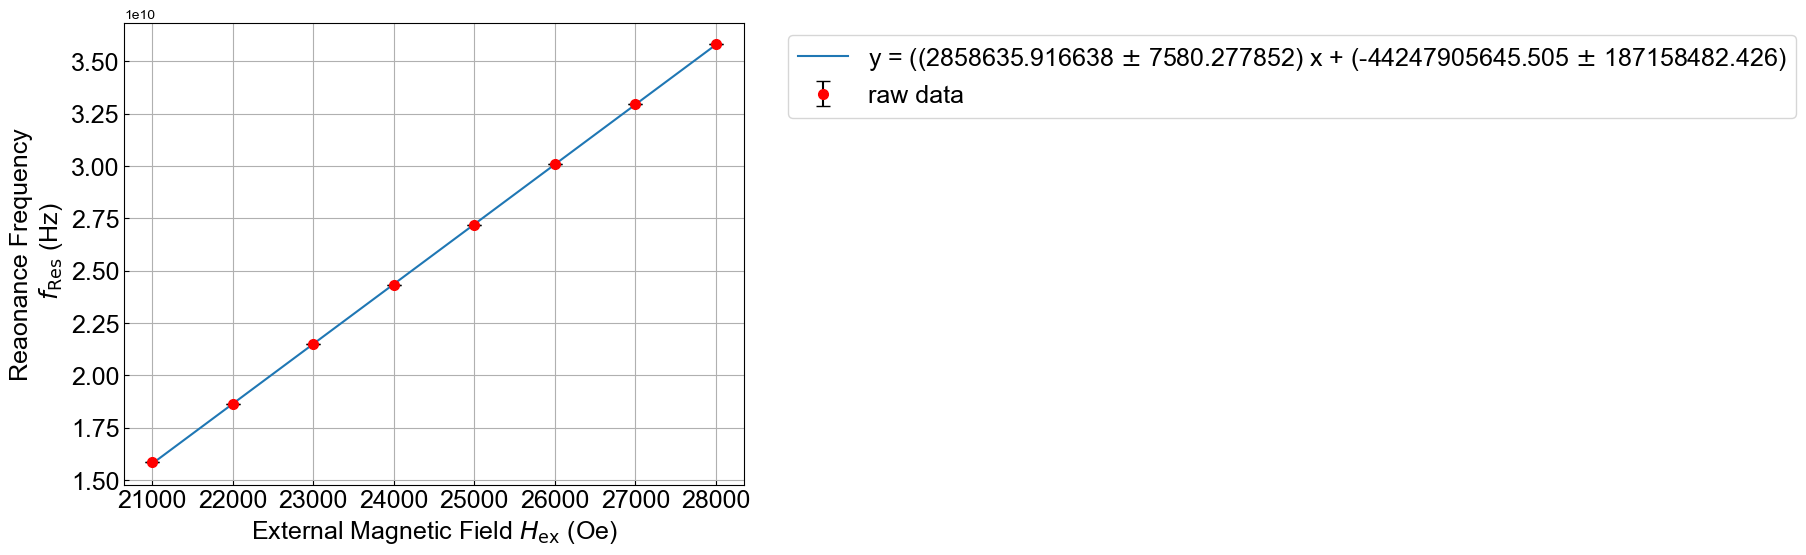

In [158]:
#印加磁場vs.共鳴周波数
plt.rcParams['font.family'] = 'arial'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
fig = plt.figure(figsize=(12, 10))
gs = gridspec.GridSpec(2, 2, height_ratios=[2, 2])
##########データの代入##################################################################################################
Filename='data'
filename='240314nicofe40-1-analysis'
date='240513'

path='/Users/ueno2/iCloudDrive/研究/FeCoNi3元合金/データ/PPMS-OPFMR'
save_path='/Users/ueno2/iCloudDrive/研究/FeCoNi3元合金/データ/PPMS-OPFMR/fitted_data/liner'
f=open(f'{path}/{Filename}/{filename}.txt','rt')
x_list=[]  #Hex
y_list=[]  #Freq
yerr_list=[] #フィッティング誤差

for i in range(3):
    next(f)
n=0
for line in f :
    n=n+1
    data = line[:-1].split('\t')
    x_list.append(float(data[0]))
    y_list.append(float(data[1])*10**9)
    yerr_list.append(float(data[3])*10**9)

x=np.array(x_list)
y=np.array(y_list)
yerr=np.array(yerr_list)

##########グラフのプロット##########################################################################################
fig=plt.figure(figsize=(8, 6))

###グラフ軸設定#################
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid(True)
plt.xlabel('External Magnetic Field $H_\mathrm{ex}$ (Oe)', fontsize=18)
plt.ylabel('Reaonance Frequency\n $f_\mathrm{Res} $ (Hz)', fontsize=18)

plt.errorbar(x_list,y_list, yerr = yerr_list, capsize=5, fmt='o', markersize=7, ecolor='black', markeredgecolor = "red", color='red',label="raw data")

p, cov =np.polyfit(x,y,1, w=1.0/yerr,cov=True) #1次関数フィティング
a = p[0]
b = p[1]
sigma_a = np.sqrt(cov[0,0])
sigma_b = np.sqrt(cov[1,1])
xx=np.linspace(x[0],x[-1],30001)
yy=np.polyval(p,xx) #結果からyを計算
plt.plot(xx,yy,label="y = (({:.6f} $\pm$ {:.6f}) x + ({:.3f} $\pm$ {:.3f})".format(a,sigma_a,b,sigma_b))

print(f"試料名:{filename}")
print(f"傾き:{a}\t± {sigma_a}")
print(f"切片:{b}\t± {sigma_b}")
print(f"gamma={2*np.pi*a}\t± {np.pi*sigma_a}")
print(f"g-factor={2*np.pi*a*hbar/muB}\t±\t {2*np.pi*sigma_a*hbar/muB}")
print(f"Ms,eff={-1/(2*2*np.pi*a)*b}\t±\t {1/(2*2*np.pi*a)*sigma_b}")
gamma=2*np.pi*a

plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',fontsize=18)

#print(x_list,y_list)

plt.show()
fig.savefig(f'{save_path}/g-factor_graph_{filename}.pdf',bbox_inches="tight",format="pdf", pad_inches=0.1)
fig.savefig(f'{save_path}/g-factor_graph_{filename}.png',bbox_inches="tight",format="png", pad_inches=0.1)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


試料名:240314nicofe40-1-analysis
傾き:0.008601909668146834	± 0.00044032324052145595
切片:80727700.82300366	± 11427009.046279665
ダンピング定数α(×10^(-3))=4.300954834073417	± 0.22016162026072797
不均一線幅ΔH(0)=28.239937920437928	± 3.9973642602647534


<Figure size 1200x1000 with 0 Axes>

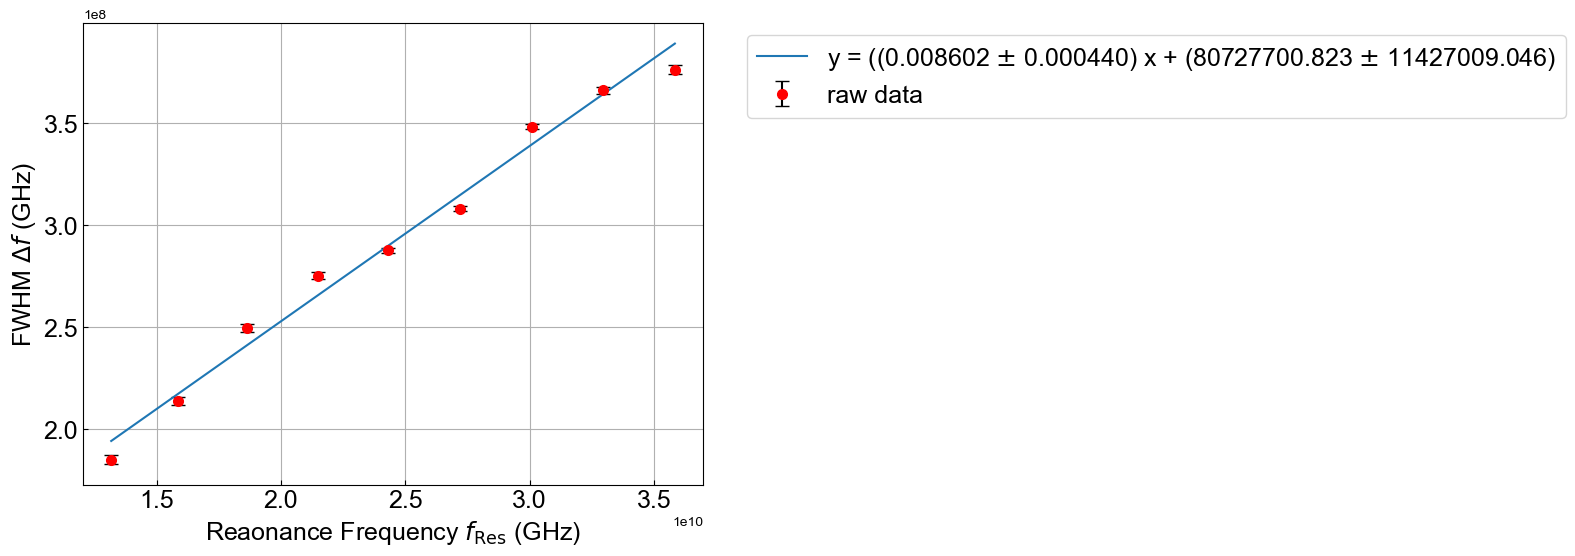

In [87]:
# ダンピング定数

#印加磁場vs.共鳴周波数
plt.rcParams['font.family'] = 'arial'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
fig = plt.figure(figsize=(12, 10))
gs = gridspec.GridSpec(2, 2, height_ratios=[2, 2])
##########データの代入##################################################################################################
Filename='data'
filename='240314nicofe40-1-analysis'
date='240513'

path='/Users/ueno2/iCloudDrive/研究/FeCoNi3元合金/データ/PPMS-OPFMR'
save_path='/Users/ueno2/iCloudDrive/研究/FeCoNi3元合金/データ/PPMS-OPFMR/fitted_data/liner'
f=open(f'{path}/{Filename}/{filename}.txt','rt')
x_list=[]  #fres
y_list=[]  #deltaf
yerr_list=[] #フィッティング誤差

for i in range(2):
    next(f)
n=0
for line in f :
    n=n+1
    data = line[:-1].split('\t')
    x_list.append(float(data[1])*10**9)
    y_list.append(float(data[4])*10**9)
    yerr_list.append(float(data[6])*10**9)

x=np.array(x_list)
y=np.array(y_list)
yerr=np.array(yerr_list)

##########グラフのプロット##########################################################################################
fig=plt.figure(figsize=(8, 6))

###グラフ軸設定#################
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid(True)
plt.xlabel('Reaonance Frequency $f_\mathrm{Res}$ (GHz)', fontsize=18)
plt.ylabel('FWHM $\Delta f$ (GHz)', fontsize=18)

plt.errorbar(x_list,y_list, yerr = yerr_list, capsize=5, fmt='o', markersize=7, ecolor='black', markeredgecolor = "red", color='red',label="raw data")

p, cov =np.polyfit(x,y,1, w=1.0/yerr,cov=True) #1次関数フィティング
a = p[0]
b = p[1]
sigma_a = np.sqrt(cov[0,0])
sigma_b = np.sqrt(cov[1,1])
xx=np.linspace(x[0],x[-1],30)
yy=np.polyval(p,xx) #結果からyを計算
plt.plot(xx,yy,label="y = (({:.6f} $\pm$ {:.6f}) x + ({:.3f} $\pm$ {:.3f})".format(a,sigma_a,b,sigma_b))

print(f"試料名:{filename}")
print(f"傾き:{a}\t± {sigma_a}")
print(f"切片:{b}\t± {sigma_b}")
print(f"ダンピング定数α(×10^(-3))={a/2*10**3}\t± {sigma_a/2*10**3}")
print(f"不均一線幅ΔH(0)={2*np.pi/gamma*b}\t± {2*np.pi/gamma*sigma_b}")


plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',fontsize=18)

#print(x_list,y_list)

plt.show()
fig.savefig(f'{save_path}/damp_graph_{filename}.pdf',bbox_inches="tight",format="pdf", pad_inches=0.1)
fig.savefig(f'{save_path}/damp_graph_{filename}.png',bbox_inches="tight",format="png", pad_inches=0.1)

## 240320nocofe60-1

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


試料名:240320nocofe60-1-analysis
傾き:2874819.6532395347	± 3678.971372064223
切片:-58800178284.35226	± 110015110.82605721
gamma=18063024.60602576	± 11557.829435244124
g-factor=2.0365191031776475	±	 0.002606179302694575
Ms,eff=1627.639323060456	±	 3.045312543873648


<Figure size 1200x1000 with 0 Axes>

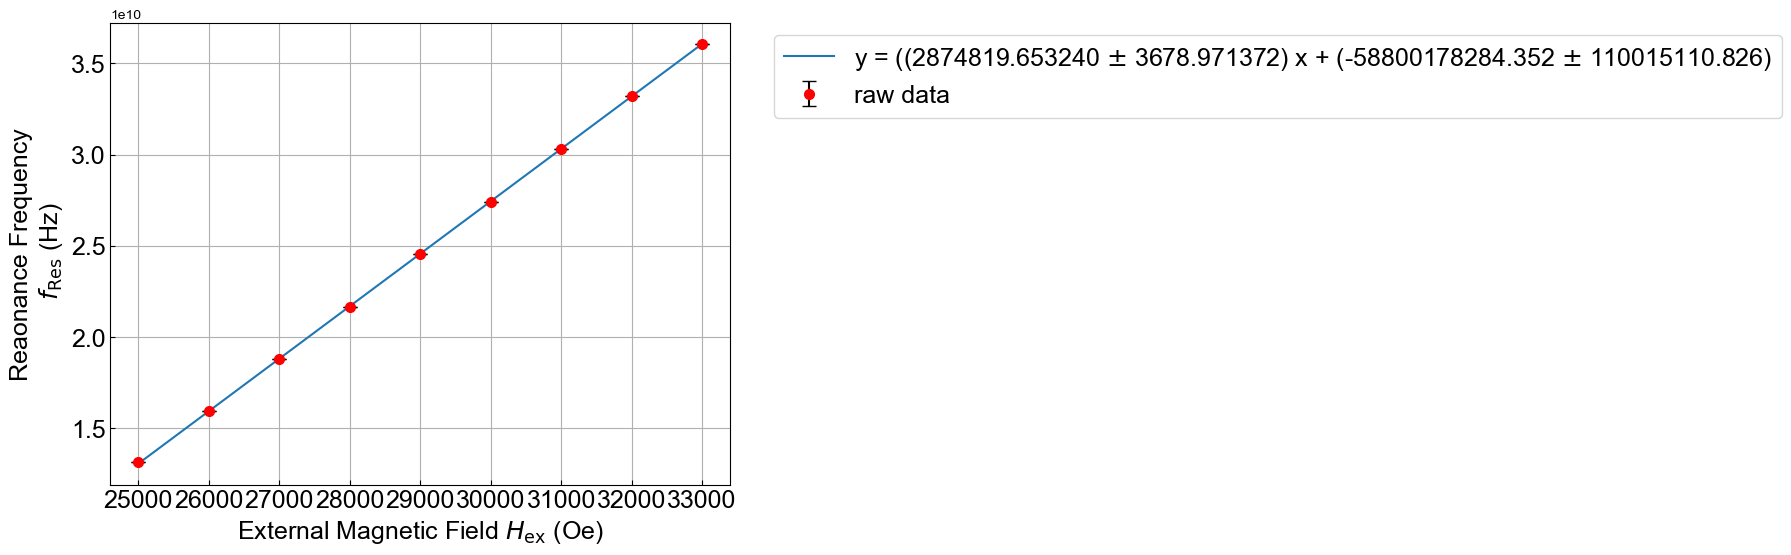

In [160]:
#印加磁場vs.共鳴周波数
plt.rcParams['font.family'] = 'arial'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
fig = plt.figure(figsize=(12, 10))
gs = gridspec.GridSpec(2, 2, height_ratios=[2, 2])
##########データの代入##################################################################################################
Filename='data'
filename='240320nocofe60-1-analysis'
date='240513'

path='/Users/ueno2/iCloudDrive/研究/FeCoNi3元合金/データ/PPMS-OPFMR'
save_path='/Users/ueno2/iCloudDrive/研究/FeCoNi3元合金/データ/PPMS-OPFMR/fitted_data/liner'
f=open(f'{path}/{Filename}/{filename}.txt','rt')
x_list=[]  #Hex
y_list=[]  #Freq
yerr_list=[] #フィッティング誤差

for i in range(1):
    next(f)
n=0
for line in f :
    n=n+1
    data = line[:-1].split('\t')
    x_list.append(float(data[0]))
    y_list.append(float(data[1])*10**9)
    yerr_list.append(float(data[3])*10**9)

x=np.array(x_list)
y=np.array(y_list)
yerr=np.array(yerr_list)

##########グラフのプロット##########################################################################################
fig=plt.figure(figsize=(8, 6))

###グラフ軸設定#################
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid(True)
plt.xlabel('External Magnetic Field $H_\mathrm{ex}$ (Oe)', fontsize=18)
plt.ylabel('Reaonance Frequency\n $f_\mathrm{Res} $ (Hz)', fontsize=18)

plt.errorbar(x_list,y_list, yerr = yerr_list, capsize=5, fmt='o', markersize=7, ecolor='black', markeredgecolor = "red", color='red',label="raw data")

p, cov =np.polyfit(x,y,1, w=1.0/yerr,cov=True) #1次関数フィティング
a = p[0]
b = p[1]
sigma_a = np.sqrt(cov[0,0])
sigma_b = np.sqrt(cov[1,1])
xx=np.linspace(x[0],x[-1],30001)
yy=np.polyval(p,xx) #結果からyを計算
plt.plot(xx,yy,label="y = (({:.6f} $\pm$ {:.6f}) x + ({:.3f} $\pm$ {:.3f})".format(a,sigma_a,b,sigma_b))

print(f"試料名:{filename}")
print(f"傾き:{a}\t± {sigma_a}")
print(f"切片:{b}\t± {sigma_b}")
print(f"gamma={2*np.pi*a}\t± {np.pi*sigma_a}")
print(f"g-factor={2*np.pi*a*hbar/muB}\t±\t {2*np.pi*sigma_a*hbar/muB}")
print(f"Ms,eff={-1/(2*2*np.pi*a)*b}\t±\t {1/(2*2*np.pi*a)*sigma_b}")
gamma=2*np.pi*a

plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',fontsize=18)

#print(x_list,y_list)

plt.show()
fig.savefig(f'{save_path}/g-factor_graph_{filename}.pdf',bbox_inches="tight",format="pdf", pad_inches=0.1)
fig.savefig(f'{save_path}/g-factor_graph_{filename}.png',bbox_inches="tight",format="png", pad_inches=0.1)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


試料名:240320nocofe60-1-analysis
傾き:0.00446172269188316	± 0.0002888018851474535
切片:79759472.18861406	± 7971562.748756717
ダンピング定数α(×10^(-3))=2.23086134594158	± 0.14440094257372674
不均一線幅ΔH(0)=27.68114031006729	± 2.7665923668228665


<Figure size 1200x1000 with 0 Axes>

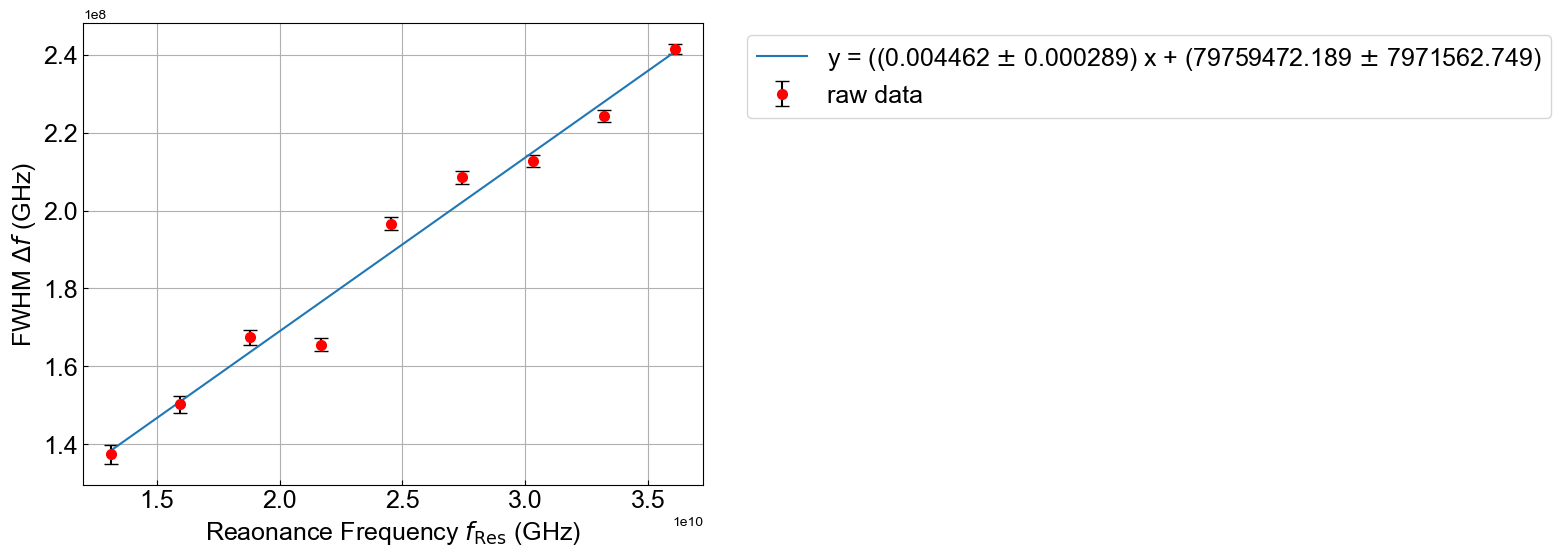

In [96]:
# ダンピング定数

#印加磁場vs.共鳴周波数
plt.rcParams['font.family'] = 'arial'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
fig = plt.figure(figsize=(12, 10))
gs = gridspec.GridSpec(2, 2, height_ratios=[2, 2])
##########データの代入##################################################################################################
Filename='data'
filename='240320nocofe60-1-analysis'
date='240513'

path='/Users/ueno2/iCloudDrive/研究/FeCoNi3元合金/データ/PPMS-OPFMR'
save_path='/Users/ueno2/iCloudDrive/研究/FeCoNi3元合金/データ/PPMS-OPFMR/fitted_data/liner'
f=open(f'{path}/{Filename}/{filename}.txt','rt')
x_list=[]  #fres
y_list=[]  #deltaf
yerr_list=[] #フィッティング誤差

for i in range(1):
    next(f)
n=0
for line in f :
    n=n+1
    data = line[:-1].split('\t')
    x_list.append(float(data[1])*10**9)
    y_list.append(float(data[4])*10**9)
    yerr_list.append(float(data[6])*10**9)

x=np.array(x_list)
y=np.array(y_list)
yerr=np.array(yerr_list)

##########グラフのプロット##########################################################################################
fig=plt.figure(figsize=(8, 6))

###グラフ軸設定#################
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid(True)
plt.xlabel('Reaonance Frequency $f_\mathrm{Res}$ (GHz)', fontsize=18)
plt.ylabel('FWHM $\Delta f$ (GHz)', fontsize=18)

plt.errorbar(x_list,y_list, yerr = yerr_list, capsize=5, fmt='o', markersize=7, ecolor='black', markeredgecolor = "red", color='red',label="raw data")

p, cov =np.polyfit(x,y,1, w=1.0/yerr,cov=True) #1次関数フィティング
a = p[0]
b = p[1]
sigma_a = np.sqrt(cov[0,0])
sigma_b = np.sqrt(cov[1,1])
xx=np.linspace(x[0],x[-1],30)
yy=np.polyval(p,xx) #結果からyを計算
plt.plot(xx,yy,label="y = (({:.6f} $\pm$ {:.6f}) x + ({:.3f} $\pm$ {:.3f})".format(a,sigma_a,b,sigma_b))

print(f"試料名:{filename}")
print(f"傾き:{a}\t± {sigma_a}")
print(f"切片:{b}\t± {sigma_b}")
print(f"ダンピング定数α(×10^(-3))={a/2*10**3}\t± {sigma_a/2*10**3}")
print(f"不均一線幅ΔH(0)={2*np.pi/gamma*b}\t± {2*np.pi/gamma*sigma_b}")


plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',fontsize=18)

#print(x_list,y_list)

plt.show()
fig.savefig(f'{save_path}/damp_graph_{filename}.pdf',bbox_inches="tight",format="pdf", pad_inches=0.1)
fig.savefig(f'{save_path}/damp_graph_{filename}.png',bbox_inches="tight",format="png", pad_inches=0.1)

## 240328nicofe80-2

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


試料名:240328nicofe80-2-analysis
傾き:2744025.253572849	± 12074.124085072568
切片:-56115058411.16394	± 387579254.65041584
gamma=17241219.155778665	± 37931.979524195565
g-factor=1.9438644932755271	±	 0.008553296317450356
Ms,eff=1627.3518103374986	±	 11.23990279192387


<Figure size 1200x1000 with 0 Axes>

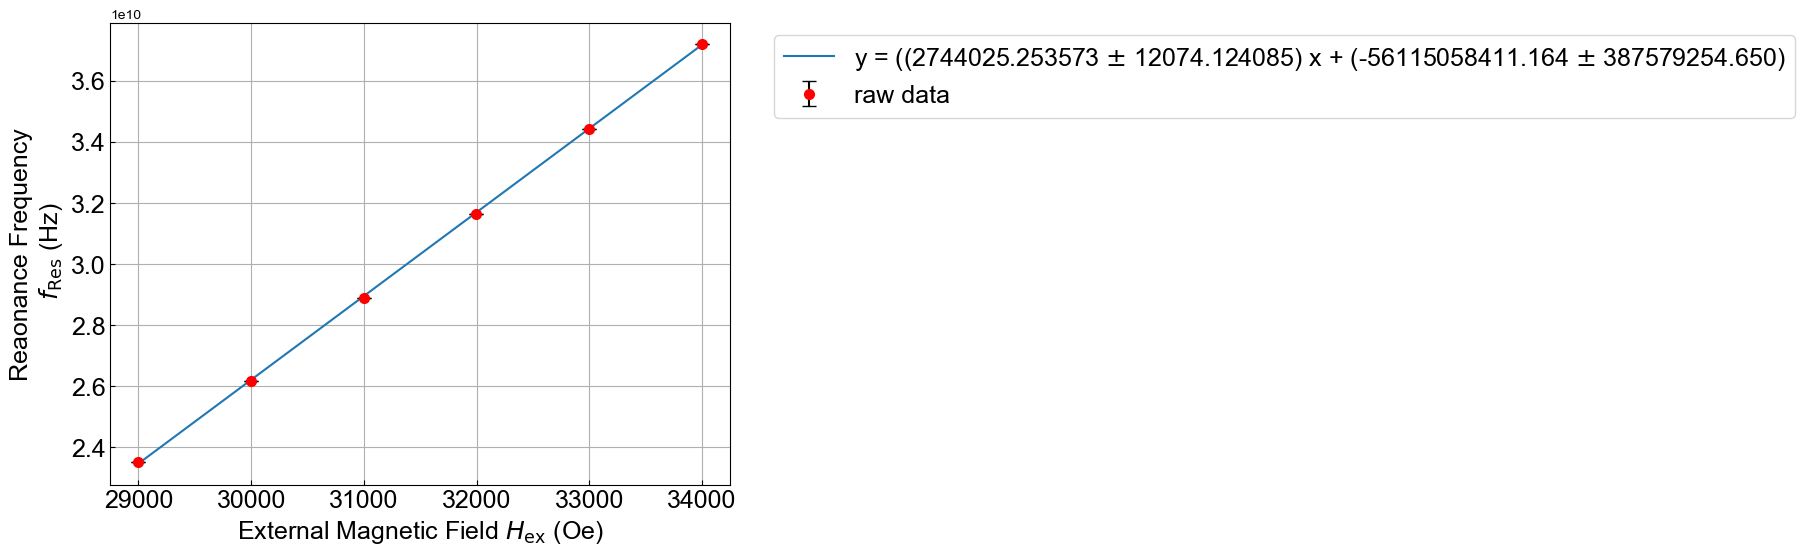

In [162]:
#印加磁場vs.共鳴周波数
plt.rcParams['font.family'] = 'arial'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
fig = plt.figure(figsize=(12, 10))
gs = gridspec.GridSpec(2, 2, height_ratios=[2, 2])
##########データの代入##################################################################################################
Filename='data'
filename='240328nicofe80-2-analysis'
date='240513'

path='/Users/ueno2/iCloudDrive/研究/FeCoNi3元合金/データ/PPMS-OPFMR'
save_path='/Users/ueno2/iCloudDrive/研究/FeCoNi3元合金/データ/PPMS-OPFMR/fitted_data/liner'
f=open(f'{path}/{Filename}/{filename}.txt','rt')
x_list=[]  #Hex
y_list=[]  #Freq
yerr_list=[] #フィッティング誤差

for i in range(4):
    next(f)
n=0
for line in f :
    n=n+1
    data = line[:-1].split('\t')
    x_list.append(float(data[0]))
    y_list.append(float(data[1])*10**9)
    yerr_list.append(float(data[3])*10**9)

x=np.array(x_list)
y=np.array(y_list)
yerr=np.array(yerr_list)

##########グラフのプロット##########################################################################################
fig=plt.figure(figsize=(8, 6))

###グラフ軸設定#################
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid(True)
plt.xlabel('External Magnetic Field $H_\mathrm{ex}$ (Oe)', fontsize=18)
plt.ylabel('Reaonance Frequency\n $f_\mathrm{Res} $ (Hz)', fontsize=18)

plt.errorbar(x_list,y_list, yerr = yerr_list, capsize=5, fmt='o', markersize=7, ecolor='black', markeredgecolor = "red", color='red',label="raw data")

p, cov =np.polyfit(x,y,1, w=1.0/yerr,cov=True) #1次関数フィティング
a = p[0]
b = p[1]
sigma_a = np.sqrt(cov[0,0])
sigma_b = np.sqrt(cov[1,1])
xx=np.linspace(x[0],x[-1],30001)
yy=np.polyval(p,xx) #結果からyを計算
plt.plot(xx,yy,label="y = (({:.6f} $\pm$ {:.6f}) x + ({:.3f} $\pm$ {:.3f})".format(a,sigma_a,b,sigma_b))

print(f"試料名:{filename}")
print(f"傾き:{a}\t± {sigma_a}")
print(f"切片:{b}\t± {sigma_b}")
print(f"gamma={2*np.pi*a}\t± {np.pi*sigma_a}")
print(f"g-factor={2*np.pi*a*hbar/muB}\t±\t {2*np.pi*sigma_a*hbar/muB}")
print(f"Ms,eff={-1/(2*2*np.pi*a)*b}\t±\t {1/(2*2*np.pi*a)*sigma_b}")
gamma=2*np.pi*a

plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',fontsize=18)

#print(x_list,y_list)

plt.show()
fig.savefig(f'{save_path}/g-factor_graph_{filename}.pdf',bbox_inches="tight",format="pdf", pad_inches=0.1)
fig.savefig(f'{save_path}/g-factor_graph_{filename}.png',bbox_inches="tight",format="png", pad_inches=0.1)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


試料名:240328nicofe80-2-analysis
傾き:0.005864037484927318	± 0.0001585259928559783
切片:19000469.05887037	± 4053995.958730779
ダンピング定数α(×10^(-3))=2.932018742463659	± 0.07926299642798915
不均一線幅ΔH(0)=6.924305464802436	± 1.4773901783346515


<Figure size 1200x1000 with 0 Axes>

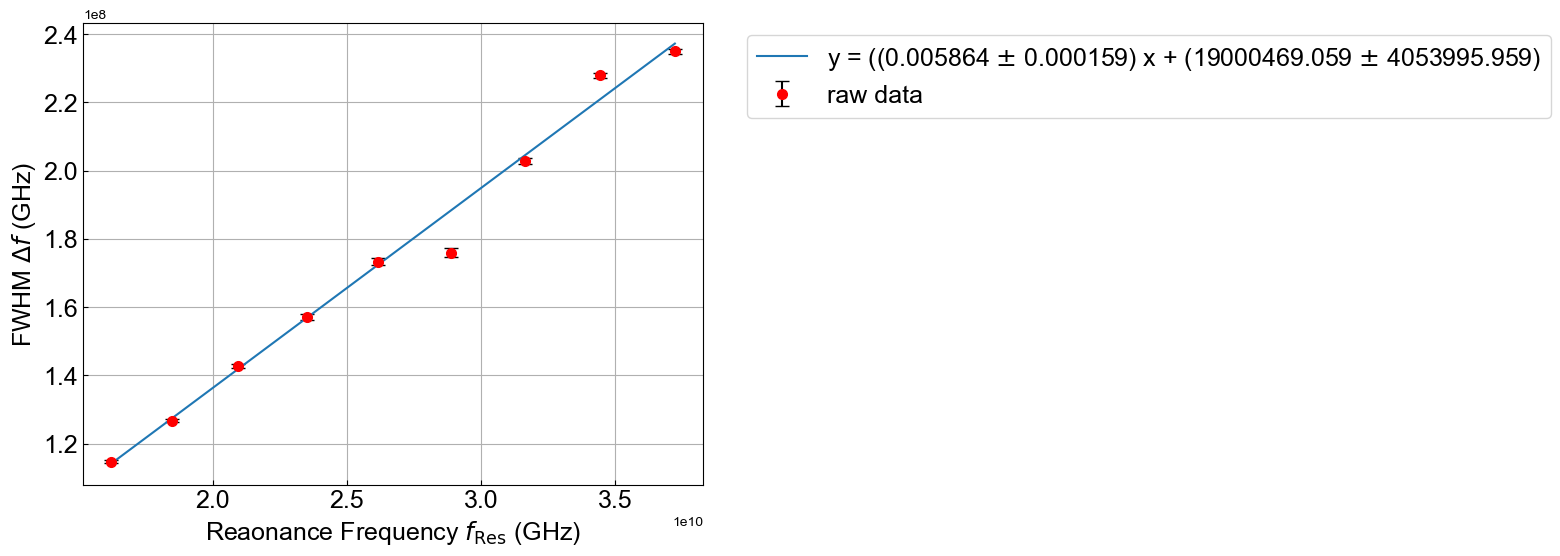

In [17]:
# ダンピング定数

#印加磁場vs.共鳴周波数
plt.rcParams['font.family'] = 'arial'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
fig = plt.figure(figsize=(12, 10))
gs = gridspec.GridSpec(2, 2, height_ratios=[2, 2])
##########データの代入##################################################################################################
Filename='data'
filename='240328nicofe80-2-analysis'
date='240513'

path='/Users/ueno2/iCloudDrive/研究/FeCoNi3元合金/データ/PPMS-OPFMR'
save_path='/Users/ueno2/iCloudDrive/研究/FeCoNi3元合金/データ/PPMS-OPFMR/fitted_data/liner'
f=open(f'{path}/{Filename}/{filename}.txt','rt')
x_list=[]  #fres
y_list=[]  #deltaf
yerr_list=[] #フィッティング誤差

for i in range(1):
    next(f)
n=0
for line in f :
    n=n+1
    data = line[:-1].split('\t')
    x_list.append(float(data[1])*10**9)
    y_list.append(float(data[4])*10**9)
    yerr_list.append(float(data[6])*10**9)

x=np.array(x_list)
y=np.array(y_list)
yerr=np.array(yerr_list)

##########グラフのプロット##########################################################################################
fig=plt.figure(figsize=(8, 6))

###グラフ軸設定#################
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid(True)
plt.xlabel('Reaonance Frequency $f_\mathrm{Res}$ (GHz)', fontsize=18)
plt.ylabel('FWHM $\Delta f$ (GHz)', fontsize=18)

plt.errorbar(x_list,y_list, yerr = yerr_list, capsize=5, fmt='o', markersize=7, ecolor='black', markeredgecolor = "red", color='red',label="raw data")

p, cov =np.polyfit(x,y,1, w=1.0/yerr,cov=True) #1次関数フィティング
a = p[0]
b = p[1]
sigma_a = np.sqrt(cov[0,0])
sigma_b = np.sqrt(cov[1,1])
xx=np.linspace(x[0],x[-1],30)
yy=np.polyval(p,xx) #結果からyを計算
plt.plot(xx,yy,label="y = (({:.6f} $\pm$ {:.6f}) x + ({:.3f} $\pm$ {:.3f})".format(a,sigma_a,b,sigma_b))

print(f"試料名:{filename}")
print(f"傾き:{a}\t± {sigma_a}")
print(f"切片:{b}\t± {sigma_b}")
print(f"ダンピング定数α(×10^(-3))={a/2*10**3}\t± {sigma_a/2*10**3}")
print(f"不均一線幅ΔH(0)={2*np.pi/gamma*b}\t± {2*np.pi/gamma*sigma_b}")


plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',fontsize=18)

#print(x_list,y_list)

plt.show()
fig.savefig(f'{save_path}/damp_graph_{filename}.pdf',bbox_inches="tight",format="pdf", pad_inches=0.1)
fig.savefig(f'{save_path}/damp_graph_{filename}.png',bbox_inches="tight",format="png", pad_inches=0.1)

## 240311nicofe10-3

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


試料名:240311nicofe10-3
傾き:2964905.672334429	± 3420.786667212612
切片:-34075583221.225273	± 60055572.78272912
gamma=18629051.757585097	± 10746.718263213053
g-factor=2.1003359407344804	±	 0.0024232815397040907
Ms,eff=914.5817958058678	±	 1.6118794870564626


<Figure size 1200x1000 with 0 Axes>

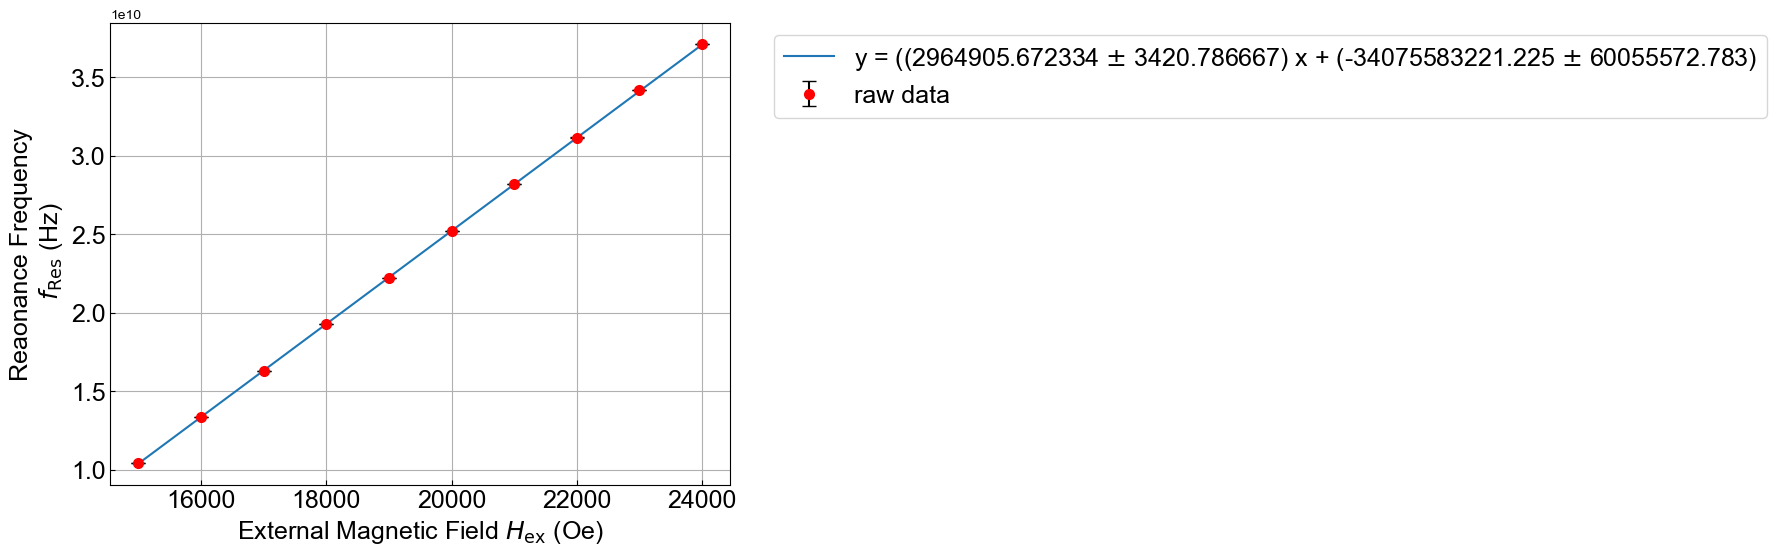

In [146]:
#印加磁場vs.共鳴周波数
plt.rcParams['font.family'] = 'arial'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
fig = plt.figure(figsize=(12, 10))
gs = gridspec.GridSpec(2, 2, height_ratios=[2, 2])
##########データの代入##################################################################################################
Filename='data'
filename='240311nicofe10-3'
date='240520'

path='/Users/ueno2/iCloudDrive/研究/FeCoNi3元合金/データ/PPMS-OPFMR'
save_path='/Users/ueno2/iCloudDrive/研究/FeCoNi3元合金/データ/PPMS-OPFMR/fitted_data/liner'
f=open(f'{path}/{Filename}/{filename}.txt','rt')
x_list=[]  #Hex
y_list=[]  #Freq
yerr_list=[] #フィッティング誤差

for i in range(1):
    next(f)
n=0
for line in f :
    n=n+1
    data = line[:-1].split('\t')
    x_list.append(float(data[0]))
    y_list.append(float(data[1])*10**9)
    yerr_list.append(float(data[3])*10**9)

x=np.array(x_list)
y=np.array(y_list)
yerr=np.array(yerr_list)

##########グラフのプロット##########################################################################################
fig=plt.figure(figsize=(8, 6))

###グラフ軸設定#################
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid(True)
plt.xlabel('External Magnetic Field $H_\mathrm{ex}$ (Oe)', fontsize=18)
plt.ylabel('Reaonance Frequency\n $f_\mathrm{Res} $ (Hz)', fontsize=18)

plt.errorbar(x_list,y_list, yerr = yerr_list, capsize=5, fmt='o', markersize=7, ecolor='black', markeredgecolor = "red", color='red',label="raw data")

p, cov =np.polyfit(x,y,1, w=1.0/yerr,cov=True) #1次関数フィティング
a = p[0]
b = p[1]
sigma_a = np.sqrt(cov[0,0])
sigma_b = np.sqrt(cov[1,1])
xx=np.linspace(x[0],x[-1],30001)
yy=np.polyval(p,xx) #結果からyを計算
plt.plot(xx,yy,label="y = (({:.6f} $\pm$ {:.6f}) x + ({:.3f} $\pm$ {:.3f})".format(a,sigma_a,b,sigma_b))

print(f"試料名:{filename}")
print(f"傾き:{a}\t± {sigma_a}")
print(f"切片:{b}\t± {sigma_b}")
print(f"gamma={2*np.pi*a}\t± {np.pi*sigma_a}")
print(f"g-factor={2*np.pi*a*hbar/muB}\t±\t {2*np.pi*sigma_a*hbar/muB}")
print(f"Ms,eff={-1/(2*2*np.pi*a)*b}\t±\t {1/(2*2*np.pi*a)*sigma_b}")
gamma=2*np.pi*a

plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',fontsize=18)

#print(x_list,y_list)

plt.show()
fig.savefig(f'{save_path}/g-factor_graph_{filename}.pdf',bbox_inches="tight",format="pdf", pad_inches=0.1)
fig.savefig(f'{save_path}/g-factor_graph_{filename}.png',bbox_inches="tight",format="png", pad_inches=0.1)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


試料名:240311nicofe10-3
傾き:0.01538993171114455	± 0.0005493160129093625
切片:17681469.202160574	± 10107394.935331428
ダンピング定数α(×10^(-3))=7.694965855572275	±	 0.27465800645468125
不均一線幅ΔH(0)=5.963585744783241	±	 3.4090106237252855


<Figure size 1200x1000 with 0 Axes>

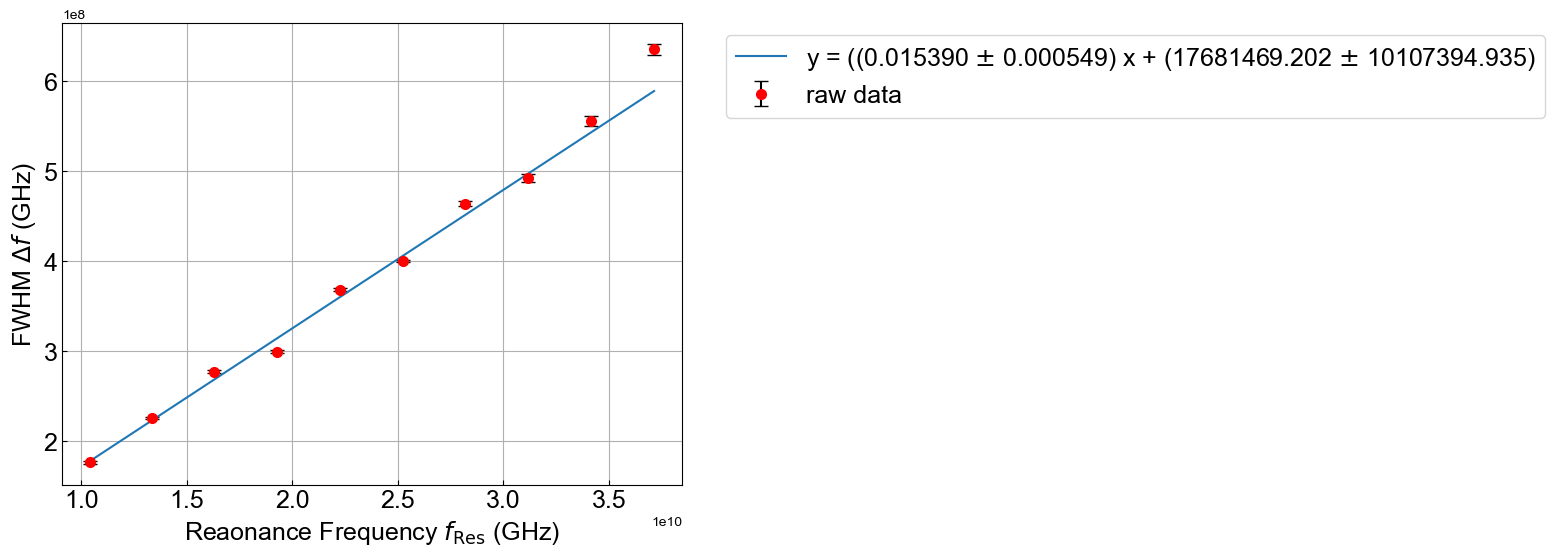

In [148]:
# ダンピング定数

#印加磁場vs.共鳴周波数
plt.rcParams['font.family'] = 'arial'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
fig = plt.figure(figsize=(12, 10))
gs = gridspec.GridSpec(2, 2, height_ratios=[2, 2])
##########データの代入##################################################################################################
Filename='data'
filename='240311nicofe10-3'
date='240520'

path='/Users/ueno2/iCloudDrive/研究/FeCoNi3元合金/データ/PPMS-OPFMR'
save_path='/Users/ueno2/iCloudDrive/研究/FeCoNi3元合金/データ/PPMS-OPFMR/fitted_data/liner'
f=open(f'{path}/{Filename}/{filename}.txt','rt')
x_list=[]  #fres
y_list=[]  #deltaf
yerr_list=[] #フィッティング誤差

for i in range(1):
    next(f)
n=0
for line in f :
    n=n+1
    data = line[:-1].split('\t')
    x_list.append(float(data[1])*10**9)
    y_list.append(float(data[4])*10**9)
    yerr_list.append(float(data[6])*10**9)

x=np.array(x_list)
y=np.array(y_list)
yerr=np.array(yerr_list)

##########グラフのプロット##########################################################################################
fig=plt.figure(figsize=(8, 6))

###グラフ軸設定#################
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid(True)
plt.xlabel('Reaonance Frequency $f_\mathrm{Res}$ (GHz)', fontsize=18)
plt.ylabel('FWHM $\Delta f$ (GHz)', fontsize=18)

plt.errorbar(x_list,y_list, yerr = yerr_list, capsize=5, fmt='o', markersize=7, ecolor='black', markeredgecolor = "red", color='red',label="raw data")

p, cov =np.polyfit(x,y,1, w=1.0/yerr,cov=True) #1次関数フィティング
a = p[0]
b = p[1]
sigma_a = np.sqrt(cov[0,0])
sigma_b = np.sqrt(cov[1,1])
xx=np.linspace(x[0],x[-1],30)
yy=np.polyval(p,xx) #結果からyを計算
plt.plot(xx,yy,label="y = (({:.6f} $\pm$ {:.6f}) x + ({:.3f} $\pm$ {:.3f})".format(a,sigma_a,b,sigma_b))

print(f"試料名:{filename}")
print(f"傾き:{a}\t± {sigma_a}")
print(f"切片:{b}\t± {sigma_b}")
print(f"ダンピング定数α(×10^(-3))={a/2*10**3}\t±\t {sigma_a/2*10**3}")
print(f"不均一線幅ΔH(0)={2*np.pi/gamma*b}\t±\t {2*np.pi/gamma*sigma_b}")


plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',fontsize=18)

#print(x_list,y_list)

plt.show()
fig.savefig(f'{save_path}/damp_graph_{filename}.pdf',bbox_inches="tight",format="pdf", pad_inches=0.1)
fig.savefig(f'{save_path}/damp_graph_{filename}.png',bbox_inches="tight",format="png", pad_inches=0.1)

## 240313nicofe5-1

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


試料名:240313nicofe5-1
傾き:2936523.962132161	± 10844.92870279481
切片:-28784645081.288906	± 178980430.22742566
gamma=18450724.21304958	± 34070.34834140526
g-factor=2.080230368218779	±	 0.00768253565087235
Ms,eff=780.0410636708366	±	 4.850227778615833


<Figure size 1200x1000 with 0 Axes>

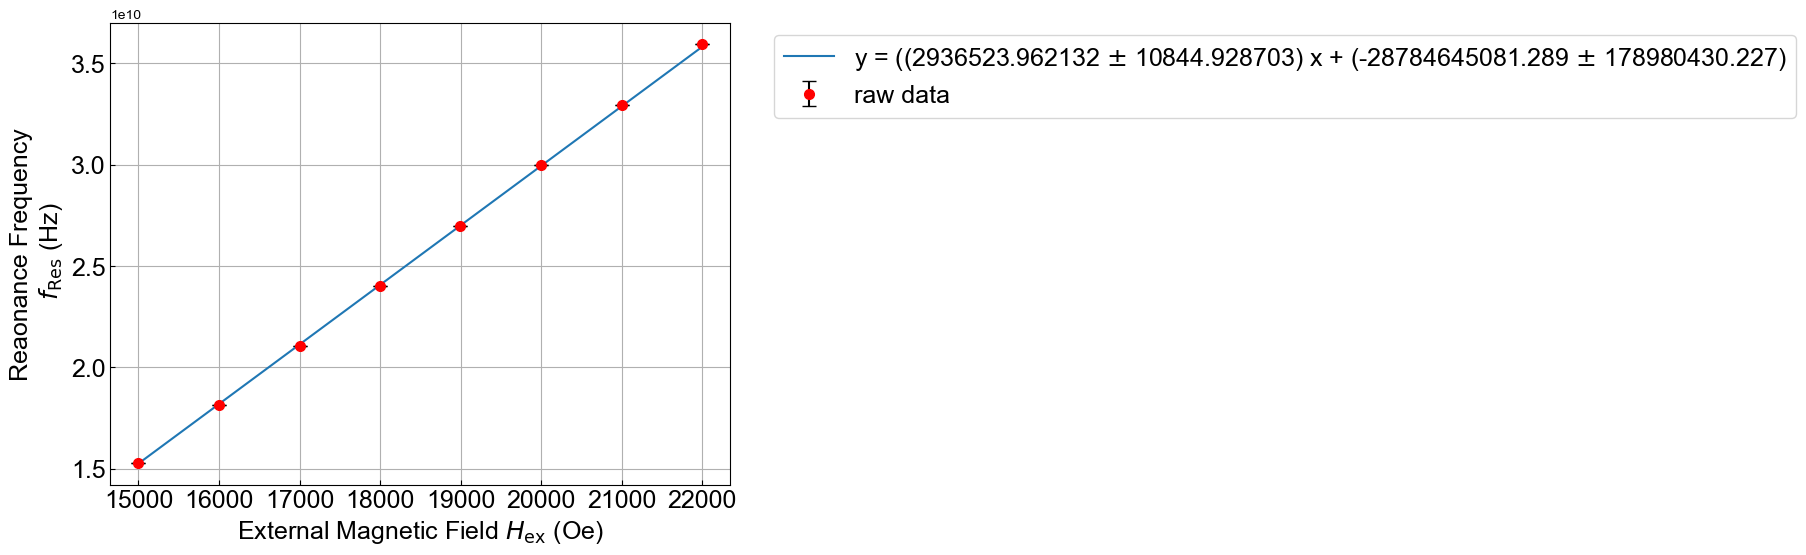

In [140]:
#印加磁場vs.共鳴周波数
plt.rcParams['font.family'] = 'arial'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
fig = plt.figure(figsize=(12, 10))
gs = gridspec.GridSpec(2, 2, height_ratios=[2, 2])
##########データの代入##################################################################################################
Filename='data'
filename='240313nicofe5-1'
date='240520'

path='/Users/ueno2/iCloudDrive/研究/FeCoNi3元合金/データ/PPMS-OPFMR'
save_path='/Users/ueno2/iCloudDrive/研究/FeCoNi3元合金/データ/PPMS-OPFMR/fitted_data/liner'
f=open(f'{path}/{Filename}/{filename}.txt','rt')
x_list=[]  #Hex
y_list=[]  #Freq
yerr_list=[] #フィッティング誤差

for i in range(5):
    next(f)
n=0
for line in f :
    n=n+1
    data = line[:-1].split('\t')
    x_list.append(float(data[0]))
    y_list.append(float(data[1])*10**9)
    yerr_list.append(float(data[3])*10**9)

x=np.array(x_list)
y=np.array(y_list)
yerr=np.array(yerr_list)

##########グラフのプロット##########################################################################################
fig=plt.figure(figsize=(8, 6))

###グラフ軸設定#################
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid(True)
plt.xlabel('External Magnetic Field $H_\mathrm{ex}$ (Oe)', fontsize=18)
plt.ylabel('Reaonance Frequency\n $f_\mathrm{Res} $ (Hz)', fontsize=18)

plt.errorbar(x_list,y_list, yerr = yerr_list, capsize=5, fmt='o', markersize=7, ecolor='black', markeredgecolor = "red", color='red',label="raw data")

p, cov =np.polyfit(x,y,1, w=1.0/yerr,cov=True) #1次関数フィティング
a = p[0]
b = p[1]
sigma_a = np.sqrt(cov[0,0])
sigma_b = np.sqrt(cov[1,1])
xx=np.linspace(x[0],x[-1],30001)
yy=np.polyval(p,xx) #結果からyを計算
plt.plot(xx,yy,label="y = (({:.6f} $\pm$ {:.6f}) x + ({:.3f} $\pm$ {:.3f})".format(a,sigma_a,b,sigma_b))

print(f"試料名:{filename}")
print(f"傾き:{a}\t± {sigma_a}")
print(f"切片:{b}\t± {sigma_b}")
print(f"gamma={2*np.pi*a}\t± {np.pi*sigma_a}")
print(f"g-factor={2*np.pi*a*hbar/muB}\t±\t {2*np.pi*sigma_a*hbar/muB}")
print(f"Ms,eff={-1/(2*2*np.pi*a)*b}\t±\t {1/(2*2*np.pi*a)*sigma_b}")
gamma=2*np.pi*a

plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',fontsize=18)

#print(x_list,y_list)

plt.show()
fig.savefig(f'{save_path}/g-factor_graph_{filename}.pdf',bbox_inches="tight",format="pdf", pad_inches=0.1)
fig.savefig(f'{save_path}/g-factor_graph_{filename}.png',bbox_inches="tight",format="png", pad_inches=0.1)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


試料名:240313nicofe5-1
傾き:0.02302248739903572	± 0.0020625048665915435
切片:47624110.92641155	± 41225512.48056721
ダンピング定数α(×10^(-3))=11.511243699517859	±	 1.0312524332957718
不均一線幅ΔH(0)=16.217851970747233	±	 14.038881688754909


<Figure size 1200x1000 with 0 Axes>

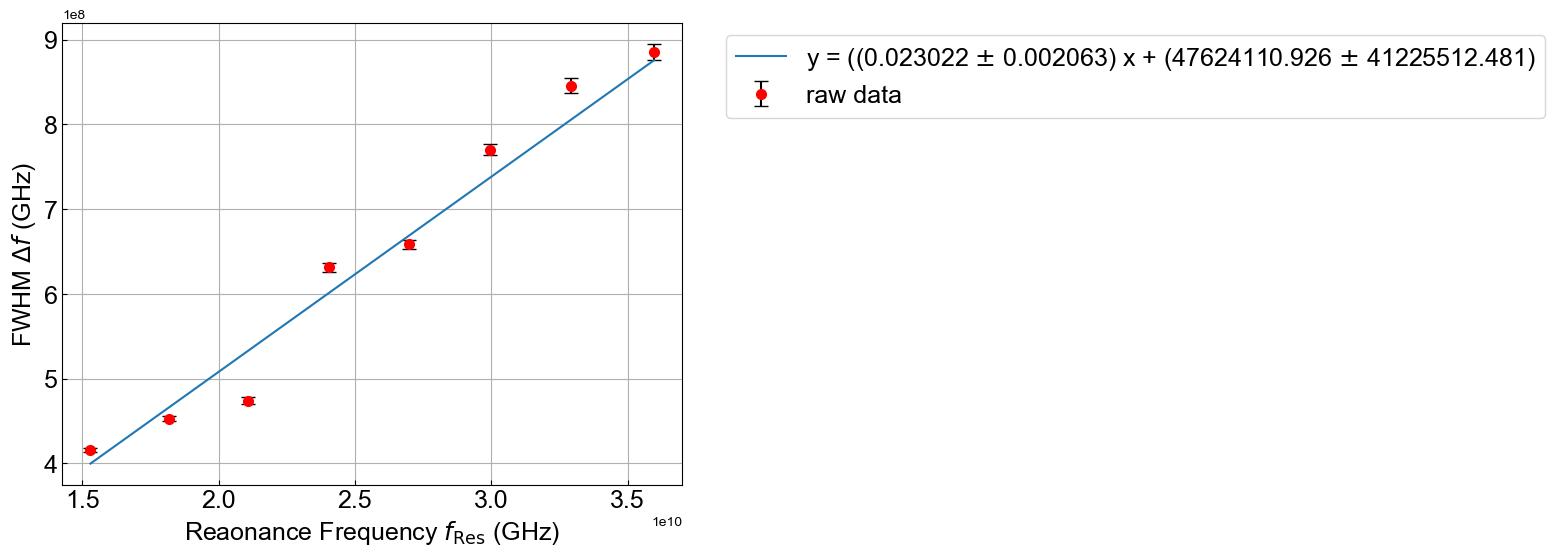

In [142]:
# ダンピング定数

#印加磁場vs.共鳴周波数
plt.rcParams['font.family'] = 'arial'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
fig = plt.figure(figsize=(12, 10))
gs = gridspec.GridSpec(2, 2, height_ratios=[2, 2])
##########データの代入##################################################################################################
Filename='data'
filename='240313nicofe5-1'
date='240520'

path='/Users/ueno2/iCloudDrive/研究/FeCoNi3元合金/データ/PPMS-OPFMR'
save_path='/Users/ueno2/iCloudDrive/研究/FeCoNi3元合金/データ/PPMS-OPFMR/fitted_data/liner'
f=open(f'{path}/{Filename}/{filename}.txt','rt')
x_list=[]  #fres
y_list=[]  #deltaf
yerr_list=[] #フィッティング誤差

for i in range(5):
    next(f)
n=0
for line in f :
    n=n+1
    data = line[:-1].split('\t')
    x_list.append(float(data[1])*10**9)
    y_list.append(float(data[4])*10**9)
    yerr_list.append(float(data[6])*10**9)

x=np.array(x_list)
y=np.array(y_list)
yerr=np.array(yerr_list)

##########グラフのプロット##########################################################################################
fig=plt.figure(figsize=(8, 6))

###グラフ軸設定#################
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid(True)
plt.xlabel('Reaonance Frequency $f_\mathrm{Res}$ (GHz)', fontsize=18)
plt.ylabel('FWHM $\Delta f$ (GHz)', fontsize=18)

plt.errorbar(x_list,y_list, yerr = yerr_list, capsize=5, fmt='o', markersize=7, ecolor='black', markeredgecolor = "red", color='red',label="raw data")

p, cov =np.polyfit(x,y,1, w=1.0/yerr,cov=True) #1次関数フィティング
a = p[0]
b = p[1]
sigma_a = np.sqrt(cov[0,0])
sigma_b = np.sqrt(cov[1,1])
xx=np.linspace(x[0],x[-1],30)
yy=np.polyval(p,xx) #結果からyを計算
plt.plot(xx,yy,label="y = (({:.6f} $\pm$ {:.6f}) x + ({:.3f} $\pm$ {:.3f})".format(a,sigma_a,b,sigma_b))

print(f"試料名:{filename}")
print(f"傾き:{a}\t± {sigma_a}")
print(f"切片:{b}\t± {sigma_b}")
print(f"ダンピング定数α(×10^(-3))={a/2*10**3}\t±\t {sigma_a/2*10**3}")
print(f"不均一線幅ΔH(0)={2*np.pi/gamma*b}\t±\t {2*np.pi/gamma*sigma_b}")


plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',fontsize=18)

#print(x_list,y_list)

plt.show()
fig.savefig(f'{save_path}/damp_graph_{filename}.pdf',bbox_inches="tight",format="pdf", pad_inches=0.1)
fig.savefig(f'{save_path}/damp_graph_{filename}.png',bbox_inches="tight",format="png", pad_inches=0.1)

## 240320nicofe15-2

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


試料名:240320nicofe15-2
傾き:2877763.0308359885	± 9950.331871787163
切片:-33445157736.39906	± 200976804.8095321
gamma=18081518.392893277	± 31259.889509186924
g-factor=2.0386041886529354	±	 0.007048804232647117
Ms,eff=924.8437274367477	±	 5.557520127527664


<Figure size 1200x1000 with 0 Axes>

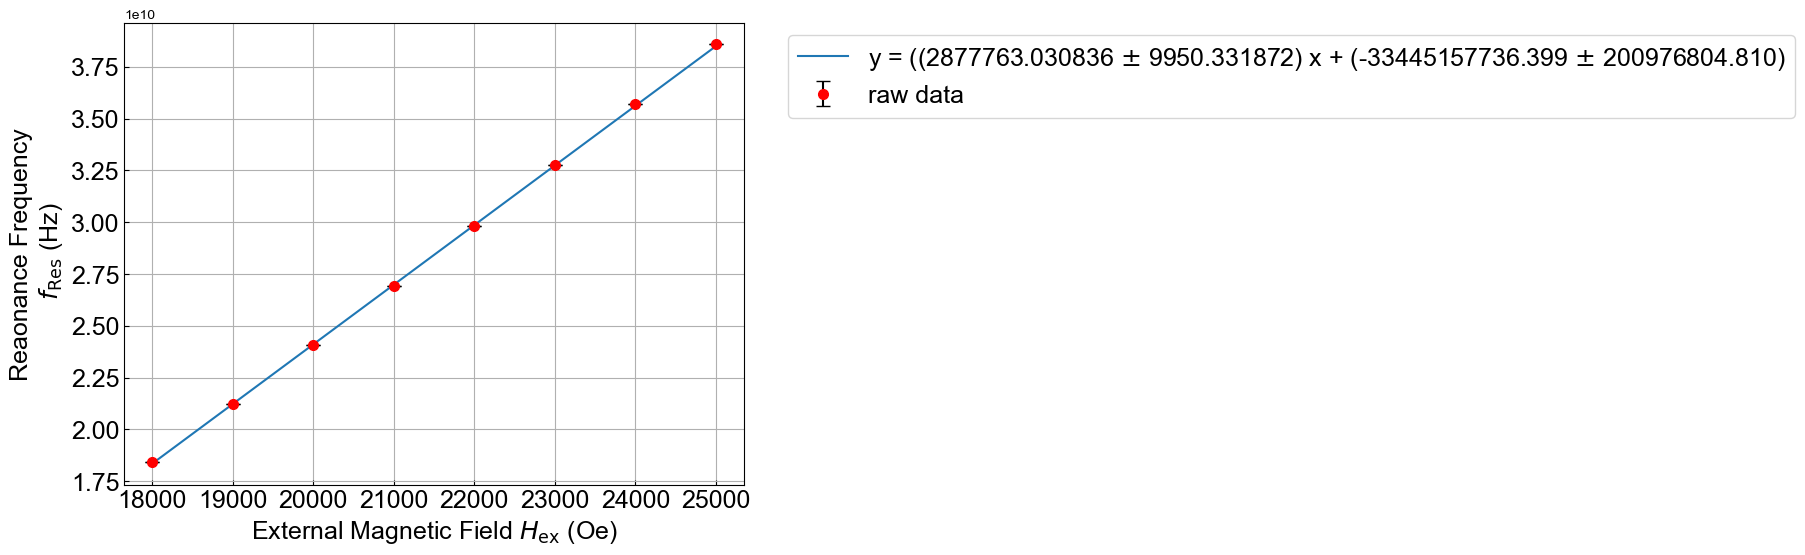

In [150]:
#印加磁場vs.共鳴周波数
plt.rcParams['font.family'] = 'arial'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
fig = plt.figure(figsize=(12, 10))
gs = gridspec.GridSpec(2, 2, height_ratios=[2, 2])
##########データの代入##################################################################################################
Filename='data'
filename='240320nicofe15-2'
date='240520'

path='/Users/ueno2/iCloudDrive/研究/FeCoNi3元合金/データ/PPMS-OPFMR'
save_path='/Users/ueno2/iCloudDrive/研究/FeCoNi3元合金/データ/PPMS-OPFMR/fitted_data/liner'
f=open(f'{path}/{Filename}/{filename}.txt','rt')
x_list=[]  #Hex
y_list=[]  #Freq
yerr_list=[] #フィッティング誤差

for i in range(3):
    next(f)
n=0
for line in f :
    n=n+1
    data = line[:-1].split('\t')
    x_list.append(float(data[0]))
    y_list.append(float(data[1])*10**9)
    yerr_list.append(float(data[3])*10**9)

x=np.array(x_list)
y=np.array(y_list)
yerr=np.array(yerr_list)

##########グラフのプロット##########################################################################################
fig=plt.figure(figsize=(8, 6))

###グラフ軸設定#################
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid(True)
plt.xlabel('External Magnetic Field $H_\mathrm{ex}$ (Oe)', fontsize=18)
plt.ylabel('Reaonance Frequency\n $f_\mathrm{Res} $ (Hz)', fontsize=18)

plt.errorbar(x_list,y_list, yerr = yerr_list, capsize=5, fmt='o', markersize=7, ecolor='black', markeredgecolor = "red", color='red',label="raw data")

p, cov =np.polyfit(x,y,1, w=1.0/yerr,cov=True) #1次関数フィティング
a = p[0]
b = p[1]
sigma_a = np.sqrt(cov[0,0])
sigma_b = np.sqrt(cov[1,1])
xx=np.linspace(x[0],x[-1],30001)
yy=np.polyval(p,xx) #結果からyを計算
plt.plot(xx,yy,label="y = (({:.6f} $\pm$ {:.6f}) x + ({:.3f} $\pm$ {:.3f})".format(a,sigma_a,b,sigma_b))

print(f"試料名:{filename}")
print(f"傾き:{a}\t± {sigma_a}")
print(f"切片:{b}\t± {sigma_b}")
print(f"gamma={2*np.pi*a}\t± {np.pi*sigma_a}")
print(f"g-factor={2*np.pi*a*hbar/muB}\t±\t {2*np.pi*sigma_a*hbar/muB}")
print(f"Ms,eff={-1/(2*2*np.pi*a)*b}\t±\t {1/(2*2*np.pi*a)*sigma_b}")
gamma=2*np.pi*a

plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',fontsize=18)

#print(x_list,y_list)

plt.show()
fig.savefig(f'{save_path}/g-factor_graph_{filename}.pdf',bbox_inches="tight",format="pdf", pad_inches=0.1)
fig.savefig(f'{save_path}/g-factor_graph_{filename}.png',bbox_inches="tight",format="png", pad_inches=0.1)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


試料名:240320nicofe15-2
傾き:0.012976638454172535	± 0.0007491271729213413
切片:26144041.87605481	± 18629448.83254108
ダンピング定数α(×10^(-3))=6.488319227086268	±	 0.37456358646067067
不均一線幅ΔH(0)=9.084848750892453	±	 6.473586821750655


<Figure size 1200x1000 with 0 Axes>

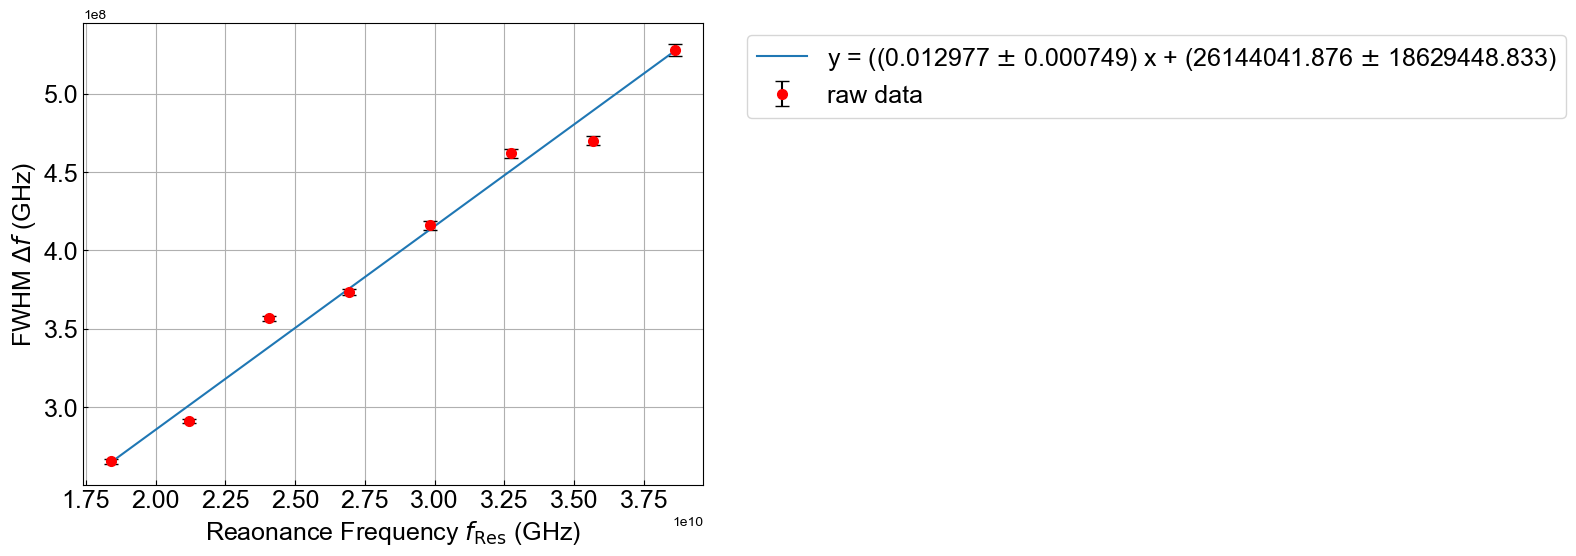

In [152]:
# ダンピング定数

#印加磁場vs.共鳴周波数
plt.rcParams['font.family'] = 'arial'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
fig = plt.figure(figsize=(12, 10))
gs = gridspec.GridSpec(2, 2, height_ratios=[2, 2])
##########データの代入##################################################################################################
Filename='data'
filename='240320nicofe15-2'
date='240520'

path='/Users/ueno2/iCloudDrive/研究/FeCoNi3元合金/データ/PPMS-OPFMR'
save_path='/Users/ueno2/iCloudDrive/研究/FeCoNi3元合金/データ/PPMS-OPFMR/fitted_data/liner'
f=open(f'{path}/{Filename}/{filename}.txt','rt')
x_list=[]  #fres
y_list=[]  #deltaf
yerr_list=[] #フィッティング誤差

for i in range(3):
    next(f)
n=0
for line in f :
    n=n+1
    data = line[:-1].split('\t')
    x_list.append(float(data[1])*10**9)
    y_list.append(float(data[4])*10**9)
    yerr_list.append(float(data[6])*10**9)

x=np.array(x_list)
y=np.array(y_list)
yerr=np.array(yerr_list)

##########グラフのプロット##########################################################################################
fig=plt.figure(figsize=(8, 6))

###グラフ軸設定#################
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid(True)
plt.xlabel('Reaonance Frequency $f_\mathrm{Res}$ (GHz)', fontsize=18)
plt.ylabel('FWHM $\Delta f$ (GHz)', fontsize=18)

plt.errorbar(x_list,y_list, yerr = yerr_list, capsize=5, fmt='o', markersize=7, ecolor='black', markeredgecolor = "red", color='red',label="raw data")

p, cov =np.polyfit(x,y,1, w=1.0/yerr,cov=True) #1次関数フィティング
a = p[0]
b = p[1]
sigma_a = np.sqrt(cov[0,0])
sigma_b = np.sqrt(cov[1,1])
xx=np.linspace(x[0],x[-1],30)
yy=np.polyval(p,xx) #結果からyを計算
plt.plot(xx,yy,label="y = (({:.6f} $\pm$ {:.6f}) x + ({:.3f} $\pm$ {:.3f})".format(a,sigma_a,b,sigma_b))

print(f"試料名:{filename}")
print(f"傾き:{a}\t± {sigma_a}")
print(f"切片:{b}\t± {sigma_b}")
print(f"ダンピング定数α(×10^(-3))={a/2*10**3}\t±\t {sigma_a/2*10**3}")
print(f"不均一線幅ΔH(0)={2*np.pi/gamma*b}\t±\t {2*np.pi/gamma*sigma_b}")


plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',fontsize=18)

#print(x_list,y_list)

plt.show()
fig.savefig(f'{save_path}/damp_graph_{filename}.pdf',bbox_inches="tight",format="pdf", pad_inches=0.1)
fig.savefig(f'{save_path}/damp_graph_{filename}.png',bbox_inches="tight",format="png", pad_inches=0.1)

## 240326nicofe25-1

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


試料名:240326nicofe25-1
傾き:2878773.6308015077	± 4321.120675848045
切片:-39037194495.90178	± 107823217.54838827
gamma=18087868.179748066	± 13575.20097051918
g-factor=2.0393200965649787	±	 0.0030610771682960994
Ms,eff=1079.0988221489101	±	 2.980539676563755


<Figure size 1200x1000 with 0 Axes>

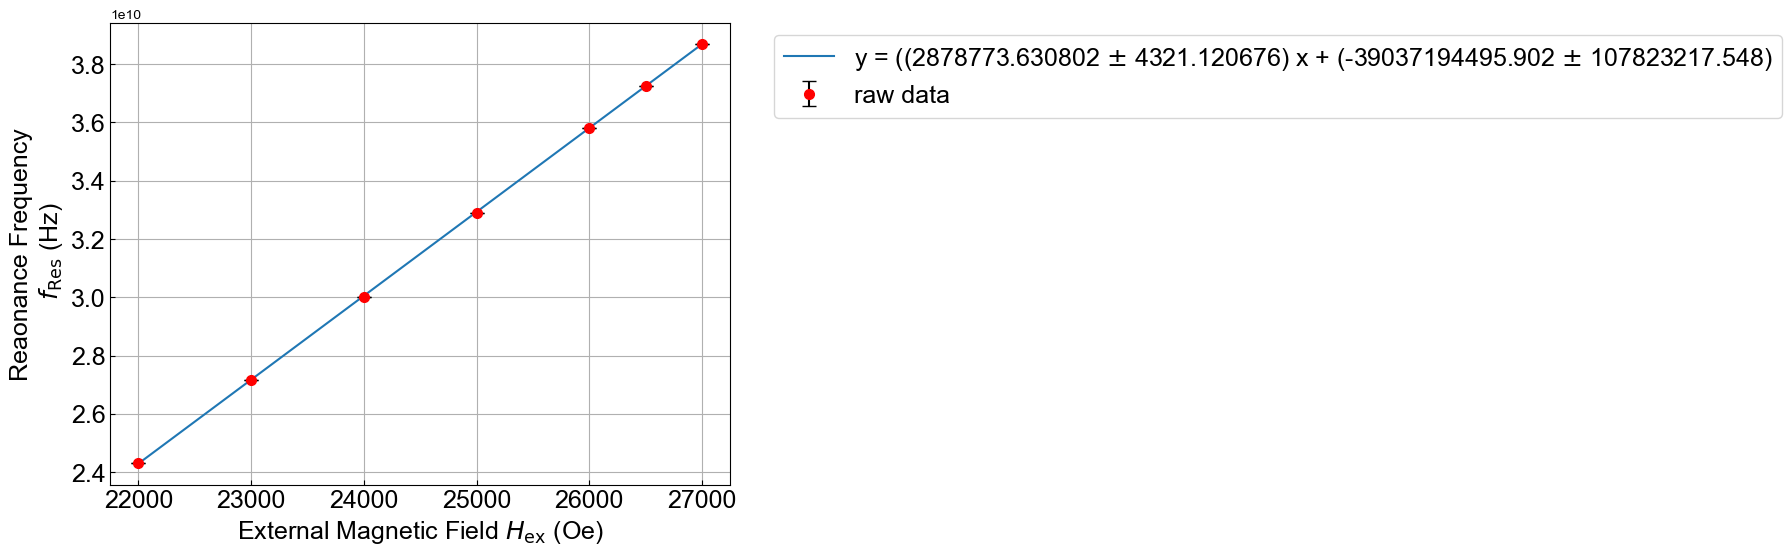

In [154]:
#印加磁場vs.共鳴周波数
plt.rcParams['font.family'] = 'arial'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
fig = plt.figure(figsize=(12, 10))
gs = gridspec.GridSpec(2, 2, height_ratios=[2, 2])
##########データの代入##################################################################################################
Filename='data'
filename='240326nicofe25-1'
date='240520'

path='/Users/ueno2/iCloudDrive/研究/FeCoNi3元合金/データ/PPMS-OPFMR'
save_path='/Users/ueno2/iCloudDrive/研究/FeCoNi3元合金/データ/PPMS-OPFMR/fitted_data/liner'
f=open(f'{path}/{Filename}/{filename}.txt','rt')
x_list=[]  #Hex
y_list=[]  #Freq
yerr_list=[] #フィッティング誤差

for i in range(5):
    next(f)
n=0
for line in f :
    n=n+1
    data = line[:-1].split('\t')
    x_list.append(float(data[0]))
    y_list.append(float(data[1])*10**9)
    yerr_list.append(float(data[3])*10**9)

x=np.array(x_list)
y=np.array(y_list)
yerr=np.array(yerr_list)

##########グラフのプロット##########################################################################################
fig=plt.figure(figsize=(8, 6))

###グラフ軸設定#################
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid(True)
plt.xlabel('External Magnetic Field $H_\mathrm{ex}$ (Oe)', fontsize=18)
plt.ylabel('Reaonance Frequency\n $f_\mathrm{Res} $ (Hz)', fontsize=18)

plt.errorbar(x_list,y_list, yerr = yerr_list, capsize=5, fmt='o', markersize=7, ecolor='black', markeredgecolor = "red", color='red',label="raw data")

p, cov =np.polyfit(x,y,1, w=1.0/yerr,cov=True) #1次関数フィティング
a = p[0]
b = p[1]
sigma_a = np.sqrt(cov[0,0])
sigma_b = np.sqrt(cov[1,1])
xx=np.linspace(x[0],x[-1],30001)
yy=np.polyval(p,xx) #結果からyを計算
plt.plot(xx,yy,label="y = (({:.6f} $\pm$ {:.6f}) x + ({:.3f} $\pm$ {:.3f})".format(a,sigma_a,b,sigma_b))

print(f"試料名:{filename}")
print(f"傾き:{a}\t± {sigma_a}")
print(f"切片:{b}\t± {sigma_b}")
print(f"gamma={2*np.pi*a}\t± {np.pi*sigma_a}")
print(f"g-factor={2*np.pi*a*hbar/muB}\t±\t {2*np.pi*sigma_a*hbar/muB}")
print(f"Ms,eff={-1/(2*2*np.pi*a)*b}\t±\t {1/(2*2*np.pi*a)*sigma_b}")
gamma=2*np.pi*a

plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',fontsize=18)

#print(x_list,y_list)

plt.show()
fig.savefig(f'{save_path}/g-factor_graph_{filename}.pdf',bbox_inches="tight",format="pdf", pad_inches=0.1)
fig.savefig(f'{save_path}/g-factor_graph_{filename}.png',bbox_inches="tight",format="png", pad_inches=0.1)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


試料名:240326nicofe25-1
傾き:0.009272096588887377	± 0.00038287073593943206
切片:24901349.36089752	± 9632026.217067841
ダンピング定数α(×10^(-3))=4.636048294443689	±	 0.19143536796971602
不均一線幅ΔH(0)=8.649985220951356	±	 3.345878298317639


<Figure size 1200x1000 with 0 Axes>

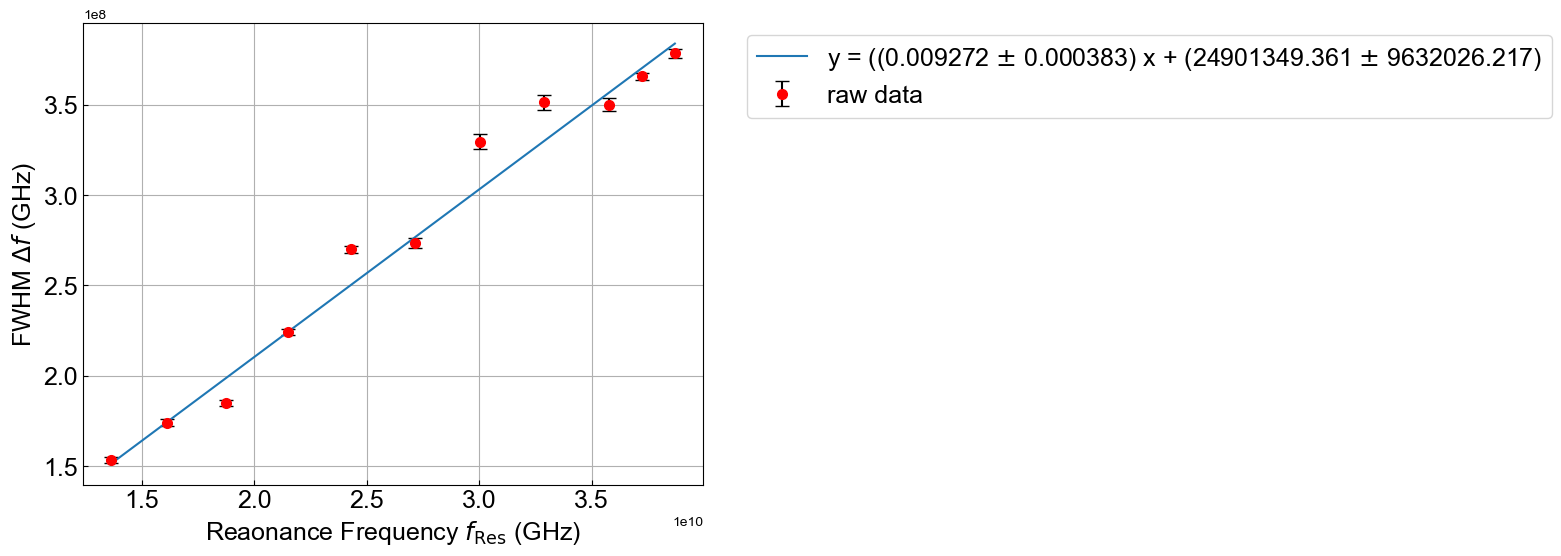

In [156]:
# ダンピング定数

#印加磁場vs.共鳴周波数
plt.rcParams['font.family'] = 'arial'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
fig = plt.figure(figsize=(12, 10))
gs = gridspec.GridSpec(2, 2, height_ratios=[2, 2])
##########データの代入##################################################################################################
Filename='data'
filename='240326nicofe25-1'
date='240520'

path='/Users/ueno2/iCloudDrive/研究/FeCoNi3元合金/データ/PPMS-OPFMR'
save_path='/Users/ueno2/iCloudDrive/研究/FeCoNi3元合金/データ/PPMS-OPFMR/fitted_data/liner'
f=open(f'{path}/{Filename}/{filename}.txt','rt')
x_list=[]  #fres
y_list=[]  #deltaf
yerr_list=[] #フィッティング誤差

for i in range(1):
    next(f)
n=0
for line in f :
    n=n+1
    data = line[:-1].split('\t')
    x_list.append(float(data[1])*10**9)
    y_list.append(float(data[4])*10**9)
    yerr_list.append(float(data[6])*10**9)

x=np.array(x_list)
y=np.array(y_list)
yerr=np.array(yerr_list)

##########グラフのプロット##########################################################################################
fig=plt.figure(figsize=(8, 6))

###グラフ軸設定#################
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid(True)
plt.xlabel('Reaonance Frequency $f_\mathrm{Res}$ (GHz)', fontsize=18)
plt.ylabel('FWHM $\Delta f$ (GHz)', fontsize=18)

plt.errorbar(x_list,y_list, yerr = yerr_list, capsize=5, fmt='o', markersize=7, ecolor='black', markeredgecolor = "red", color='red',label="raw data")

p, cov =np.polyfit(x,y,1, w=1.0/yerr,cov=True) #1次関数フィティング
a = p[0]
b = p[1]
sigma_a = np.sqrt(cov[0,0])
sigma_b = np.sqrt(cov[1,1])
xx=np.linspace(x[0],x[-1],30)
yy=np.polyval(p,xx) #結果からyを計算
plt.plot(xx,yy,label="y = (({:.6f} $\pm$ {:.6f}) x + ({:.3f} $\pm$ {:.3f})".format(a,sigma_a,b,sigma_b))

print(f"試料名:{filename}")
print(f"傾き:{a}\t± {sigma_a}")
print(f"切片:{b}\t± {sigma_b}")
print(f"ダンピング定数α(×10^(-3))={a/2*10**3}\t±\t {sigma_a/2*10**3}")
print(f"不均一線幅ΔH(0)={2*np.pi/gamma*b}\t±\t {2*np.pi/gamma*sigma_b}")


plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',fontsize=18)

#print(x_list,y_list)

plt.show()
fig.savefig(f'{save_path}/damp_graph_{filename}.pdf',bbox_inches="tight",format="pdf", pad_inches=0.1)
fig.savefig(f'{save_path}/damp_graph_{filename}.png',bbox_inches="tight",format="png", pad_inches=0.1)

# NiFe

## a11nife10

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


試料名:a11nife10
傾き:2978268.5810773075	± 6593.811945855393
切片:-20537680284.929092	± 83117956.6450757
gamma=18713013.38945953	± 20715.07116825192
g-factor=2.1098022106962238	±	 0.004671049182289906
Ms,eff=548.7539568719953	±	 2.2208597545249846


<Figure size 1200x1000 with 0 Axes>

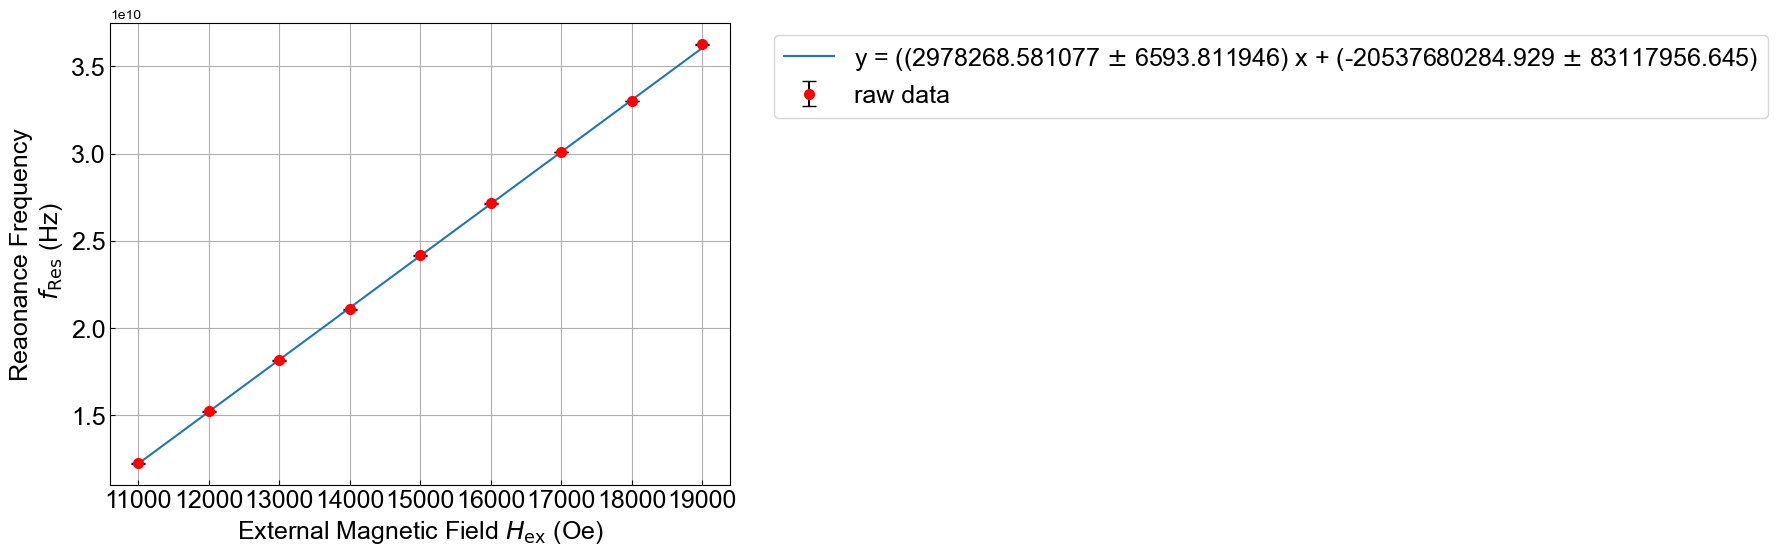

In [12]:
#印加磁場vs.共鳴周波数
plt.rcParams['font.family'] = 'arial'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
fig = plt.figure(figsize=(12, 10))
gs = gridspec.GridSpec(2, 2, height_ratios=[2, 2])
##########データの代入##################################################################################################
Filename='data'
filename='a11nife10'
date='240521'

path='/Users/ueno2/iCloudDrive/研究/FeCoNi3元合金/データ/PPMS-OPFMR'
save_path='/Users/ueno2/iCloudDrive/研究/FeCoNi3元合金/データ/PPMS-OPFMR/fitted_data/liner'
f=open(f'{path}/{Filename}/{filename}.txt','rt')
x_list=[]  #Hex
y_list=[]  #Freq
yerr_list=[] #フィッティング誤差

for i in range(2):
    next(f)
n=0
for line in f :
    n=n+1
    data = line[:-1].split('\t')
    x_list.append(float(data[0]))
    y_list.append(float(data[1])*10**9)
    yerr_list.append(float(data[3])*10**9)

x=np.array(x_list)
y=np.array(y_list)
yerr=np.array(yerr_list)

##########グラフのプロット##########################################################################################
fig=plt.figure(figsize=(8, 6))

###グラフ軸設定#################
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid(True)
plt.xlabel('External Magnetic Field $H_\mathrm{ex}$ (Oe)', fontsize=18)
plt.ylabel('Reaonance Frequency\n $f_\mathrm{Res} $ (Hz)', fontsize=18)

plt.errorbar(x_list,y_list, yerr = yerr_list, capsize=5, fmt='o', markersize=7, ecolor='black', markeredgecolor = "red", color='red',label="raw data")

p, cov =np.polyfit(x,y,1, w=1.0/yerr,cov=True) #1次関数フィティング
a = p[0]
b = p[1]
sigma_a = np.sqrt(cov[0,0])
sigma_b = np.sqrt(cov[1,1])
xx=np.linspace(x[0],x[-1],30001)
yy=np.polyval(p,xx) #結果からyを計算
plt.plot(xx,yy,label="y = (({:.6f} $\pm$ {:.6f}) x + ({:.3f} $\pm$ {:.3f})".format(a,sigma_a,b,sigma_b))

print(f"試料名:{filename}")
print(f"傾き:{a}\t± {sigma_a}")
print(f"切片:{b}\t± {sigma_b}")
print(f"gamma={2*np.pi*a}\t± {np.pi*sigma_a}")
print(f"g-factor={2*np.pi*a*hbar/muB}\t±\t {2*np.pi*sigma_a*hbar/muB}")
print(f"Ms,eff={-1/(2*2*np.pi*a)*b}\t±\t {1/(2*2*np.pi*a)*sigma_b}")
gamma=2*np.pi*a

plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',fontsize=18)

#print(x_list,y_list)

plt.show()
fig.savefig(f'{save_path}/g-factor_graph_{filename}.pdf',bbox_inches="tight",format="pdf", pad_inches=0.1)
fig.savefig(f'{save_path}/g-factor_graph_{filename}.png',bbox_inches="tight",format="png", pad_inches=0.1)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


試料名:ta11nife10
傾き:0.020288781897454894	± 0.002154542183834399
切片:284348930.9480191	± 31342996.17929077
ダンピング定数α(×10^(-3))=10.144390948727446	±	 1.0772710919171995
不均一線幅ΔH(0)=95.47457632083794	±	 10.523898475252121


<Figure size 1200x1000 with 0 Axes>

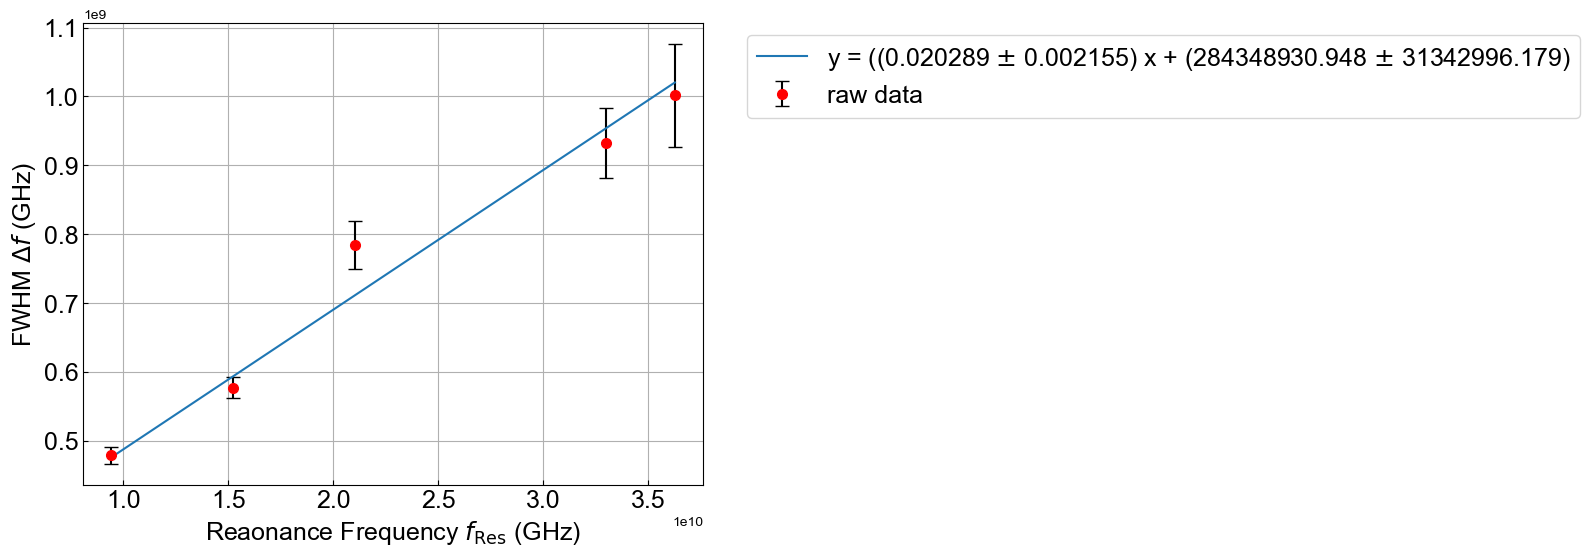

In [22]:
# ダンピング定数

#印加磁場vs.共鳴周波数
plt.rcParams['font.family'] = 'arial'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
fig = plt.figure(figsize=(12, 10))
gs = gridspec.GridSpec(2, 2, height_ratios=[2, 2])
##########データの代入##################################################################################################
Filename='data'
filename='ta11nife10'
date='240520'

path='/Users/ueno2/iCloudDrive/研究/FeCoNi3元合金/データ/PPMS-OPFMR'
save_path='/Users/ueno2/iCloudDrive/研究/FeCoNi3元合金/データ/PPMS-OPFMR/fitted_data/liner'
f=open(f'{path}/{Filename}/{filename}.txt','rt')
x_list=[]  #fres
y_list=[]  #deltaf
yerr_list=[] #フィッティング誤差

for i in range(1):
    next(f)
n=0
for line in f :
    n=n+1
    data = line[:-1].split('\t')
    x_list.append(float(data[1])*10**9)
    y_list.append(float(data[4])*10**9)
    yerr_list.append(float(data[6])*10**9)

x=np.array(x_list)
y=np.array(y_list)
yerr=np.array(yerr_list)

##########グラフのプロット##########################################################################################
fig=plt.figure(figsize=(8, 6))

###グラフ軸設定#################
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid(True)
plt.xlabel('Reaonance Frequency $f_\mathrm{Res}$ (GHz)', fontsize=18)
plt.ylabel('FWHM $\Delta f$ (GHz)', fontsize=18)

plt.errorbar(x_list,y_list, yerr = yerr_list, capsize=5, fmt='o', markersize=7, ecolor='black', markeredgecolor = "red", color='red',label="raw data")

p, cov =np.polyfit(x,y,1, w=1.0/yerr,cov=True) #1次関数フィティング
a = p[0]
b = p[1]
sigma_a = np.sqrt(cov[0,0])
sigma_b = np.sqrt(cov[1,1])
xx=np.linspace(x[0],x[-1],30)
yy=np.polyval(p,xx) #結果からyを計算
plt.plot(xx,yy,label="y = (({:.6f} $\pm$ {:.6f}) x + ({:.3f} $\pm$ {:.3f})".format(a,sigma_a,b,sigma_b))

print(f"試料名:{filename}")
print(f"傾き:{a}\t± {sigma_a}")
print(f"切片:{b}\t± {sigma_b}")
print(f"ダンピング定数α(×10^(-3))={a/2*10**3}\t±\t {sigma_a/2*10**3}")
print(f"不均一線幅ΔH(0)={2*np.pi/gamma*b}\t±\t {2*np.pi/gamma*sigma_b}")


plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',fontsize=18)

#print(x_list,y_list)

plt.show()
fig.savefig(f'{save_path}/damp_graph_{filename}.pdf',bbox_inches="tight",format="pdf", pad_inches=0.1)
fig.savefig(f'{save_path}/damp_graph_{filename}.png',bbox_inches="tight",format="png", pad_inches=0.1)

## a12nife20

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


試料名:a12nife20
傾き:2956110.5626575015	± 1428.5314894406865
切片:-28330724813.37546	± 22380654.806017496
gamma=18573790.453687992	± 4487.864032648546
g-factor=2.094105494643219	±	 0.0010119701472259184
Ms,eff=762.6532905067351	±	 0.6024794686313912


<Figure size 1200x1000 with 0 Axes>

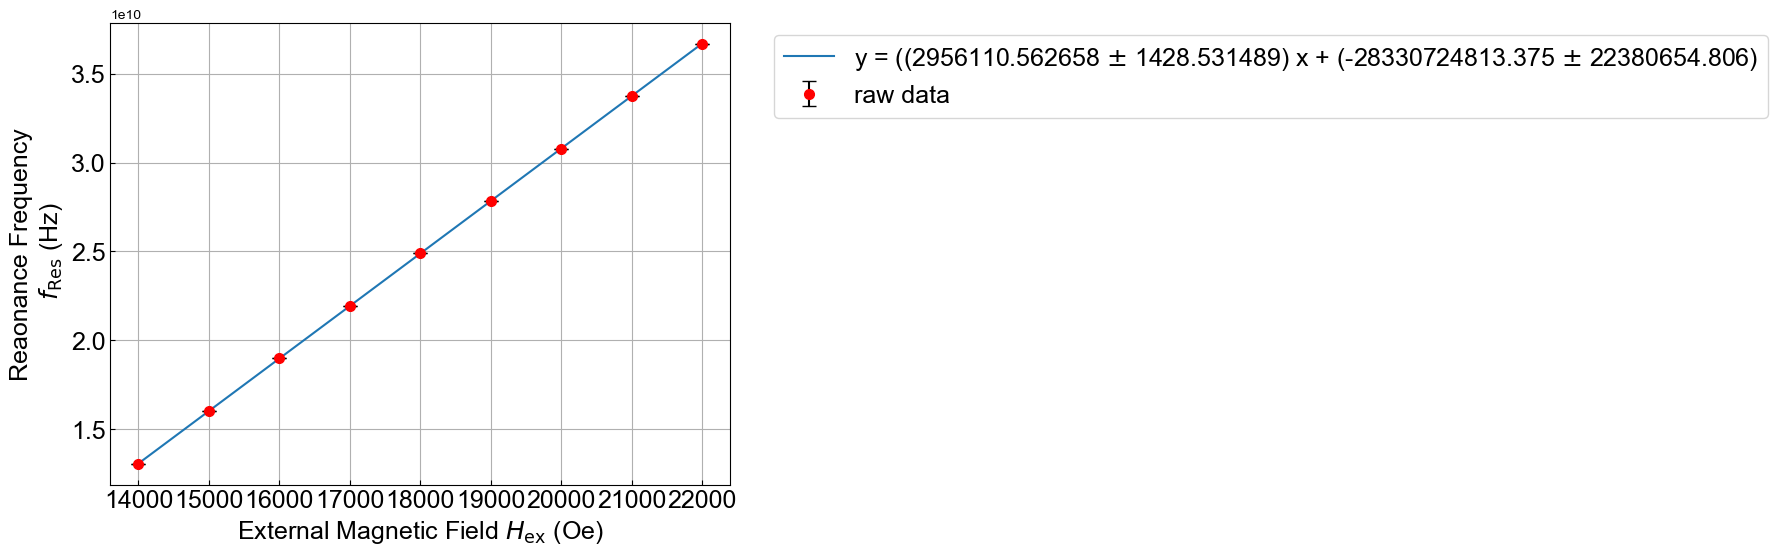

In [26]:
#印加磁場vs.共鳴周波数
plt.rcParams['font.family'] = 'arial'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
fig = plt.figure(figsize=(12, 10))
gs = gridspec.GridSpec(2, 2, height_ratios=[2, 2])
##########データの代入##################################################################################################
Filename='data'
filename='a12nife20'
date='240521'

path='/Users/ueno2/iCloudDrive/研究/FeCoNi3元合金/データ/PPMS-OPFMR'
save_path='/Users/ueno2/iCloudDrive/研究/FeCoNi3元合金/データ/PPMS-OPFMR/fitted_data/liner'
f=open(f'{path}/{Filename}/{filename}.txt','rt')
x_list=[]  #Hex
y_list=[]  #Freq
yerr_list=[] #フィッティング誤差

for i in range(1):
    next(f)
n=0
for line in f :
    n=n+1
    data = line[:-1].split('\t')
    x_list.append(float(data[0]))
    y_list.append(float(data[1])*10**9)
    yerr_list.append(float(data[3])*10**9)

x=np.array(x_list)
y=np.array(y_list)
yerr=np.array(yerr_list)

##########グラフのプロット##########################################################################################
fig=plt.figure(figsize=(8, 6))

###グラフ軸設定#################
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid(True)
plt.xlabel('External Magnetic Field $H_\mathrm{ex}$ (Oe)', fontsize=18)
plt.ylabel('Reaonance Frequency\n $f_\mathrm{Res} $ (Hz)', fontsize=18)

plt.errorbar(x_list,y_list, yerr = yerr_list, capsize=5, fmt='o', markersize=7, ecolor='black', markeredgecolor = "red", color='red',label="raw data")

p, cov =np.polyfit(x,y,1, w=1.0/yerr,cov=True) #1次関数フィティング
a = p[0]
b = p[1]
sigma_a = np.sqrt(cov[0,0])
sigma_b = np.sqrt(cov[1,1])
xx=np.linspace(x[0],x[-1],30001)
yy=np.polyval(p,xx) #結果からyを計算
plt.plot(xx,yy,label="y = (({:.6f} $\pm$ {:.6f}) x + ({:.3f} $\pm$ {:.3f})".format(a,sigma_a,b,sigma_b))

print(f"試料名:{filename}")
print(f"傾き:{a}\t± {sigma_a}")
print(f"切片:{b}\t± {sigma_b}")
print(f"gamma={2*np.pi*a}\t± {np.pi*sigma_a}")
print(f"g-factor={2*np.pi*a*hbar/muB}\t±\t {2*np.pi*sigma_a*hbar/muB}")
print(f"Ms,eff={-1/(2*2*np.pi*a)*b}\t±\t {1/(2*2*np.pi*a)*sigma_b}")
gamma=2*np.pi*a

plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',fontsize=18)

#print(x_list,y_list)

plt.show()
fig.savefig(f'{save_path}/g-factor_graph_{filename}.pdf',bbox_inches="tight",format="pdf", pad_inches=0.1)
fig.savefig(f'{save_path}/g-factor_graph_{filename}.png',bbox_inches="tight",format="png", pad_inches=0.1)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


試料名:a12nife20
傾き:0.012665314971544214	± 0.0008963530515048813
切片:28784438.80493624	± 16686056.63279252
ダンピング定数α(×10^(-3))=6.332657485772107	±	 0.44817652575244066
不均一線幅ΔH(0)=9.737267329764364	±	 5.6445982919502145


<Figure size 1200x1000 with 0 Axes>

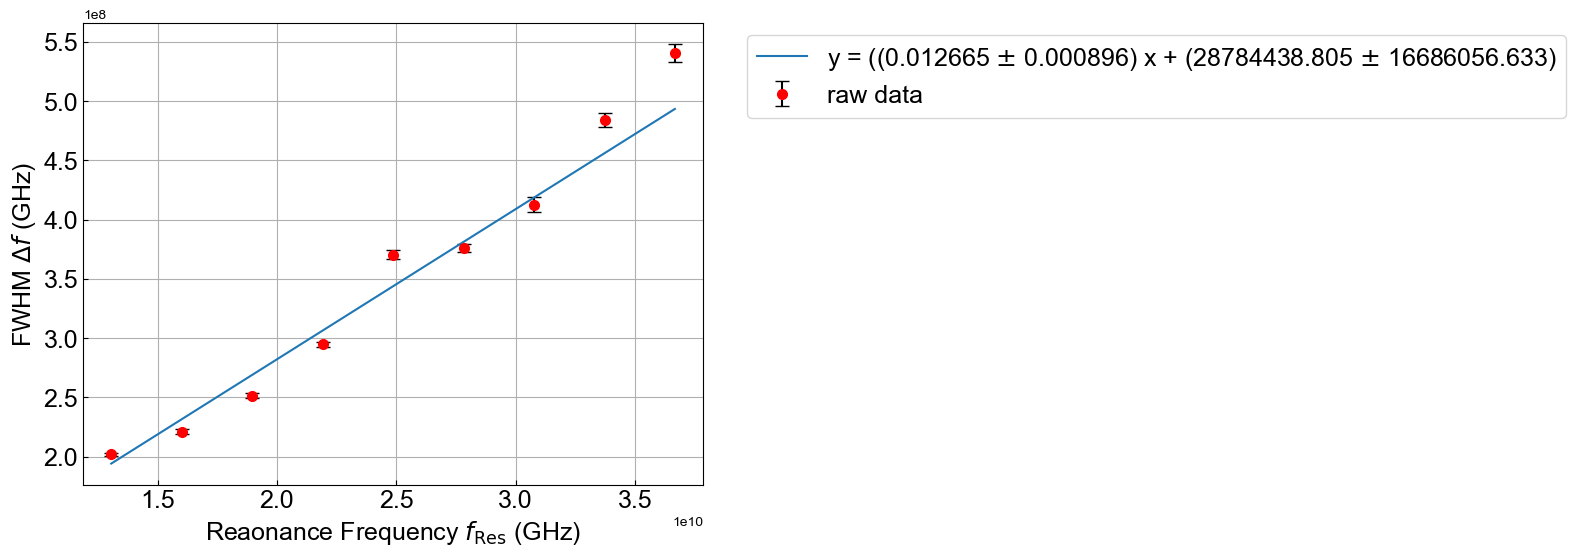

In [28]:
# ダンピング定数

#印加磁場vs.共鳴周波数
plt.rcParams['font.family'] = 'arial'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
fig = plt.figure(figsize=(12, 10))
gs = gridspec.GridSpec(2, 2, height_ratios=[2, 2])
##########データの代入##################################################################################################
Filename='data'
filename='a12nife20'
date='240521'

path='/Users/ueno2/iCloudDrive/研究/FeCoNi3元合金/データ/PPMS-OPFMR'
save_path='/Users/ueno2/iCloudDrive/研究/FeCoNi3元合金/データ/PPMS-OPFMR/fitted_data/liner'
f=open(f'{path}/{Filename}/{filename}.txt','rt')
x_list=[]  #fres
y_list=[]  #deltaf
yerr_list=[] #フィッティング誤差

for i in range(1):
    next(f)
n=0
for line in f :
    n=n+1
    data = line[:-1].split('\t')
    x_list.append(float(data[1])*10**9)
    y_list.append(float(data[4])*10**9)
    yerr_list.append(float(data[6])*10**9)

x=np.array(x_list)
y=np.array(y_list)
yerr=np.array(yerr_list)

##########グラフのプロット##########################################################################################
fig=plt.figure(figsize=(8, 6))

###グラフ軸設定#################
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid(True)
plt.xlabel('Reaonance Frequency $f_\mathrm{Res}$ (GHz)', fontsize=18)
plt.ylabel('FWHM $\Delta f$ (GHz)', fontsize=18)

plt.errorbar(x_list,y_list, yerr = yerr_list, capsize=5, fmt='o', markersize=7, ecolor='black', markeredgecolor = "red", color='red',label="raw data")

p, cov =np.polyfit(x,y,1, w=1.0/yerr,cov=True) #1次関数フィティング
a = p[0]
b = p[1]
sigma_a = np.sqrt(cov[0,0])
sigma_b = np.sqrt(cov[1,1])
xx=np.linspace(x[0],x[-1],30)
yy=np.polyval(p,xx) #結果からyを計算
plt.plot(xx,yy,label="y = (({:.6f} $\pm$ {:.6f}) x + ({:.3f} $\pm$ {:.3f})".format(a,sigma_a,b,sigma_b))

print(f"試料名:{filename}")
print(f"傾き:{a}\t± {sigma_a}")
print(f"切片:{b}\t± {sigma_b}")
print(f"ダンピング定数α(×10^(-3))={a/2*10**3}\t±\t {sigma_a/2*10**3}")
print(f"不均一線幅ΔH(0)={2*np.pi/gamma*b}\t±\t {2*np.pi/gamma*sigma_b}")


plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',fontsize=18)

#print(x_list,y_list)

plt.show()
fig.savefig(f'{save_path}/damp_graph_{filename}.pdf',bbox_inches="tight",format="pdf", pad_inches=0.1)
fig.savefig(f'{save_path}/damp_graph_{filename}.png',bbox_inches="tight",format="png", pad_inches=0.1)

## a13nife30

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


試料名:a13nife30
傾き:2928036.290516696	± 1397.7758028690441
切片:-34676618763.91365	± 26262147.350287333
gamma=18397394.599463124	± 4391.2421936589635
g-factor=2.0742177109145494	±	 0.0009901828524424305
Ms,eff=942.4328694054752	±	 0.7137463733873959


<Figure size 1200x1000 with 0 Axes>

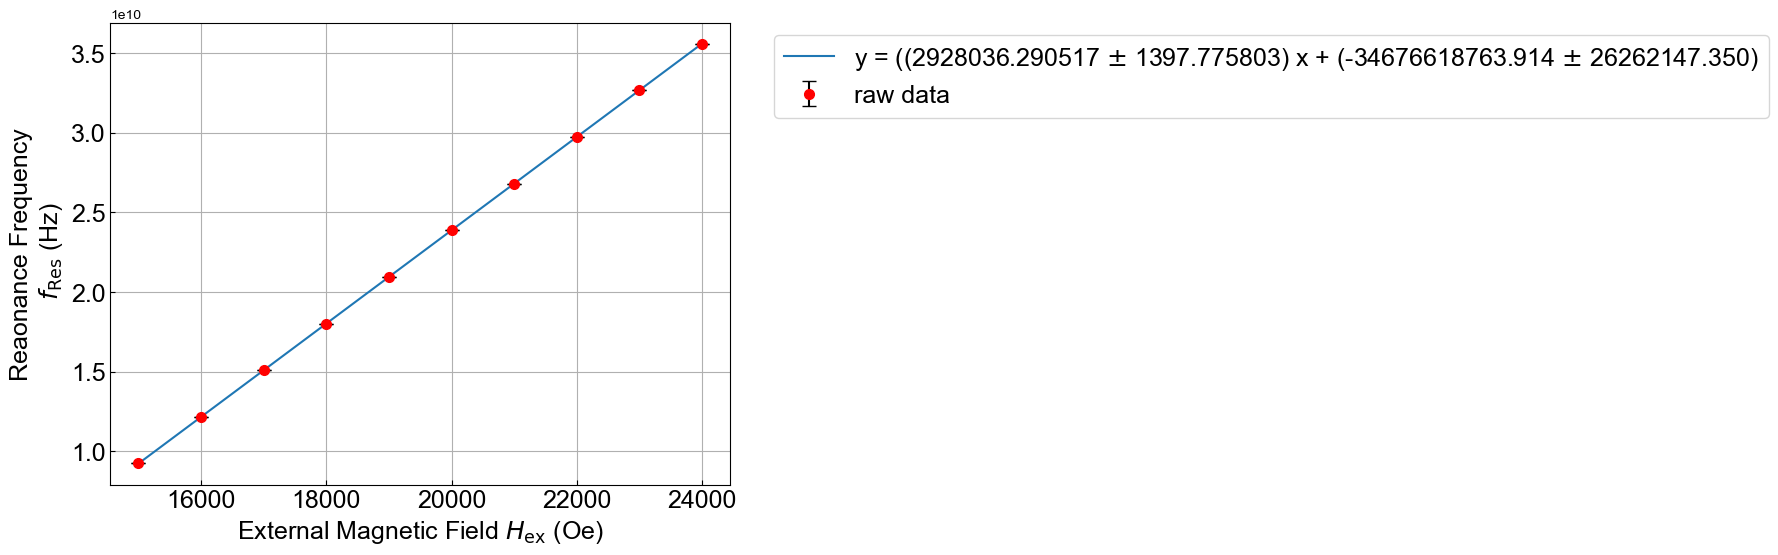

In [32]:
#印加磁場vs.共鳴周波数
plt.rcParams['font.family'] = 'arial'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
fig = plt.figure(figsize=(12, 10))
gs = gridspec.GridSpec(2, 2, height_ratios=[2, 2])
##########データの代入##################################################################################################
Filename='data'
filename='a13nife30'
date='240521'

path='/Users/ueno2/iCloudDrive/研究/FeCoNi3元合金/データ/PPMS-OPFMR'
save_path='/Users/ueno2/iCloudDrive/研究/FeCoNi3元合金/データ/PPMS-OPFMR/fitted_data/liner'
f=open(f'{path}/{Filename}/{filename}.txt','rt')
x_list=[]  #Hex
y_list=[]  #Freq
yerr_list=[] #フィッティング誤差

for i in range(1):
    next(f)
n=0
for line in f :
    n=n+1
    data = line[:-1].split('\t')
    x_list.append(float(data[0]))
    y_list.append(float(data[1])*10**9)
    yerr_list.append(float(data[3])*10**9)

x=np.array(x_list)
y=np.array(y_list)
yerr=np.array(yerr_list)

##########グラフのプロット##########################################################################################
fig=plt.figure(figsize=(8, 6))

###グラフ軸設定#################
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid(True)
plt.xlabel('External Magnetic Field $H_\mathrm{ex}$ (Oe)', fontsize=18)
plt.ylabel('Reaonance Frequency\n $f_\mathrm{Res} $ (Hz)', fontsize=18)

plt.errorbar(x_list,y_list, yerr = yerr_list, capsize=5, fmt='o', markersize=7, ecolor='black', markeredgecolor = "red", color='red',label="raw data")

p, cov =np.polyfit(x,y,1, w=1.0/yerr,cov=True) #1次関数フィティング
a = p[0]
b = p[1]
sigma_a = np.sqrt(cov[0,0])
sigma_b = np.sqrt(cov[1,1])
xx=np.linspace(x[0],x[-1],30001)
yy=np.polyval(p,xx) #結果からyを計算
plt.plot(xx,yy,label="y = (({:.6f} $\pm$ {:.6f}) x + ({:.3f} $\pm$ {:.3f})".format(a,sigma_a,b,sigma_b))

print(f"試料名:{filename}")
print(f"傾き:{a}\t± {sigma_a}")
print(f"切片:{b}\t± {sigma_b}")
print(f"gamma={2*np.pi*a}\t± {np.pi*sigma_a}")
print(f"g-factor={2*np.pi*a*hbar/muB}\t±\t {2*np.pi*sigma_a*hbar/muB}")
print(f"Ms,eff={-1/(2*2*np.pi*a)*b}\t±\t {1/(2*2*np.pi*a)*sigma_b}")
gamma=2*np.pi*a

plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',fontsize=18)

#print(x_list,y_list)

plt.show()
fig.savefig(f'{save_path}/g-factor_graph_{filename}.pdf',bbox_inches="tight",format="pdf", pad_inches=0.1)
fig.savefig(f'{save_path}/g-factor_graph_{filename}.png',bbox_inches="tight",format="png", pad_inches=0.1)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


試料名:a13nife30
傾き:0.008322097604173666	± 0.0007755763250972749
切片:33042434.791757774	± 16358084.138217434
ダンピング定数α(×10^(-3))=4.1610488020868335	±	 0.38778816254863746
不均一線幅ΔH(0)=11.284844692251726	±	 5.586708126261237


<Figure size 1200x1000 with 0 Axes>

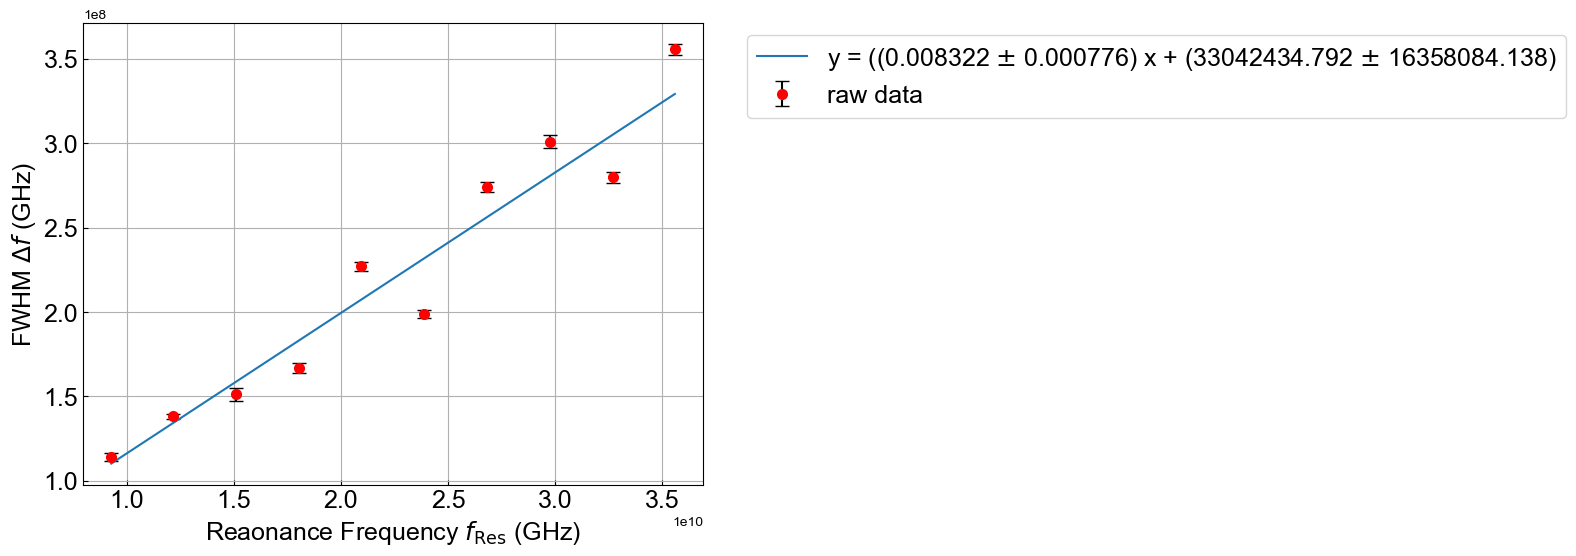

In [34]:
# ダンピング定数

#印加磁場vs.共鳴周波数
plt.rcParams['font.family'] = 'arial'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
fig = plt.figure(figsize=(12, 10))
gs = gridspec.GridSpec(2, 2, height_ratios=[2, 2])
##########データの代入##################################################################################################
Filename='data'
filename='a13nife30'
date='240521'

path='/Users/ueno2/iCloudDrive/研究/FeCoNi3元合金/データ/PPMS-OPFMR'
save_path='/Users/ueno2/iCloudDrive/研究/FeCoNi3元合金/データ/PPMS-OPFMR/fitted_data/liner'
f=open(f'{path}/{Filename}/{filename}.txt','rt')
x_list=[]  #fres
y_list=[]  #deltaf
yerr_list=[] #フィッティング誤差

for i in range(1):
    next(f)
n=0
for line in f :
    n=n+1
    data = line[:-1].split('\t')
    x_list.append(float(data[1])*10**9)
    y_list.append(float(data[4])*10**9)
    yerr_list.append(float(data[6])*10**9)

x=np.array(x_list)
y=np.array(y_list)
yerr=np.array(yerr_list)

##########グラフのプロット##########################################################################################
fig=plt.figure(figsize=(8, 6))

###グラフ軸設定#################
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid(True)
plt.xlabel('Reaonance Frequency $f_\mathrm{Res}$ (GHz)', fontsize=18)
plt.ylabel('FWHM $\Delta f$ (GHz)', fontsize=18)

plt.errorbar(x_list,y_list, yerr = yerr_list, capsize=5, fmt='o', markersize=7, ecolor='black', markeredgecolor = "red", color='red',label="raw data")

p, cov =np.polyfit(x,y,1, w=1.0/yerr,cov=True) #1次関数フィティング
a = p[0]
b = p[1]
sigma_a = np.sqrt(cov[0,0])
sigma_b = np.sqrt(cov[1,1])
xx=np.linspace(x[0],x[-1],30)
yy=np.polyval(p,xx) #結果からyを計算
plt.plot(xx,yy,label="y = (({:.6f} $\pm$ {:.6f}) x + ({:.3f} $\pm$ {:.3f})".format(a,sigma_a,b,sigma_b))

print(f"試料名:{filename}")
print(f"傾き:{a}\t± {sigma_a}")
print(f"切片:{b}\t± {sigma_b}")
print(f"ダンピング定数α(×10^(-3))={a/2*10**3}\t±\t {sigma_a/2*10**3}")
print(f"不均一線幅ΔH(0)={2*np.pi/gamma*b}\t±\t {2*np.pi/gamma*sigma_b}")


plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',fontsize=18)

#print(x_list,y_list)

plt.show()
fig.savefig(f'{save_path}/damp_graph_{filename}.pdf',bbox_inches="tight",format="pdf", pad_inches=0.1)
fig.savefig(f'{save_path}/damp_graph_{filename}.png',bbox_inches="tight",format="png", pad_inches=0.1)

## a14Nife40

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


試料名:a14Nife40
傾き:2917022.2143745297	± 1289.4954004407814
切片:-41590725016.45694	± 27026223.61041028
gamma=18328191.118074507	± 4051.0692768625872
g-factor=2.0664153514023282	±	 0.0009134771335997095
Ms,eff=1134.6107411396938	±	 0.7372856229046557


<Figure size 1200x1000 with 0 Axes>

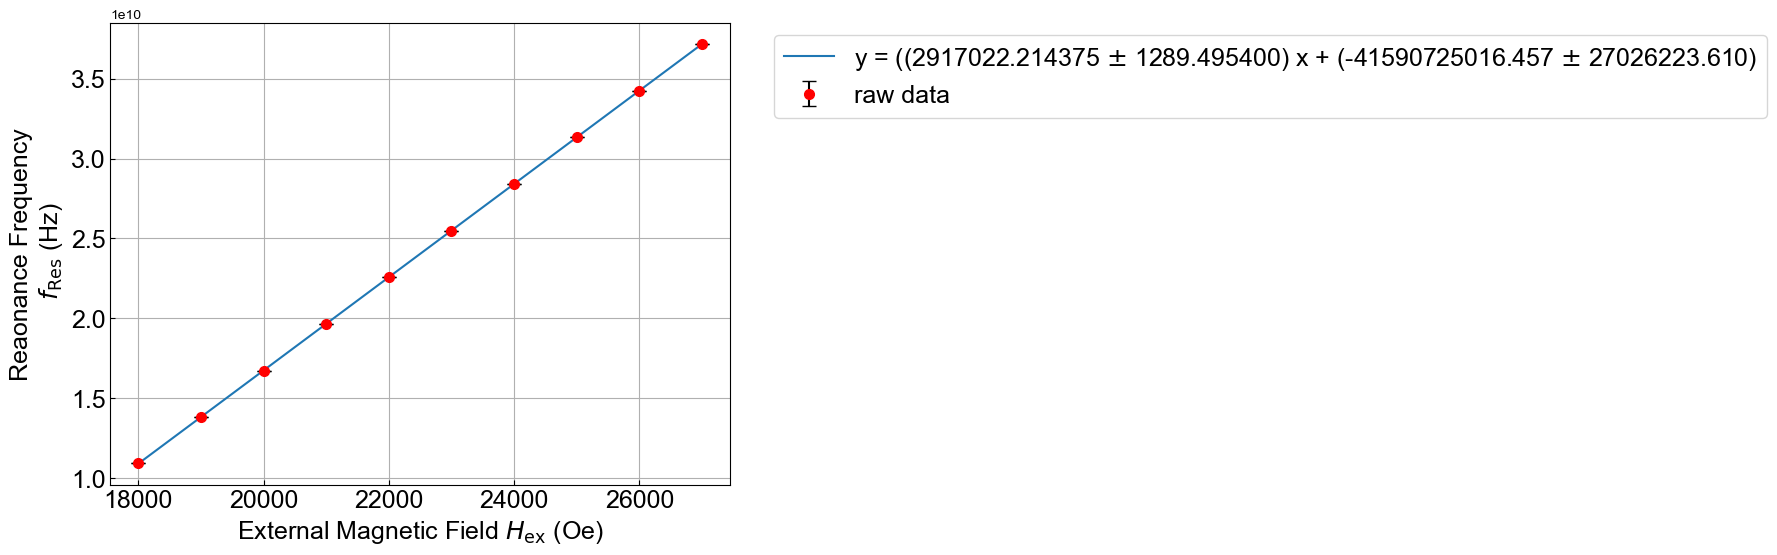

In [38]:
#印加磁場vs.共鳴周波数
plt.rcParams['font.family'] = 'arial'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
fig = plt.figure(figsize=(12, 10))
gs = gridspec.GridSpec(2, 2, height_ratios=[2, 2])
##########データの代入##################################################################################################
Filename='data'
filename='a14Nife40'
date='240521'

path='/Users/ueno2/iCloudDrive/研究/FeCoNi3元合金/データ/PPMS-OPFMR'
save_path='/Users/ueno2/iCloudDrive/研究/FeCoNi3元合金/データ/PPMS-OPFMR/fitted_data/liner'
f=open(f'{path}/{Filename}/{filename}.txt','rt')
x_list=[]  #Hex
y_list=[]  #Freq
yerr_list=[] #フィッティング誤差

for i in range(1):
    next(f)
n=0
for line in f :
    n=n+1
    data = line[:-1].split('\t')
    x_list.append(float(data[0]))
    y_list.append(float(data[1])*10**9)
    yerr_list.append(float(data[3])*10**9)

x=np.array(x_list)
y=np.array(y_list)
yerr=np.array(yerr_list)

##########グラフのプロット##########################################################################################
fig=plt.figure(figsize=(8, 6))

###グラフ軸設定#################
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid(True)
plt.xlabel('External Magnetic Field $H_\mathrm{ex}$ (Oe)', fontsize=18)
plt.ylabel('Reaonance Frequency\n $f_\mathrm{Res} $ (Hz)', fontsize=18)

plt.errorbar(x_list,y_list, yerr = yerr_list, capsize=5, fmt='o', markersize=7, ecolor='black', markeredgecolor = "red", color='red',label="raw data")

p, cov =np.polyfit(x,y,1, w=1.0/yerr,cov=True) #1次関数フィティング
a = p[0]
b = p[1]
sigma_a = np.sqrt(cov[0,0])
sigma_b = np.sqrt(cov[1,1])
xx=np.linspace(x[0],x[-1],30001)
yy=np.polyval(p,xx) #結果からyを計算
plt.plot(xx,yy,label="y = (({:.6f} $\pm$ {:.6f}) x + ({:.3f} $\pm$ {:.3f})".format(a,sigma_a,b,sigma_b))

print(f"試料名:{filename}")
print(f"傾き:{a}\t± {sigma_a}")
print(f"切片:{b}\t± {sigma_b}")
print(f"gamma={2*np.pi*a}\t± {np.pi*sigma_a}")
print(f"g-factor={2*np.pi*a*hbar/muB}\t±\t {2*np.pi*sigma_a*hbar/muB}")
print(f"Ms,eff={-1/(2*2*np.pi*a)*b}\t±\t {1/(2*2*np.pi*a)*sigma_b}")
gamma=2*np.pi*a

plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',fontsize=18)

#print(x_list,y_list)

plt.show()
fig.savefig(f'{save_path}/g-factor_graph_{filename}.pdf',bbox_inches="tight",format="pdf", pad_inches=0.1)
fig.savefig(f'{save_path}/g-factor_graph_{filename}.png',bbox_inches="tight",format="png", pad_inches=0.1)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


試料名:a14Nife40
傾き:0.007260693353504997	± 0.0006652893819213573
切片:8346690.749004963	± 13410633.983488796
ダンピング定数α(×10^(-3))=3.630346676752499	±	 0.33264469096067867
不均一線幅ΔH(0)=2.8613737351310045	±	 4.597371222407476


<Figure size 1200x1000 with 0 Axes>

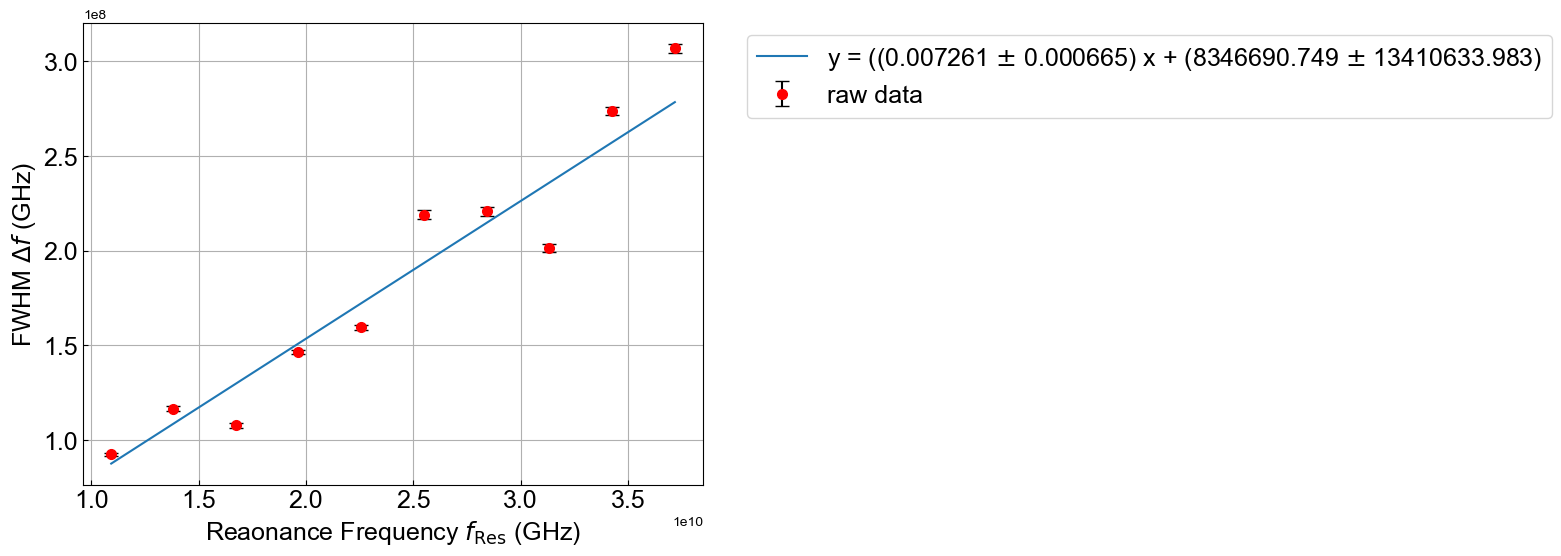

In [40]:
# ダンピング定数

#印加磁場vs.共鳴周波数
plt.rcParams['font.family'] = 'arial'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
fig = plt.figure(figsize=(12, 10))
gs = gridspec.GridSpec(2, 2, height_ratios=[2, 2])
##########データの代入##################################################################################################
Filename='data'
filename='a14Nife40'
date='240521'

path='/Users/ueno2/iCloudDrive/研究/FeCoNi3元合金/データ/PPMS-OPFMR'
save_path='/Users/ueno2/iCloudDrive/研究/FeCoNi3元合金/データ/PPMS-OPFMR/fitted_data/liner'
f=open(f'{path}/{Filename}/{filename}.txt','rt')
x_list=[]  #fres
y_list=[]  #deltaf
yerr_list=[] #フィッティング誤差

for i in range(1):
    next(f)
n=0
for line in f :
    n=n+1
    data = line[:-1].split('\t')
    x_list.append(float(data[1])*10**9)
    y_list.append(float(data[4])*10**9)
    yerr_list.append(float(data[6])*10**9)

x=np.array(x_list)
y=np.array(y_list)
yerr=np.array(yerr_list)

##########グラフのプロット##########################################################################################
fig=plt.figure(figsize=(8, 6))

###グラフ軸設定#################
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid(True)
plt.xlabel('Reaonance Frequency $f_\mathrm{Res}$ (GHz)', fontsize=18)
plt.ylabel('FWHM $\Delta f$ (GHz)', fontsize=18)

plt.errorbar(x_list,y_list, yerr = yerr_list, capsize=5, fmt='o', markersize=7, ecolor='black', markeredgecolor = "red", color='red',label="raw data")

p, cov =np.polyfit(x,y,1, w=1.0/yerr,cov=True) #1次関数フィティング
a = p[0]
b = p[1]
sigma_a = np.sqrt(cov[0,0])
sigma_b = np.sqrt(cov[1,1])
xx=np.linspace(x[0],x[-1],30)
yy=np.polyval(p,xx) #結果からyを計算
plt.plot(xx,yy,label="y = (({:.6f} $\pm$ {:.6f}) x + ({:.3f} $\pm$ {:.3f})".format(a,sigma_a,b,sigma_b))

print(f"試料名:{filename}")
print(f"傾き:{a}\t± {sigma_a}")
print(f"切片:{b}\t± {sigma_b}")
print(f"ダンピング定数α(×10^(-3))={a/2*10**3}\t±\t {sigma_a/2*10**3}")
print(f"不均一線幅ΔH(0)={2*np.pi/gamma*b}\t±\t {2*np.pi/gamma*sigma_b}")


plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',fontsize=18)

#print(x_list,y_list)

plt.show()
fig.savefig(f'{save_path}/damp_graph_{filename}.pdf',bbox_inches="tight",format="pdf", pad_inches=0.1)
fig.savefig(f'{save_path}/damp_graph_{filename}.png',bbox_inches="tight",format="png", pad_inches=0.1)

## 190508NiFe50

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


試料名:190508NiFe50
傾き:2908066.7653818303	± 2367.3098019049467
切片:-47162336529.92758	± 59543892.55489786
gamma=18271922.37254438	± 7437.123082435689
g-factor=2.060071321114858	±	 0.0016769996786707706
Ms,eff=1290.5685446867456	±	 1.6293822658848762


<Figure size 1200x1000 with 0 Axes>

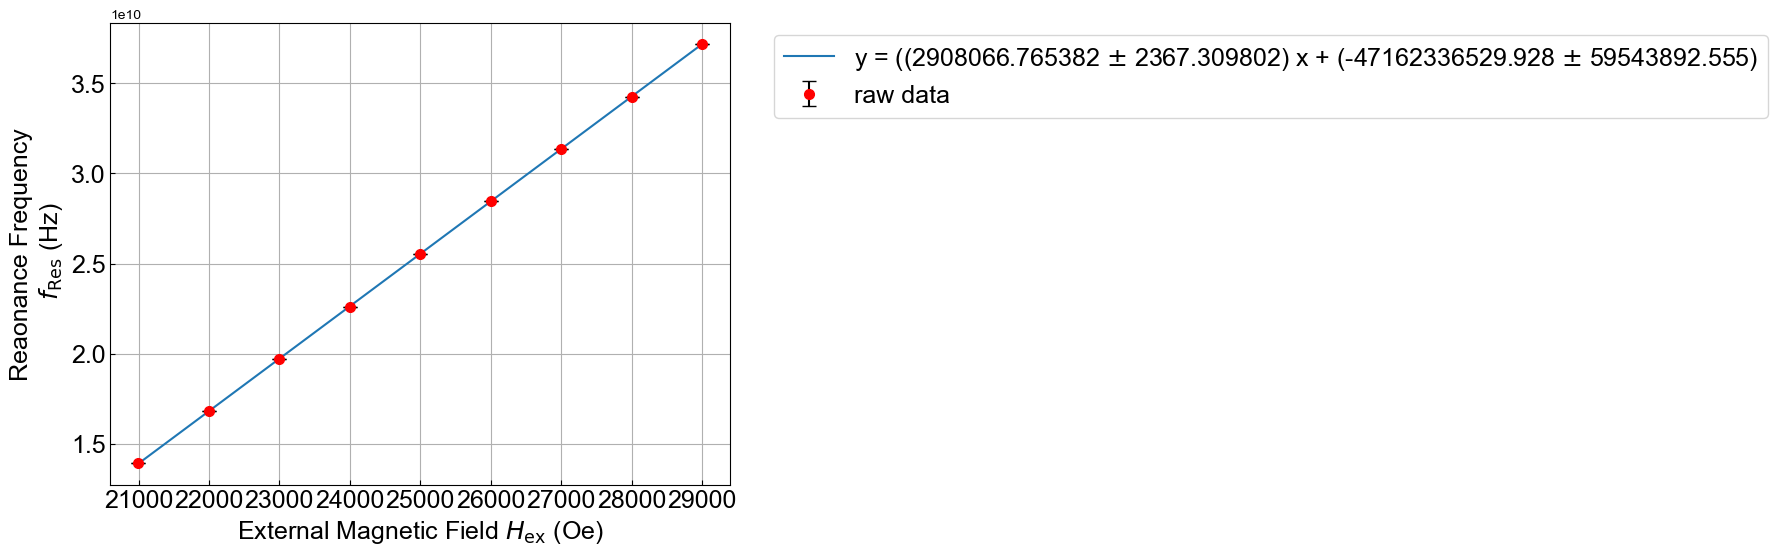

In [44]:
#印加磁場vs.共鳴周波数
plt.rcParams['font.family'] = 'arial'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
fig = plt.figure(figsize=(12, 10))
gs = gridspec.GridSpec(2, 2, height_ratios=[2, 2])
##########データの代入##################################################################################################
Filename='data'
filename='190508NiFe50'
date='240521'

path='/Users/ueno2/iCloudDrive/研究/FeCoNi3元合金/データ/PPMS-OPFMR'
save_path='/Users/ueno2/iCloudDrive/研究/FeCoNi3元合金/データ/PPMS-OPFMR/fitted_data/liner'
f=open(f'{path}/{Filename}/{filename}.txt','rt')
x_list=[]  #Hex
y_list=[]  #Freq
yerr_list=[] #フィッティング誤差

for i in range(1):
    next(f)
n=0
for line in f :
    n=n+1
    data = line[:-1].split('\t')
    x_list.append(float(data[0]))
    y_list.append(float(data[1])*10**9)
    yerr_list.append(float(data[3])*10**9)

x=np.array(x_list)
y=np.array(y_list)
yerr=np.array(yerr_list)

##########グラフのプロット##########################################################################################
fig=plt.figure(figsize=(8, 6))

###グラフ軸設定#################
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid(True)
plt.xlabel('External Magnetic Field $H_\mathrm{ex}$ (Oe)', fontsize=18)
plt.ylabel('Reaonance Frequency\n $f_\mathrm{Res} $ (Hz)', fontsize=18)

plt.errorbar(x_list,y_list, yerr = yerr_list, capsize=5, fmt='o', markersize=7, ecolor='black', markeredgecolor = "red", color='red',label="raw data")

p, cov =np.polyfit(x,y,1, w=1.0/yerr,cov=True) #1次関数フィティング
a = p[0]
b = p[1]
sigma_a = np.sqrt(cov[0,0])
sigma_b = np.sqrt(cov[1,1])
xx=np.linspace(x[0],x[-1],30001)
yy=np.polyval(p,xx) #結果からyを計算
plt.plot(xx,yy,label="y = (({:.6f} $\pm$ {:.6f}) x + ({:.3f} $\pm$ {:.3f})".format(a,sigma_a,b,sigma_b))

print(f"試料名:{filename}")
print(f"傾き:{a}\t± {sigma_a}")
print(f"切片:{b}\t± {sigma_b}")
print(f"gamma={2*np.pi*a}\t± {np.pi*sigma_a}")
print(f"g-factor={2*np.pi*a*hbar/muB}\t±\t {2*np.pi*sigma_a*hbar/muB}")
print(f"Ms,eff={-1/(2*2*np.pi*a)*b}\t±\t {1/(2*2*np.pi*a)*sigma_b}")
gamma=2*np.pi*a

plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',fontsize=18)

#print(x_list,y_list)

plt.show()
fig.savefig(f'{save_path}/g-factor_graph_{filename}.pdf',bbox_inches="tight",format="pdf", pad_inches=0.1)
fig.savefig(f'{save_path}/g-factor_graph_{filename}.png',bbox_inches="tight",format="png", pad_inches=0.1)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


試料名:190508NiFe50
傾き:0.009265436674260004	± 0.0011029304651015946
切片:-37470283.40737901	± 28416709.381138448
ダンピング定数α(×10^(-3))=4.632718337130002	±	 0.5514652325507973
不均一線幅ΔH(0)=-12.884946058815519	±	 9.771683965243254


<Figure size 1200x1000 with 0 Axes>

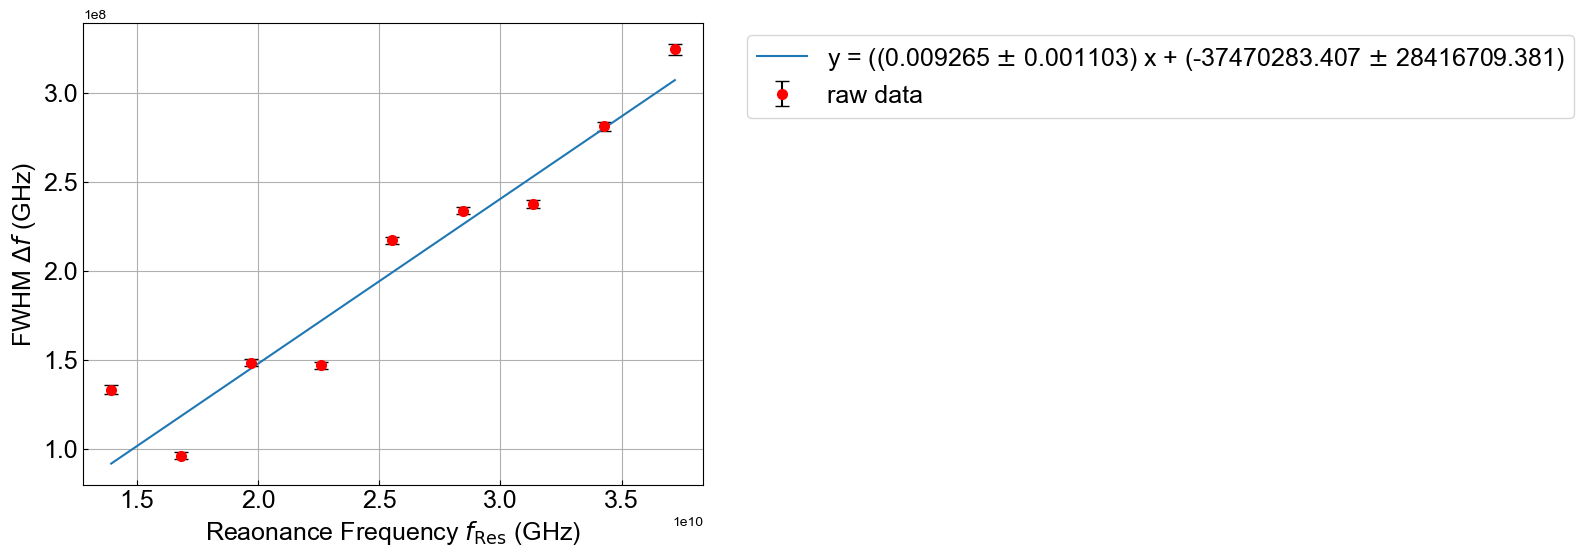

In [46]:
# ダンピング定数

#印加磁場vs.共鳴周波数
plt.rcParams['font.family'] = 'arial'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
fig = plt.figure(figsize=(12, 10))
gs = gridspec.GridSpec(2, 2, height_ratios=[2, 2])
##########データの代入##################################################################################################
Filename='data'
filename='190508NiFe50'
date='240521'

path='/Users/ueno2/iCloudDrive/研究/FeCoNi3元合金/データ/PPMS-OPFMR'
save_path='/Users/ueno2/iCloudDrive/研究/FeCoNi3元合金/データ/PPMS-OPFMR/fitted_data/liner'
f=open(f'{path}/{Filename}/{filename}.txt','rt')
x_list=[]  #fres
y_list=[]  #deltaf
yerr_list=[] #フィッティング誤差

for i in range(1):
    next(f)
n=0
for line in f :
    n=n+1
    data = line[:-1].split('\t')
    x_list.append(float(data[1])*10**9)
    y_list.append(float(data[4])*10**9)
    yerr_list.append(float(data[6])*10**9)

x=np.array(x_list)
y=np.array(y_list)
yerr=np.array(yerr_list)

##########グラフのプロット##########################################################################################
fig=plt.figure(figsize=(8, 6))

###グラフ軸設定#################
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid(True)
plt.xlabel('Reaonance Frequency $f_\mathrm{Res}$ (GHz)', fontsize=18)
plt.ylabel('FWHM $\Delta f$ (GHz)', fontsize=18)

plt.errorbar(x_list,y_list, yerr = yerr_list, capsize=5, fmt='o', markersize=7, ecolor='black', markeredgecolor = "red", color='red',label="raw data")

p, cov =np.polyfit(x,y,1, w=1.0/yerr,cov=True) #1次関数フィティング
a = p[0]
b = p[1]
sigma_a = np.sqrt(cov[0,0])
sigma_b = np.sqrt(cov[1,1])
xx=np.linspace(x[0],x[-1],30)
yy=np.polyval(p,xx) #結果からyを計算
plt.plot(xx,yy,label="y = (({:.6f} $\pm$ {:.6f}) x + ({:.3f} $\pm$ {:.3f})".format(a,sigma_a,b,sigma_b))

print(f"試料名:{filename}")
print(f"傾き:{a}\t± {sigma_a}")
print(f"切片:{b}\t± {sigma_b}")
print(f"ダンピング定数α(×10^(-3))={a/2*10**3}\t±\t {sigma_a/2*10**3}")
print(f"不均一線幅ΔH(0)={2*np.pi/gamma*b}\t±\t {2*np.pi/gamma*sigma_b}")


plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',fontsize=18)

#print(x_list,y_list)

plt.show()
fig.savefig(f'{save_path}/damp_graph_{filename}.pdf',bbox_inches="tight",format="pdf", pad_inches=0.1)
fig.savefig(f'{save_path}/damp_graph_{filename}.png',bbox_inches="tight",format="png", pad_inches=0.1)

## a15NiFe80

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


試料名:a15NiFe80
傾き:2909887.803537348	± 1567.2067810382694
切片:-49265699271.00125	± 42718503.524109825
gamma=18283364.29272694	± 4923.525309965935
g-factor=2.0613613425557324	±	 0.0011102075723662971
Ms,eff=1347.282110727263	±	 1.1682342166398527


<Figure size 1200x1000 with 0 Axes>

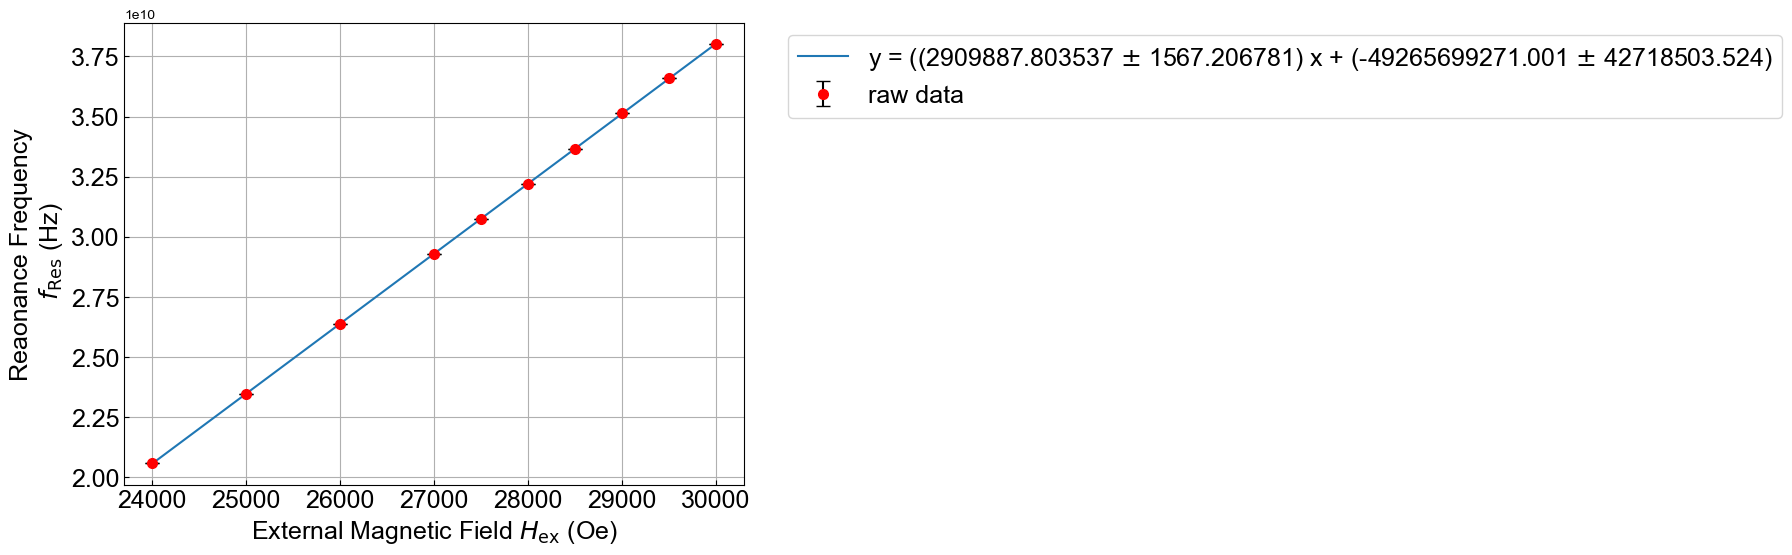

In [49]:
#印加磁場vs.共鳴周波数
plt.rcParams['font.family'] = 'arial'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
fig = plt.figure(figsize=(12, 10))
gs = gridspec.GridSpec(2, 2, height_ratios=[2, 2])
##########データの代入##################################################################################################
Filename='data'
filename='a15NiFe80'
date='240521'

path='/Users/ueno2/iCloudDrive/研究/FeCoNi3元合金/データ/PPMS-OPFMR'
save_path='/Users/ueno2/iCloudDrive/研究/FeCoNi3元合金/データ/PPMS-OPFMR/fitted_data/liner'
f=open(f'{path}/{Filename}/{filename}.txt','rt')
x_list=[]  #Hex
y_list=[]  #Freq
yerr_list=[] #フィッティング誤差

for i in range(1):
    next(f)
n=0
for line in f :
    n=n+1
    data = line[:-1].split('\t')
    x_list.append(float(data[0]))
    y_list.append(float(data[1])*10**9)
    yerr_list.append(float(data[3])*10**9)

x=np.array(x_list)
y=np.array(y_list)
yerr=np.array(yerr_list)

##########グラフのプロット##########################################################################################
fig=plt.figure(figsize=(8, 6))

###グラフ軸設定#################
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid(True)
plt.xlabel('External Magnetic Field $H_\mathrm{ex}$ (Oe)', fontsize=18)
plt.ylabel('Reaonance Frequency\n $f_\mathrm{Res} $ (Hz)', fontsize=18)

plt.errorbar(x_list,y_list, yerr = yerr_list, capsize=5, fmt='o', markersize=7, ecolor='black', markeredgecolor = "red", color='red',label="raw data")

p, cov =np.polyfit(x,y,1, w=1.0/yerr,cov=True) #1次関数フィティング
a = p[0]
b = p[1]
sigma_a = np.sqrt(cov[0,0])
sigma_b = np.sqrt(cov[1,1])
xx=np.linspace(x[0],x[-1],30001)
yy=np.polyval(p,xx) #結果からyを計算
plt.plot(xx,yy,label="y = (({:.6f} $\pm$ {:.6f}) x + ({:.3f} $\pm$ {:.3f})".format(a,sigma_a,b,sigma_b))

print(f"試料名:{filename}")
print(f"傾き:{a}\t± {sigma_a}")
print(f"切片:{b}\t± {sigma_b}")
print(f"gamma={2*np.pi*a}\t± {np.pi*sigma_a}")
print(f"g-factor={2*np.pi*a*hbar/muB}\t±\t {2*np.pi*sigma_a*hbar/muB}")
print(f"Ms,eff={-1/(2*2*np.pi*a)*b}\t±\t {1/(2*2*np.pi*a)*sigma_b}")
gamma=2*np.pi*a

plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',fontsize=18)

#print(x_list,y_list)

plt.show()
fig.savefig(f'{save_path}/g-factor_graph_{filename}.pdf',bbox_inches="tight",format="pdf", pad_inches=0.1)
fig.savefig(f'{save_path}/g-factor_graph_{filename}.png',bbox_inches="tight",format="png", pad_inches=0.1)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


試料名:a15NiFe80
傾き:0.010718407484336914	± 0.0008188520716946458
切片:-60958594.0965552	± 24573654.596051708
ダンピング定数α(×10^(-3))=5.359203742168456	±	 0.4094260358473229
不均一線幅ΔH(0)=-20.94877817022776	±	 8.444880440468951


<Figure size 1200x1000 with 0 Axes>

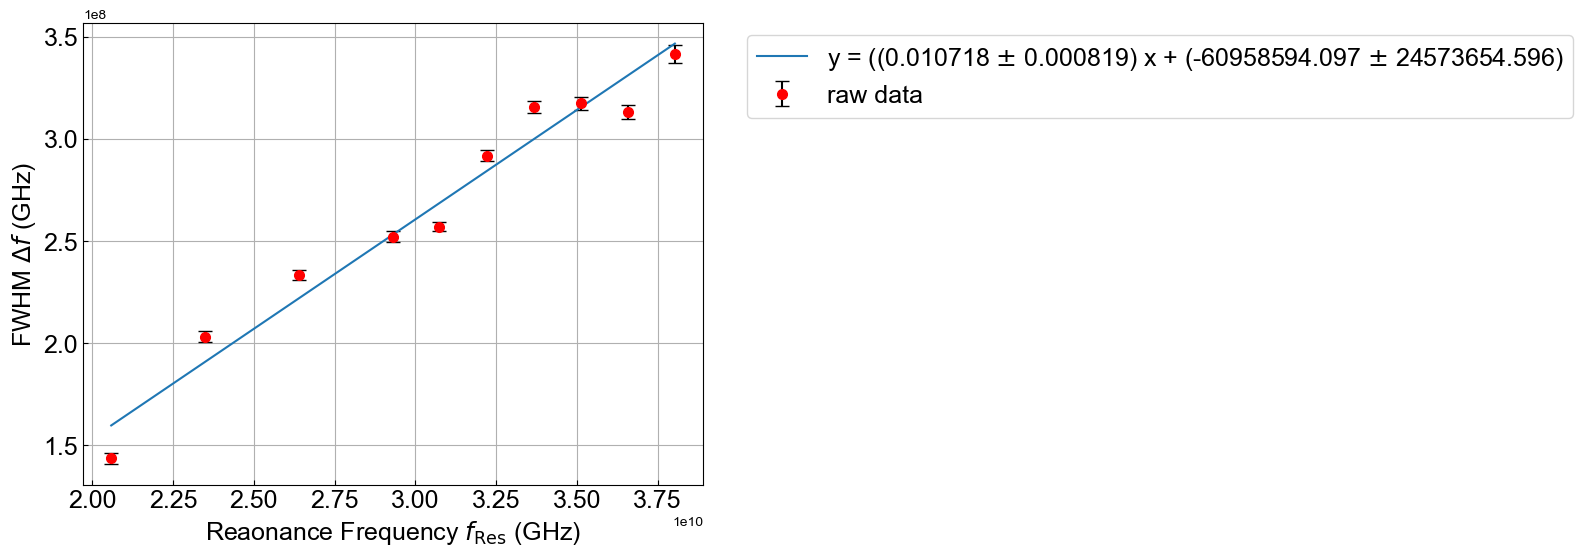

In [51]:
# ダンピング定数

#印加磁場vs.共鳴周波数
plt.rcParams['font.family'] = 'arial'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
fig = plt.figure(figsize=(12, 10))
gs = gridspec.GridSpec(2, 2, height_ratios=[2, 2])
##########データの代入##################################################################################################
Filename='data'
filename='a15NiFe80'
date='240521'

path='/Users/ueno2/iCloudDrive/研究/FeCoNi3元合金/データ/PPMS-OPFMR'
save_path='/Users/ueno2/iCloudDrive/研究/FeCoNi3元合金/データ/PPMS-OPFMR/fitted_data/liner'
f=open(f'{path}/{Filename}/{filename}.txt','rt')
x_list=[]  #fres
y_list=[]  #deltaf
yerr_list=[] #フィッティング誤差

for i in range(1):
    next(f)
n=0
for line in f :
    n=n+1
    data = line[:-1].split('\t')
    x_list.append(float(data[1])*10**9)
    y_list.append(float(data[4])*10**9)
    yerr_list.append(float(data[6])*10**9)

x=np.array(x_list)
y=np.array(y_list)
yerr=np.array(yerr_list)

##########グラフのプロット##########################################################################################
fig=plt.figure(figsize=(8, 6))

###グラフ軸設定#################
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid(True)
plt.xlabel('Reaonance Frequency $f_\mathrm{Res}$ (GHz)', fontsize=18)
plt.ylabel('FWHM $\Delta f$ (GHz)', fontsize=18)

plt.errorbar(x_list,y_list, yerr = yerr_list, capsize=5, fmt='o', markersize=7, ecolor='black', markeredgecolor = "red", color='red',label="raw data")

p, cov =np.polyfit(x,y,1, w=1.0/yerr,cov=True) #1次関数フィティング
a = p[0]
b = p[1]
sigma_a = np.sqrt(cov[0,0])
sigma_b = np.sqrt(cov[1,1])
xx=np.linspace(x[0],x[-1],30)
yy=np.polyval(p,xx) #結果からyを計算
plt.plot(xx,yy,label="y = (({:.6f} $\pm$ {:.6f}) x + ({:.3f} $\pm$ {:.3f})".format(a,sigma_a,b,sigma_b))

print(f"試料名:{filename}")
print(f"傾き:{a}\t± {sigma_a}")
print(f"切片:{b}\t± {sigma_b}")
print(f"ダンピング定数α(×10^(-3))={a/2*10**3}\t±\t {sigma_a/2*10**3}")
print(f"不均一線幅ΔH(0)={2*np.pi/gamma*b}\t±\t {2*np.pi/gamma*sigma_b}")


plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',fontsize=18)

#print(x_list,y_list)

plt.show()
fig.savefig(f'{save_path}/damp_graph_{filename}.pdf',bbox_inches="tight",format="pdf", pad_inches=0.1)
fig.savefig(f'{save_path}/damp_graph_{filename}.png',bbox_inches="tight",format="png", pad_inches=0.1)

# NiFe30-Ni80Co20

## 10

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


試料名:NCNF30_10
〇g因子とMs
傾き:2847773.443672136	± 36876.21779183508
切片:-26296619477.73736	± 461857635.35642374
gamma=17893088.259456977	± 115850.05490700631
g-factor=2.0173595978533787	±	 0.0261230724165201
Ms,eff=734.8261825020309	±	 12.906034683876317
〇ダンピング定数
傾き:0.022504462570400553	± 0.0011546718522951046
切片:3208309.146555727	± 12158320.895410258
ダンピング定数α(×10^(-3))=11.252231285200276	±	 0.5773359261475524
不均一線幅ΔH(0)=1.1266026634543964	±	 4.269412976803517


<Figure size 1200x1000 with 0 Axes>

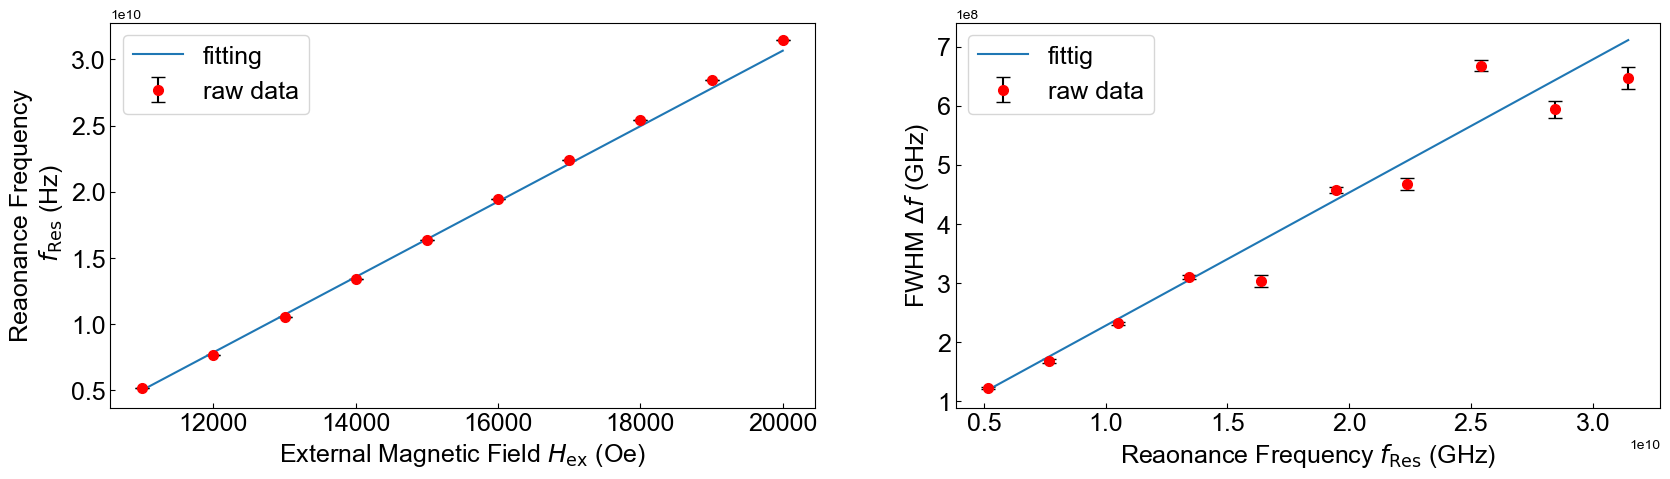

In [55]:
#印加磁場vs.共鳴周波数
plt.rcParams['font.family'] = 'arial'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
fig = plt.figure(figsize=(12, 10))
gs = gridspec.GridSpec(2, 2, height_ratios=[2, 2])
##########データの代入##################################################################################################
Filename='data'
filename='NCNF30_10'
date='240521'

path='/Users/ueno2/iCloudDrive/研究/FeCoNi3元合金/データ/PPMS-OPFMR'
save_path='/Users/ueno2/iCloudDrive/研究/FeCoNi3元合金/データ/PPMS-OPFMR/fitted_data/liner'
f=open(f'{path}/{Filename}/{filename}.txt','rt')
x_list=[]  #Hex
y_list=[]  #Freq
yerr_list=[] #フィッティング誤差
y2_list=[] #FWHM Freq
yerr2_list=[] #フィッティング誤差

for i in range(1):
    next(f)
n=0
for line in f :
    n=n+1
    data = line[:-1].split('\t')
    x_list.append(float(data[0]))
    y_list.append(float(data[1])*10**9)
    yerr_list.append(float(data[3])*10**9)
    y2_list.append(float(data[4])*10**9)
    yerr2_list.append(float(data[6])*10**9)

x=np.array(x_list)
y=np.array(y_list)
yerr=np.array(yerr_list)
y2=np.array(y2_list)
yerr2=np.array(yerr2_list)

##########グラフのプロット##########################################################################################
fig=plt.figure(figsize=(20, 5))

###Hex vs. fres######################################################################################################################
plt.subplot(1, 2, 1)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid(False)
plt.xlabel('External Magnetic Field $H_\mathrm{ex}$ (Oe)', fontsize=18)
plt.ylabel('Reaonance Frequency\n $f_\mathrm{Res} $ (Hz)', fontsize=18)

plt.errorbar(x_list,y_list, yerr = yerr_list, capsize=5, fmt='o', markersize=7, ecolor='black', markeredgecolor = "red", color='red',label="raw data")

p, cov =np.polyfit(x,y,1, w=1.0/yerr,cov=True) #1次関数フィティング
a = p[0]
b = p[1]
sigma_a = np.sqrt(cov[0,0])
sigma_b = np.sqrt(cov[1,1])
xx=np.linspace(x[0],x[-1],30001)
yy=np.polyval(p,xx) #結果からyを計算
plt.plot(xx,yy,label="fitting".format(a,sigma_a,b,sigma_b))
plt.legend(bbox_to_anchor=(0, 1.0), loc='upper left',fontsize=18)

print(f"試料名:{filename}")
print(f"〇g因子とMs")
print(f"傾き:{a}\t± {sigma_a}")
print(f"切片:{b}\t± {sigma_b}")
print(f"gamma={2*np.pi*a}\t± {np.pi*sigma_a}")
print(f"g-factor={2*np.pi*a*hbar/muB}\t±\t {2*np.pi*sigma_a*hbar/muB}")
print(f"Ms,eff={-1/(2*2*np.pi*a)*b}\t±\t {1/(2*2*np.pi*a)*sigma_b}")
gamma=2*np.pi*a

###delta f vs. Hres#########################################################################################################################################
plt.subplot(1, 2, 2)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid(False)
plt.xlabel('Reaonance Frequency $f_\mathrm{Res}$ (GHz)', fontsize=18)
plt.ylabel('FWHM $\Delta f$ (GHz)', fontsize=18)

plt.errorbar(y_list,y2_list, yerr = yerr2_list, capsize=5, fmt='o', markersize=7, ecolor='black', markeredgecolor = "red", color='red',label="raw data")

p2, cov =np.polyfit(y,y2,1, w=1.0/yerr2,cov=True) #1次関数フィティング
a2 = p2[0]
b2 = p2[1]
sigma_a2 = np.sqrt(cov[0,0])
sigma_b2 = np.sqrt(cov[1,1])
xx=np.linspace(y[0],y[-1],30)
yy2=np.polyval(p2,xx) #結果からyを計算
plt.plot(xx,yy2,label="fittig".format(a2,sigma_a2,b2,sigma_b2))
plt.legend(bbox_to_anchor=(0, 1.0), loc='upper left',fontsize=18)

print(f"〇ダンピング定数")
print(f"傾き:{a2}\t± {sigma_a2}")
print(f"切片:{b2}\t± {sigma_b2}")
print(f"ダンピング定数α(×10^(-3))={a2/2*10**3}\t±\t {sigma_a2/2*10**3}")
print(f"不均一線幅ΔH(0)={2*np.pi/gamma*b2}\t±\t {2*np.pi/gamma*sigma_b2}")

plt.show()

fig.savefig(f'{save_path}/g-factor_graph_{filename}.pdf',bbox_inches="tight",format="pdf", pad_inches=0.1)
fig.savefig(f'{save_path}/g-factor_graph_{filename}.png',bbox_inches="tight",format="png", pad_inches=0.1)


## 20

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


試料名:NCNF30-20
〇g因子とMs
傾き:2962291.230710876	± 7353.697604785469
切片:-29136466359.90386	± 107439578.78703992
gamma=18612624.73638951	± 23102.322371914885
g-factor=2.0984838731432114	±	 0.005209351353314091
Ms,eff=782.7070811495813	±	 2.8862017127811366
〇ダンピング定数
傾き:0.01984346162064917	± 0.0011117239373209316
切片:4772222.122950669	± 16321363.271130133
ダンピング定数α(×10^(-3))=9.921730810324584	±	 0.5558619686604658
不均一線幅ΔH(0)=1.6109901934947346	±	 5.509709208170397


<Figure size 1200x1000 with 0 Axes>

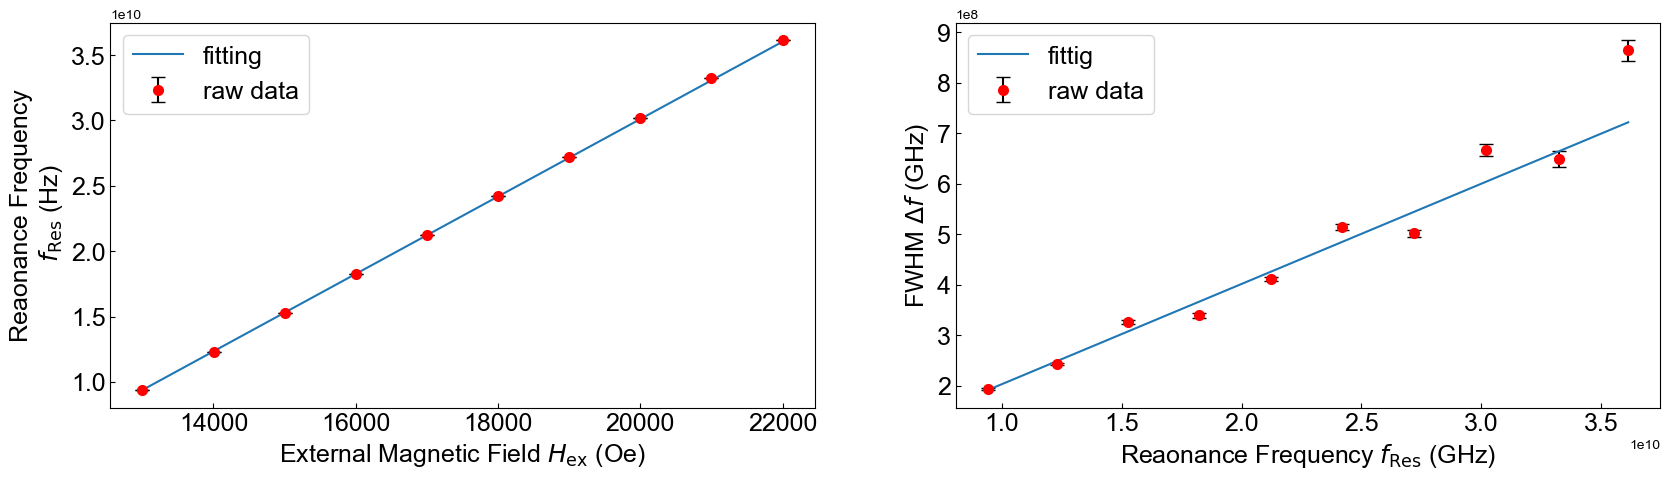

In [61]:
#印加磁場vs.共鳴周波数
plt.rcParams['font.family'] = 'arial'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
fig = plt.figure(figsize=(12, 10))
gs = gridspec.GridSpec(2, 2, height_ratios=[2, 2])
##########データの代入##################################################################################################
Filename='data'
filename='NCNF30-20'
date='240521'

path='/Users/ueno2/iCloudDrive/研究/FeCoNi3元合金/データ/PPMS-OPFMR'
save_path='/Users/ueno2/iCloudDrive/研究/FeCoNi3元合金/データ/PPMS-OPFMR/fitted_data/liner'
f=open(f'{path}/{Filename}/{filename}.txt','rt')
x_list=[]  #Hex
y_list=[]  #Freq
yerr_list=[] #フィッティング誤差
y2_list=[] #FWHM Freq
yerr2_list=[] #フィッティング誤差

for i in range(1):
    next(f)
n=0
for line in f :
    n=n+1
    data = line[:-1].split('\t')
    x_list.append(float(data[0]))
    y_list.append(float(data[1])*10**9)
    yerr_list.append(float(data[3])*10**9)
    y2_list.append(float(data[4])*10**9)
    yerr2_list.append(float(data[6])*10**9)

x=np.array(x_list)
y=np.array(y_list)
yerr=np.array(yerr_list)
y2=np.array(y2_list)
yerr2=np.array(yerr2_list)

##########グラフのプロット##########################################################################################
fig=plt.figure(figsize=(20, 5))

###Hex vs. fres######################################################################################################################
plt.subplot(1, 2, 1)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid(False)
plt.xlabel('External Magnetic Field $H_\mathrm{ex}$ (Oe)', fontsize=18)
plt.ylabel('Reaonance Frequency\n $f_\mathrm{Res} $ (Hz)', fontsize=18)

plt.errorbar(x_list,y_list, yerr = yerr_list, capsize=5, fmt='o', markersize=7, ecolor='black', markeredgecolor = "red", color='red',label="raw data")

p, cov =np.polyfit(x,y,1, w=1.0/yerr,cov=True) #1次関数フィティング
a = p[0]
b = p[1]
sigma_a = np.sqrt(cov[0,0])
sigma_b = np.sqrt(cov[1,1])
xx=np.linspace(x[0],x[-1],30001)
yy=np.polyval(p,xx) #結果からyを計算
plt.plot(xx,yy,label="fitting".format(a,sigma_a,b,sigma_b))
plt.legend(bbox_to_anchor=(0, 1.0), loc='upper left',fontsize=18)

print(f"試料名:{filename}")
print(f"〇g因子とMs")
print(f"傾き:{a}\t± {sigma_a}")
print(f"切片:{b}\t± {sigma_b}")
print(f"gamma={2*np.pi*a}\t± {np.pi*sigma_a}")
print(f"g-factor={2*np.pi*a*hbar/muB}\t±\t {2*np.pi*sigma_a*hbar/muB}")
print(f"Ms,eff={-1/(2*2*np.pi*a)*b}\t±\t {1/(2*2*np.pi*a)*sigma_b}")
gamma=2*np.pi*a

###delta f vs. Hres#########################################################################################################################################
plt.subplot(1, 2, 2)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid(False)
plt.xlabel('Reaonance Frequency $f_\mathrm{Res}$ (GHz)', fontsize=18)
plt.ylabel('FWHM $\Delta f$ (GHz)', fontsize=18)

plt.errorbar(y_list,y2_list, yerr = yerr2_list, capsize=5, fmt='o', markersize=7, ecolor='black', markeredgecolor = "red", color='red',label="raw data")

p2, cov =np.polyfit(y,y2,1, w=1.0/yerr2,cov=True) #1次関数フィティング
a2 = p2[0]
b2 = p2[1]
sigma_a2 = np.sqrt(cov[0,0])
sigma_b2 = np.sqrt(cov[1,1])
xx=np.linspace(y[0],y[-1],30)
yy2=np.polyval(p2,xx) #結果からyを計算
plt.plot(xx,yy2,label="fittig".format(a2,sigma_a2,b2,sigma_b2))
plt.legend(bbox_to_anchor=(0, 1.0), loc='upper left',fontsize=18)

print(f"〇ダンピング定数")
print(f"傾き:{a2}\t± {sigma_a2}")
print(f"切片:{b2}\t± {sigma_b2}")
print(f"ダンピング定数α(×10^(-3))={a2/2*10**3}\t±\t {sigma_a2/2*10**3}")
print(f"不均一線幅ΔH(0)={2*np.pi/gamma*b2}\t±\t {2*np.pi/gamma*sigma_b2}")

plt.show()

fig.savefig(f'{save_path}/g-factor_graph_{filename}.pdf',bbox_inches="tight",format="pdf", pad_inches=0.1)
fig.savefig(f'{save_path}/g-factor_graph_{filename}.png',bbox_inches="tight",format="png", pad_inches=0.1)


# 30

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


試料名:NCNF30_30
〇g因子とMs
傾き:2975259.7038678317	± 3441.4671839345197
切片:-30859865251.226448	± 51071162.582848825
gamma=18694108.05638585	 10811.68802261904
g-factor=2.1076707253665936	 0.0024379315951676716
Ms,eff=825.3901485469593	 1.365969492334326
〇ダンピング定数
傾き:0.017038528766744703	± 0.0012064676843385697
切片:16589799.653669717	± 16824861.36221077
ダンピング定数α(×10^(-3))=8.519264383372352	 0.6032338421692849
不均一線幅ΔH(0)=5.5759164929713565	 5.654921935163671


<Figure size 1200x1000 with 0 Axes>

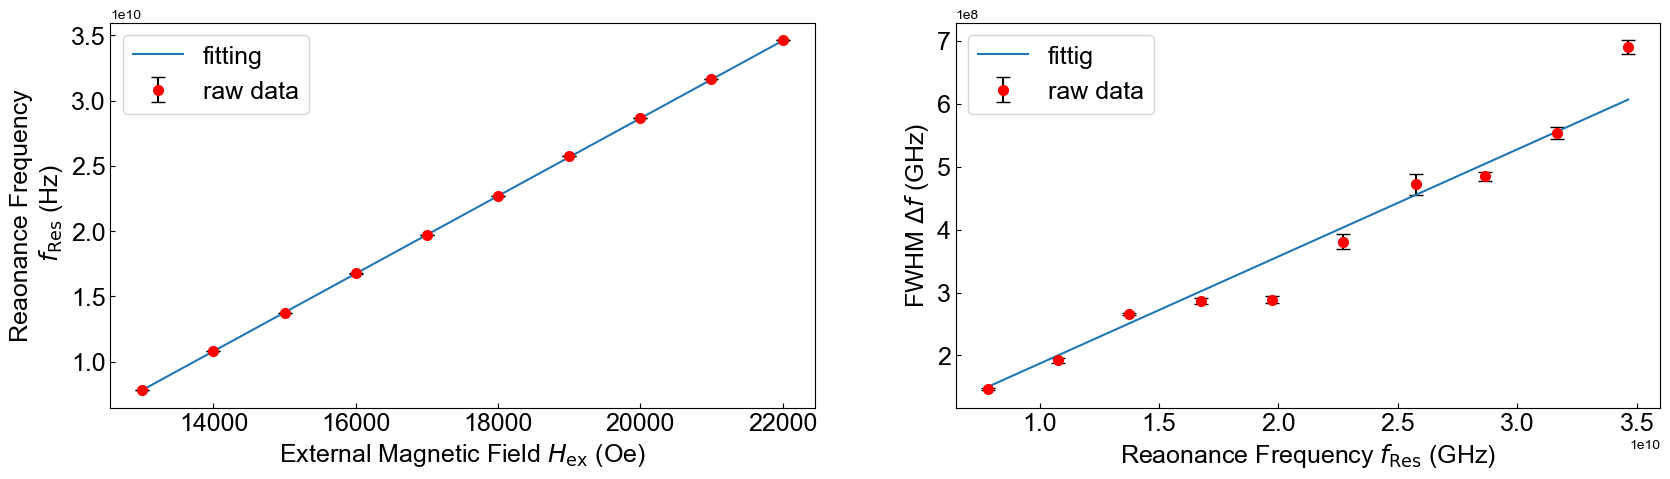

In [69]:
#印加磁場vs.共鳴周波数
plt.rcParams['font.family'] = 'arial'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
fig = plt.figure(figsize=(12, 10))
gs = gridspec.GridSpec(2, 2, height_ratios=[2, 2])
##########データの代入##################################################################################################
Filename='data'
filename='NCNF30_30'
date='240521'

path='/Users/ueno2/iCloudDrive/研究/FeCoNi3元合金/データ/PPMS-OPFMR'
save_path='/Users/ueno2/iCloudDrive/研究/FeCoNi3元合金/データ/PPMS-OPFMR/fitted_data/liner'
f=open(f'{path}/{Filename}/{filename}.txt','rt')
x_list=[]  #Hex
y_list=[]  #Freq
yerr_list=[] #フィッティング誤差
y2_list=[] #FWHM Freq
yerr2_list=[] #フィッティング誤差

for i in range(1):
    next(f)
n=0
for line in f :
    n=n+1
    data = line[:-1].split('\t')
    x_list.append(float(data[0]))
    y_list.append(float(data[1])*10**9)
    yerr_list.append(float(data[3])*10**9)
    y2_list.append(float(data[4])*10**9)
    yerr2_list.append(float(data[6])*10**9)

x=np.array(x_list)
y=np.array(y_list)
yerr=np.array(yerr_list)
y2=np.array(y2_list)
yerr2=np.array(yerr2_list)

##########グラフのプロット##########################################################################################
fig=plt.figure(figsize=(20, 5))

###Hex vs. fres######################################################################################################################
plt.subplot(1, 2, 1)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid(False)
plt.xlabel('External Magnetic Field $H_\mathrm{ex}$ (Oe)', fontsize=18)
plt.ylabel('Reaonance Frequency\n $f_\mathrm{Res} $ (Hz)', fontsize=18)

plt.errorbar(x_list,y_list, yerr = yerr_list, capsize=5, fmt='o', markersize=7, ecolor='black', markeredgecolor = "red", color='red',label="raw data")

p, cov =np.polyfit(x,y,1, w=1.0/yerr,cov=True) #1次関数フィティング
a = p[0]
b = p[1]
sigma_a = np.sqrt(cov[0,0])
sigma_b = np.sqrt(cov[1,1])
xx=np.linspace(x[0],x[-1],30001)
yy=np.polyval(p,xx) #結果からyを計算
plt.plot(xx,yy,label="fitting".format(a,sigma_a,b,sigma_b))
plt.legend(bbox_to_anchor=(0, 1.0), loc='upper left',fontsize=18)

print(f"試料名:{filename}")
print(f"〇g因子とMs")
print(f"傾き:{a}\t± {sigma_a}")
print(f"切片:{b}\t± {sigma_b}")
print(f"gamma={2*np.pi*a}\t {np.pi*sigma_a}")
print(f"g-factor={2*np.pi*a*hbar/muB}\t {2*np.pi*sigma_a*hbar/muB}")
print(f"Ms,eff={-1/(2*2*np.pi*a)*b}\t {1/(2*2*np.pi*a)*sigma_b}")
gamma=2*np.pi*a

###delta f vs. Hres#########################################################################################################################################
plt.subplot(1, 2, 2)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid(False)
plt.xlabel('Reaonance Frequency $f_\mathrm{Res}$ (GHz)', fontsize=18)
plt.ylabel('FWHM $\Delta f$ (GHz)', fontsize=18)

plt.errorbar(y_list,y2_list, yerr = yerr2_list, capsize=5, fmt='o', markersize=7, ecolor='black', markeredgecolor = "red", color='red',label="raw data")

p2, cov =np.polyfit(y,y2,1, w=1.0/yerr2,cov=True) #1次関数フィティング
a2 = p2[0]
b2 = p2[1]
sigma_a2 = np.sqrt(cov[0,0])
sigma_b2 = np.sqrt(cov[1,1])
xx=np.linspace(y[0],y[-1],30)
yy2=np.polyval(p2,xx) #結果からyを計算
plt.plot(xx,yy2,label="fittig".format(a2,sigma_a2,b2,sigma_b2))
plt.legend(bbox_to_anchor=(0, 1.0), loc='upper left',fontsize=18)

print(f"〇ダンピング定数")
print(f"傾き:{a2}\t± {sigma_a2}")
print(f"切片:{b2}\t± {sigma_b2}")
print(f"ダンピング定数α(×10^(-3))={a2/2*10**3}\t {sigma_a2/2*10**3}")
print(f"不均一線幅ΔH(0)={2*np.pi/gamma*b2}\t {2*np.pi/gamma*sigma_b2}")

plt.show()

fig.savefig(f'{save_path}/g-factor_graph_{filename}.pdf',bbox_inches="tight",format="pdf", pad_inches=0.1)
fig.savefig(f'{save_path}/g-factor_graph_{filename}.png',bbox_inches="tight",format="png", pad_inches=0.1)

# 40

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


試料名:NCNF30_40
〇g因子とMs
傾き:2959801.2759281253	± 3381.991488761149
切片:-31990240237.46716	± 51508372.98590292
gamma=18596979.88908299	 10624.839615595232
g-factor=2.0967199918940325	 0.0023957990776517116
Ms,eff=860.0923490874567	 1.3848585440515517
〇ダンピング定数
傾き:0.013775866262801828	± 0.0012966971719521202
切片:34288269.89084435	± 19041592.3302853
ダンピング定数α(×10^(-3))=6.8879331314009145	 0.64834858597606
不均一線幅ΔH(0)=11.584652716284927	 6.433402298035801


<Figure size 1200x1000 with 0 Axes>

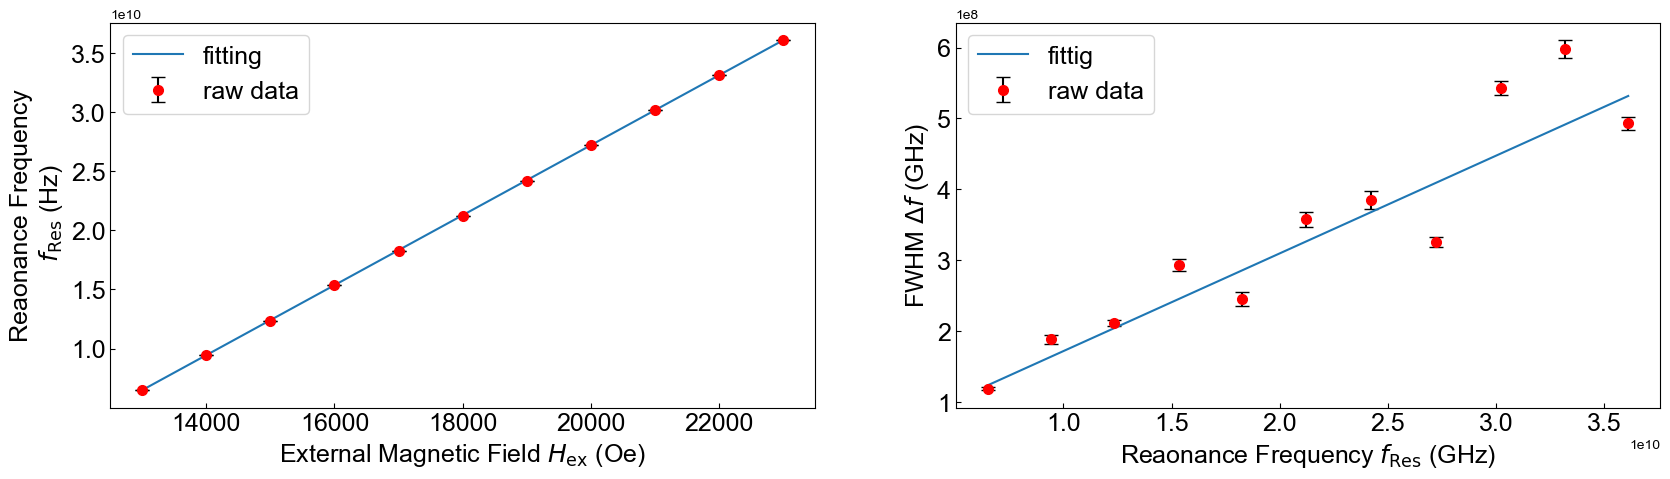

In [73]:
#印加磁場vs.共鳴周波数
plt.rcParams['font.family'] = 'arial'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
fig = plt.figure(figsize=(12, 10))
gs = gridspec.GridSpec(2, 2, height_ratios=[2, 2])
##########データの代入##################################################################################################
Filename='data'
filename='NCNF30_40'
date='240521'

path='/Users/ueno2/iCloudDrive/研究/FeCoNi3元合金/データ/PPMS-OPFMR'
save_path='/Users/ueno2/iCloudDrive/研究/FeCoNi3元合金/データ/PPMS-OPFMR/fitted_data/liner'
f=open(f'{path}/{Filename}/{filename}.txt','rt')
x_list=[]  #Hex
y_list=[]  #Freq
yerr_list=[] #フィッティング誤差
y2_list=[] #FWHM Freq
yerr2_list=[] #フィッティング誤差

for i in range(1):
    next(f)
n=0
for line in f :
    n=n+1
    data = line[:-1].split('\t')
    x_list.append(float(data[0]))
    y_list.append(float(data[1])*10**9)
    yerr_list.append(float(data[3])*10**9)
    y2_list.append(float(data[4])*10**9)
    yerr2_list.append(float(data[6])*10**9)

x=np.array(x_list)
y=np.array(y_list)
yerr=np.array(yerr_list)
y2=np.array(y2_list)
yerr2=np.array(yerr2_list)

##########グラフのプロット##########################################################################################
fig=plt.figure(figsize=(20, 5))

###Hex vs. fres######################################################################################################################
plt.subplot(1, 2, 1)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid(False)
plt.xlabel('External Magnetic Field $H_\mathrm{ex}$ (Oe)', fontsize=18)
plt.ylabel('Reaonance Frequency\n $f_\mathrm{Res} $ (Hz)', fontsize=18)

plt.errorbar(x_list,y_list, yerr = yerr_list, capsize=5, fmt='o', markersize=7, ecolor='black', markeredgecolor = "red", color='red',label="raw data")

p, cov =np.polyfit(x,y,1, w=1.0/yerr,cov=True) #1次関数フィティング
a = p[0]
b = p[1]
sigma_a = np.sqrt(cov[0,0])
sigma_b = np.sqrt(cov[1,1])
xx=np.linspace(x[0],x[-1],30001)
yy=np.polyval(p,xx) #結果からyを計算
plt.plot(xx,yy,label="fitting".format(a,sigma_a,b,sigma_b))
plt.legend(bbox_to_anchor=(0, 1.0), loc='upper left',fontsize=18)

print(f"試料名:{filename}")
print(f"〇g因子とMs")
print(f"傾き:{a}\t± {sigma_a}")
print(f"切片:{b}\t± {sigma_b}")
print(f"gamma={2*np.pi*a}\t {np.pi*sigma_a}")
print(f"g-factor={2*np.pi*a*hbar/muB}\t {2*np.pi*sigma_a*hbar/muB}")
print(f"Ms,eff={-1/(2*2*np.pi*a)*b}\t {1/(2*2*np.pi*a)*sigma_b}")
gamma=2*np.pi*a

###delta f vs. Hres#########################################################################################################################################
plt.subplot(1, 2, 2)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid(False)
plt.xlabel('Reaonance Frequency $f_\mathrm{Res}$ (GHz)', fontsize=18)
plt.ylabel('FWHM $\Delta f$ (GHz)', fontsize=18)

plt.errorbar(y_list,y2_list, yerr = yerr2_list, capsize=5, fmt='o', markersize=7, ecolor='black', markeredgecolor = "red", color='red',label="raw data")

p2, cov =np.polyfit(y,y2,1, w=1.0/yerr2,cov=True) #1次関数フィティング
a2 = p2[0]
b2 = p2[1]
sigma_a2 = np.sqrt(cov[0,0])
sigma_b2 = np.sqrt(cov[1,1])
xx=np.linspace(y[0],y[-1],30)
yy2=np.polyval(p2,xx) #結果からyを計算
plt.plot(xx,yy2,label="fittig".format(a2,sigma_a2,b2,sigma_b2))
plt.legend(bbox_to_anchor=(0, 1.0), loc='upper left',fontsize=18)

print(f"〇ダンピング定数")
print(f"傾き:{a2}\t± {sigma_a2}")
print(f"切片:{b2}\t± {sigma_b2}")
print(f"ダンピング定数α(×10^(-3))={a2/2*10**3}\t {sigma_a2/2*10**3}")
print(f"不均一線幅ΔH(0)={2*np.pi/gamma*b2}\t {2*np.pi/gamma*sigma_b2}")

plt.show()

fig.savefig(f'{save_path}/g-factor_graph_{filename}.pdf',bbox_inches="tight",format="pdf", pad_inches=0.1)
fig.savefig(f'{save_path}/g-factor_graph_{filename}.png',bbox_inches="tight",format="png", pad_inches=0.1)

# 50

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


試料名:NCNF30_50
〇g因子とMs
傾き:2958656.802770328	± 2247.4890678278125
切片:-33650950933.50875	± 38779108.23631707
gamma=18589788.952153455	 7060.695144511228
g-factor=2.095909248358763	 0.0015921188014895262
Ms,eff=905.0923337569843	 1.0430217453282293
〇ダンピング定数
傾き:0.011485537438186387	± 0.0006743295142179838
切片:41266408.274358116	± 12322443.109991428
ダンピング定数α(×10^(-3))=5.742768719093194	 0.3371647571089919
不均一線幅ΔH(0)=13.94768336622161	 4.164877487126371


<Figure size 1200x1000 with 0 Axes>

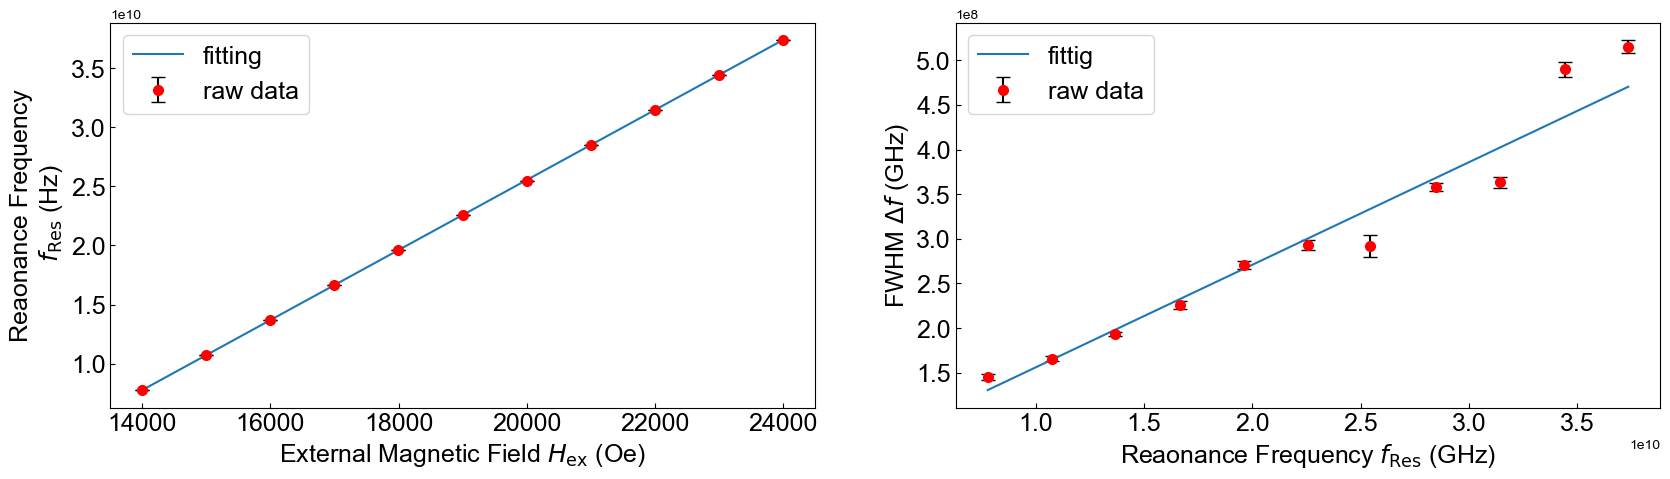

In [77]:
#印加磁場vs.共鳴周波数
plt.rcParams['font.family'] = 'arial'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
fig = plt.figure(figsize=(12, 10))
gs = gridspec.GridSpec(2, 2, height_ratios=[2, 2])
##########データの代入##################################################################################################
Filename='data'
filename='NCNF30_50'

path='/Users/ueno2/iCloudDrive/研究/FeCoNi3元合金/データ/PPMS-OPFMR'
save_path='/Users/ueno2/iCloudDrive/研究/FeCoNi3元合金/データ/PPMS-OPFMR/fitted_data/liner'
f=open(f'{path}/{Filename}/{filename}.txt','rt')
x_list=[]  #Hex
y_list=[]  #Freq
yerr_list=[] #フィッティング誤差
y2_list=[] #FWHM Freq
yerr2_list=[] #フィッティング誤差

for i in range(1):
    next(f)
n=0
for line in f :
    n=n+1
    data = line[:-1].split('\t')
    x_list.append(float(data[0]))
    y_list.append(float(data[1])*10**9)
    yerr_list.append(float(data[3])*10**9)
    y2_list.append(float(data[4])*10**9)
    yerr2_list.append(float(data[6])*10**9)

x=np.array(x_list)
y=np.array(y_list)
yerr=np.array(yerr_list)
y2=np.array(y2_list)
yerr2=np.array(yerr2_list)

##########グラフのプロット##########################################################################################
fig=plt.figure(figsize=(20, 5))

###Hex vs. fres######################################################################################################################
plt.subplot(1, 2, 1)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid(False)
plt.xlabel('External Magnetic Field $H_\mathrm{ex}$ (Oe)', fontsize=18)
plt.ylabel('Reaonance Frequency\n $f_\mathrm{Res} $ (Hz)', fontsize=18)

plt.errorbar(x_list,y_list, yerr = yerr_list, capsize=5, fmt='o', markersize=7, ecolor='black', markeredgecolor = "red", color='red',label="raw data")

p, cov =np.polyfit(x,y,1, w=1.0/yerr,cov=True) #1次関数フィティング
a = p[0]
b = p[1]
sigma_a = np.sqrt(cov[0,0])
sigma_b = np.sqrt(cov[1,1])
xx=np.linspace(x[0],x[-1],30001)
yy=np.polyval(p,xx) #結果からyを計算
plt.plot(xx,yy,label="fitting".format(a,sigma_a,b,sigma_b))
plt.legend(bbox_to_anchor=(0, 1.0), loc='upper left',fontsize=18)

print(f"試料名:{filename}")
print(f"〇g因子とMs")
print(f"傾き:{a}\t± {sigma_a}")
print(f"切片:{b}\t± {sigma_b}")
print(f"gamma={2*np.pi*a}\t {np.pi*sigma_a}")
print(f"g-factor={2*np.pi*a*hbar/muB}\t {2*np.pi*sigma_a*hbar/muB}")
print(f"Ms,eff={-1/(2*2*np.pi*a)*b}\t {1/(2*2*np.pi*a)*sigma_b}")
gamma=2*np.pi*a

###delta f vs. Hres#########################################################################################################################################
plt.subplot(1, 2, 2)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid(False)
plt.xlabel('Reaonance Frequency $f_\mathrm{Res}$ (GHz)', fontsize=18)
plt.ylabel('FWHM $\Delta f$ (GHz)', fontsize=18)

plt.errorbar(y_list,y2_list, yerr = yerr2_list, capsize=5, fmt='o', markersize=7, ecolor='black', markeredgecolor = "red", color='red',label="raw data")

p2, cov =np.polyfit(y,y2,1, w=1.0/yerr2,cov=True) #1次関数フィティング
a2 = p2[0]
b2 = p2[1]
sigma_a2 = np.sqrt(cov[0,0])
sigma_b2 = np.sqrt(cov[1,1])
xx=np.linspace(y[0],y[-1],30)
yy2=np.polyval(p2,xx) #結果からyを計算
plt.plot(xx,yy2,label="fittig".format(a2,sigma_a2,b2,sigma_b2))
plt.legend(bbox_to_anchor=(0, 1.0), loc='upper left',fontsize=18)

print(f"〇ダンピング定数")
print(f"傾き:{a2}\t± {sigma_a2}")
print(f"切片:{b2}\t± {sigma_b2}")
print(f"ダンピング定数α(×10^(-3))={a2/2*10**3}\t {sigma_a2/2*10**3}")
print(f"不均一線幅ΔH(0)={2*np.pi/gamma*b2}\t {2*np.pi/gamma*sigma_b2}")

plt.show()

fig.savefig(f'{save_path}/g-factor_graph_{filename}.pdf',bbox_inches="tight",format="pdf", pad_inches=0.1)
fig.savefig(f'{save_path}/g-factor_graph_{filename}.png',bbox_inches="tight",format="png", pad_inches=0.1)

# 60

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


試料名:NCNF30_60
〇g因子とMs
傾き:2954942.6554682152	± 1690.1679843966717
切片:-34533701031.24801	± 32013848.038590655
gamma=18566452.27639612	 5309.819323113252
g-factor=2.093278150465633	 0.0011973131545571368
Ms,eff=930.0026875665242	 0.8621423081266435
〇ダンピング定数
傾き:0.01028707138555685	± 0.0010944302321355074
切片:39366684.51651452	± 23743891.872340508
ダンピング定数α(×10^(-3))=5.143535692778425	 0.5472151160677537
不均一線幅ΔH(0)=13.322317590043657	 8.035313926786932


<Figure size 1200x1000 with 0 Axes>

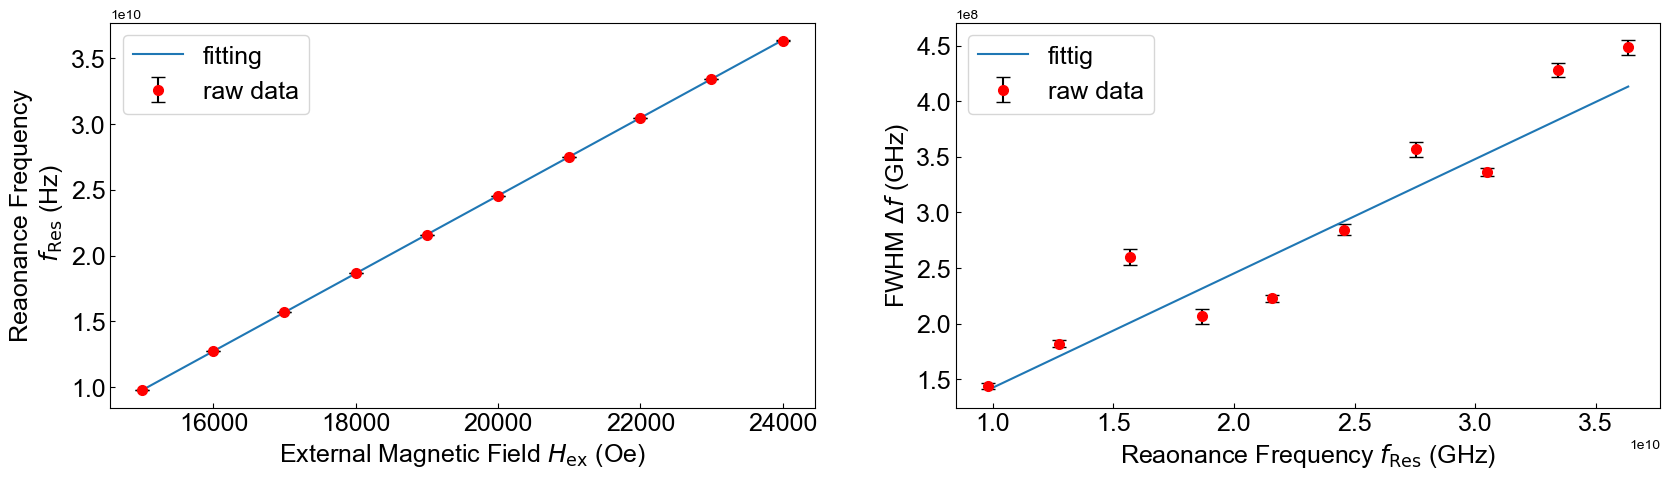

In [81]:
#印加磁場vs.共鳴周波数
plt.rcParams['font.family'] = 'arial'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
fig = plt.figure(figsize=(12, 10))
gs = gridspec.GridSpec(2, 2, height_ratios=[2, 2])
##########データの代入##################################################################################################
Filename='data'
filename='NCNF30_60'

path='/Users/ueno2/iCloudDrive/研究/FeCoNi3元合金/データ/PPMS-OPFMR'
save_path='/Users/ueno2/iCloudDrive/研究/FeCoNi3元合金/データ/PPMS-OPFMR/fitted_data/liner'
f=open(f'{path}/{Filename}/{filename}.txt','rt')
x_list=[]  #Hex
y_list=[]  #Freq
yerr_list=[] #フィッティング誤差
y2_list=[] #FWHM Freq
yerr2_list=[] #フィッティング誤差

for i in range(1):
    next(f)
n=0
for line in f :
    n=n+1
    data = line[:-1].split('\t')
    x_list.append(float(data[0]))
    y_list.append(float(data[1])*10**9)
    yerr_list.append(float(data[3])*10**9)
    y2_list.append(float(data[4])*10**9)
    yerr2_list.append(float(data[6])*10**9)

x=np.array(x_list)
y=np.array(y_list)
yerr=np.array(yerr_list)
y2=np.array(y2_list)
yerr2=np.array(yerr2_list)

##########グラフのプロット##########################################################################################
fig=plt.figure(figsize=(20, 5))

###Hex vs. fres######################################################################################################################
plt.subplot(1, 2, 1)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid(False)
plt.xlabel('External Magnetic Field $H_\mathrm{ex}$ (Oe)', fontsize=18)
plt.ylabel('Reaonance Frequency\n $f_\mathrm{Res} $ (Hz)', fontsize=18)

plt.errorbar(x_list,y_list, yerr = yerr_list, capsize=5, fmt='o', markersize=7, ecolor='black', markeredgecolor = "red", color='red',label="raw data")

p, cov =np.polyfit(x,y,1, w=1.0/yerr,cov=True) #1次関数フィティング
a = p[0]
b = p[1]
sigma_a = np.sqrt(cov[0,0])
sigma_b = np.sqrt(cov[1,1])
xx=np.linspace(x[0],x[-1],30001)
yy=np.polyval(p,xx) #結果からyを計算
plt.plot(xx,yy,label="fitting".format(a,sigma_a,b,sigma_b))
plt.legend(bbox_to_anchor=(0, 1.0), loc='upper left',fontsize=18)

print(f"試料名:{filename}")
print(f"〇g因子とMs")
print(f"傾き:{a}\t± {sigma_a}")
print(f"切片:{b}\t± {sigma_b}")
print(f"gamma={2*np.pi*a}\t {np.pi*sigma_a}")
print(f"g-factor={2*np.pi*a*hbar/muB}\t {2*np.pi*sigma_a*hbar/muB}")
print(f"Ms,eff={-1/(2*2*np.pi*a)*b}\t {1/(2*2*np.pi*a)*sigma_b}")
gamma=2*np.pi*a

###delta f vs. Hres#########################################################################################################################################
plt.subplot(1, 2, 2)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid(False)
plt.xlabel('Reaonance Frequency $f_\mathrm{Res}$ (GHz)', fontsize=18)
plt.ylabel('FWHM $\Delta f$ (GHz)', fontsize=18)

plt.errorbar(y_list,y2_list, yerr = yerr2_list, capsize=5, fmt='o', markersize=7, ecolor='black', markeredgecolor = "red", color='red',label="raw data")

p2, cov =np.polyfit(y,y2,1, w=1.0/yerr2,cov=True) #1次関数フィティング
a2 = p2[0]
b2 = p2[1]
sigma_a2 = np.sqrt(cov[0,0])
sigma_b2 = np.sqrt(cov[1,1])
xx=np.linspace(y[0],y[-1],30)
yy2=np.polyval(p2,xx) #結果からyを計算
plt.plot(xx,yy2,label="fittig".format(a2,sigma_a2,b2,sigma_b2))
plt.legend(bbox_to_anchor=(0, 1.0), loc='upper left',fontsize=18)

print(f"〇ダンピング定数")
print(f"傾き:{a2}\t± {sigma_a2}")
print(f"切片:{b2}\t± {sigma_b2}")
print(f"ダンピング定数α(×10^(-3))={a2/2*10**3}\t {sigma_a2/2*10**3}")
print(f"不均一線幅ΔH(0)={2*np.pi/gamma*b2}\t {2*np.pi/gamma*sigma_b2}")

plt.show()

fig.savefig(f'{save_path}/g-factor_graph_{filename}.pdf',bbox_inches="tight",format="pdf", pad_inches=0.1)
fig.savefig(f'{save_path}/g-factor_graph_{filename}.png',bbox_inches="tight",format="png", pad_inches=0.1)

# 70

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


試料名:NCNF30_70
〇g因子とMs
傾き:2747627.7354086176	± 25409.696252022106
切片:-30549684737.802044	± 457411909.27958226
gamma=17263854.216718547	 79826.91507530074
g-factor=1.9464164874742331	 0.018000201078656256
Ms,eff=884.7874974586301	 13.247676432433565
〇ダンピング定数
傾き:0.010784185865699571	± 0.0006882418053498821
切片:-2604745.443763877	± 13361976.626622457
ダンピング定数α(×10^(-3))=5.392092932849786	 0.34412090267494105
不均一線幅ΔH(0)=-0.9479979438977777	 4.863095700493543


<Figure size 1200x1000 with 0 Axes>

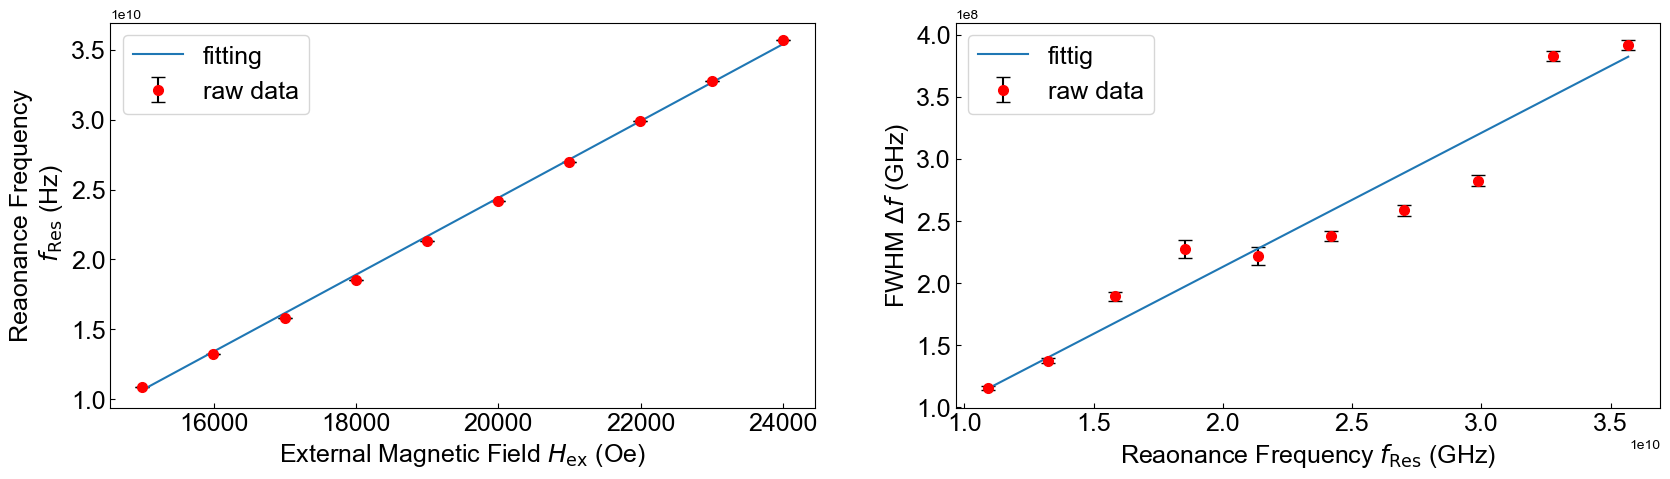

In [87]:
#印加磁場vs.共鳴周波数
plt.rcParams['font.family'] = 'arial'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
fig = plt.figure(figsize=(12, 10))
gs = gridspec.GridSpec(2, 2, height_ratios=[2, 2])
##########データの代入##################################################################################################
Filename='data'
filename='NCNF30_70'

path='/Users/ueno2/iCloudDrive/研究/FeCoNi3元合金/データ/PPMS-OPFMR'
save_path='/Users/ueno2/iCloudDrive/研究/FeCoNi3元合金/データ/PPMS-OPFMR/fitted_data/liner'
f=open(f'{path}/{Filename}/{filename}.txt','rt')
x_list=[]  #Hex
y_list=[]  #Freq
yerr_list=[] #フィッティング誤差
y2_list=[] #FWHM Freq
yerr2_list=[] #フィッティング誤差

for i in range(1):
    next(f)
n=0
for line in f :
    n=n+1
    data = line[:-1].split('\t')
    x_list.append(float(data[0]))
    y_list.append(float(data[1])*10**9)
    yerr_list.append(float(data[3])*10**9)
    y2_list.append(float(data[4])*10**9)
    yerr2_list.append(float(data[6])*10**9)

x=np.array(x_list)
y=np.array(y_list)
yerr=np.array(yerr_list)
y2=np.array(y2_list)
yerr2=np.array(yerr2_list)

##########グラフのプロット##########################################################################################
fig=plt.figure(figsize=(20, 5))

###Hex vs. fres######################################################################################################################
plt.subplot(1, 2, 1)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid(False)
plt.xlabel('External Magnetic Field $H_\mathrm{ex}$ (Oe)', fontsize=18)
plt.ylabel('Reaonance Frequency\n $f_\mathrm{Res} $ (Hz)', fontsize=18)

plt.errorbar(x_list,y_list, yerr = yerr_list, capsize=5, fmt='o', markersize=7, ecolor='black', markeredgecolor = "red", color='red',label="raw data")

p, cov =np.polyfit(x,y,1, w=1.0/yerr,cov=True) #1次関数フィティング
a = p[0]
b = p[1]
sigma_a = np.sqrt(cov[0,0])
sigma_b = np.sqrt(cov[1,1])
xx=np.linspace(x[0],x[-1],30001)
yy=np.polyval(p,xx) #結果からyを計算
plt.plot(xx,yy,label="fitting".format(a,sigma_a,b,sigma_b))
plt.legend(bbox_to_anchor=(0, 1.0), loc='upper left',fontsize=18)

print(f"試料名:{filename}")
print(f"〇g因子とMs")
print(f"傾き:{a}\t± {sigma_a}")
print(f"切片:{b}\t± {sigma_b}")
print(f"gamma={2*np.pi*a}\t {np.pi*sigma_a}")
print(f"g-factor={2*np.pi*a*hbar/muB}\t {2*np.pi*sigma_a*hbar/muB}")
print(f"Ms,eff={-1/(2*2*np.pi*a)*b}\t {1/(2*2*np.pi*a)*sigma_b}")
gamma=2*np.pi*a

###delta f vs. Hres#########################################################################################################################################
plt.subplot(1, 2, 2)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid(False)
plt.xlabel('Reaonance Frequency $f_\mathrm{Res}$ (GHz)', fontsize=18)
plt.ylabel('FWHM $\Delta f$ (GHz)', fontsize=18)

plt.errorbar(y_list,y2_list, yerr = yerr2_list, capsize=5, fmt='o', markersize=7, ecolor='black', markeredgecolor = "red", color='red',label="raw data")

p2, cov =np.polyfit(y,y2,1, w=1.0/yerr2,cov=True) #1次関数フィティング
a2 = p2[0]
b2 = p2[1]
sigma_a2 = np.sqrt(cov[0,0])
sigma_b2 = np.sqrt(cov[1,1])
xx=np.linspace(y[0],y[-1],30)
yy2=np.polyval(p2,xx) #結果からyを計算
plt.plot(xx,yy2,label="fittig".format(a2,sigma_a2,b2,sigma_b2))
plt.legend(bbox_to_anchor=(0, 1.0), loc='upper left',fontsize=18)

print(f"〇ダンピング定数")
print(f"傾き:{a2}\t± {sigma_a2}")
print(f"切片:{b2}\t± {sigma_b2}")
print(f"ダンピング定数α(×10^(-3))={a2/2*10**3}\t {sigma_a2/2*10**3}")
print(f"不均一線幅ΔH(0)={2*np.pi/gamma*b2}\t {2*np.pi/gamma*sigma_b2}")

plt.show()

fig.savefig(f'{save_path}/g-factor_graph_{filename}.pdf',bbox_inches="tight",format="pdf", pad_inches=0.1)
fig.savefig(f'{save_path}/g-factor_graph_{filename}.png',bbox_inches="tight",format="png", pad_inches=0.1)